# Getting data

## Imports and reading file

### Imports

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            !pip install pandas

#!pip install drive
import os

from google.colab import drive
drive.mount('/content/drive')

import sys
folder_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/'
sys.path.append(folder_path)
print(sys.path)

file_list = os.listdir(folder_path)
print("Files and directories in '", folder_path, "':")
print(file_list)

import importlib

Mounted at /content/drive
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/ColabNotebooks/root2Pandas/']
Files and directories in ' /content/drive/MyDrive/ColabNotebooks/root2Pandas/ ':
['devO2Residual', 'LeadLead', 'DellPionKaon', 'ROOT_TO_Pandas_ML.ipynb', 'root2Pandas.ipynb', '__pycache__', 'scatter_plots.py', 'import_helpers.py', 'plot_species_predictions.py', 'ParticleObject.py', 'make_test_data.py', 'ParticleObjectProcessor.py', 'map_helper_functions.py', 'read_file_and_pad.py', 'plot_contaminations.py', 'make_ckov_prediction.py', 'ParticleGunHO', 'ParticleGunLO', 'root2Pandas3D.ipynb', 'particleGunLO', 'histograms.py', 'STATS_ROOT_python3.10.ipynb', 'HMP_HTM.ipynb', 'HMPStats.ipynb', 'HMP_ML.ipynb', 'calculate_metrics.py', 'confusion_m

In [ ]:
from import_helpers import *
from read_file_and_pad import *
from calculate_metrics  import *


In [ ]:
import import_helpers
import read_file_and_pad
import calculate_metrics

In [ ]:

from histograms import *
#def plot_numerical_histogram(df, column_name, output_distfile, **kwargs):
# def plot_histogram(df, column_name, output_file):
# def calculate_distances(df):
# def plot_distance_histogram(df, output_file, bins=30, range = (-12, 12), title = "placeholder"):
# def add_component_distances(df):
# def plot_component_distance_histograms(df, output_file_prefix, bins=30, range = (-12, 12), title = "placeholder"):
# def plot_ckovRecon_by_pdg(df, pdg_codes, ckov_col='TrackAttributes_ckovReconThisTrack', pdg_col='mcTruth_pdgCodeTrack;'):


### Read files

In [ ]:
!pip install awkward-pandas

# Particle gun with low occupancy
file_name = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleGunLO/particleGunLO.root'

# Particle gun with high occupancy
file_name = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleGunHO/particleGunHO.root'

# Full PbPb simulation
file_name = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/alicemlLead40full.root'



In [ ]:
combined_fields, all_dicts = read_file_and_pad.process_file(file_name)

DataFrame shape: (147542, 1)
Number of entries in the tree: 147542
df[col] shape (147542,)
col sumProbabilityAllTracks
sumProbabilityAllTracks: (147542, 756)
Processed SumProballTracks;1 with version 1
DataFrame shape: (147542, 20)
Number of entries in the tree: 147542
df[col] shape (147542,)
TrackAttributes_xMipThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttributes_yMipThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttributes_xRadThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttributes_yRadThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttributes_xPCThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttributes_yPCThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttributes_thetaPThisTrack : Target datatype from ROOT datatype float64
df[col] shape (147542,)
TrackAttribut

## Dump data

### HO Data

In [ ]:
import pickle
import os

# Specify the directory path and the filename
directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleGunHO/'
filename = 'all_dicts_HO.pkl'


# Ensure the directory exists
os.makedirs(directory_path, exist_ok=True)

# Full path for the output file
full_path = os.path.join(directory_path, filename)

# Serialize the data and save it using Pickle
# with open(full_path, 'wb') as file:
#     pickle.dump(all_dicts, file)

print(f"Data successfully saved to {full_path}")


Data successfully saved to /content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleGunHO/all_dicts_HO.pkl


### PbPb Data

In [ ]:
import pickle
import os

# Specify the directory path and the filename
directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/'
filename = 'all_dicts.pkl'
import gc
del combined_fields
gc.collect()
# Ensure the directory exists
os.makedirs(directory_path, exist_ok=True)

# Full path for the output file
full_path = os.path.join(directory_path, filename)

# Serialize the data and save it using Pickle
with open(full_path, 'wb') as file:
    pickle.dump(all_dicts, file)

print(f"Data successfully saved to {full_path}")


Data successfully saved to /content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/all_dicts.pkl


## Convert fields

In [ ]:
columns_to_convert = ['mcTruth_pdgCodeTrack;', 'mcTruth_pdgCodeClu']
for col in columns_to_convert:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].astype('Int32')


columns_to_convert = ['mcTruth_pdgCodeTrack;', 'mcTruth_pdgCodeClu']
for col in columns_to_convert:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].astype('Int32')

NameError: name 'combined_df' is not defined

## Print data structure

In [ ]:
read_file_and_pad.print_dict_structure(all_dicts)

Key: SumProballTracks;1 (dict)
Key: sumProbabilityAllTracks (numpy array) - Shape: (147542, 756), Dtype: float32
Key: ThisTrack;1 (dict)
Key: TrackAttributes_xMipThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_yMipThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_xRadThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_yRadThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_xPCThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_yPCThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_thetaPThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_phiPThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_momentumThisTrack (pandas Series) - Length: 147542, Dtype: float64
Key: TrackAttributes_qMipThisTrack (pandas Series) - Length: 147542, Dtype: int64
Key: TrackAttributes_

## Lighter files

In [ ]:
pdg = combined_df['mcTruth_pdgCodeTrack;']
momentum = combined_df['TrackAttributes_momentumThisTrack']

# Plotting

## Plot distances

In [ ]:
#def plot_distance_histogram(df, output_file, bins=30, range = (-12, 12), title = "placeholder"):
plot_distance_histogram(combined_df, 'component_distance2', bins = 200, range = (-16, 6), title = "211")
#plot_distance_histogram(combined_df2, 'component_distance2', bins = 200, range = (-16, 6), title = "211 MIP DS")

NameError: name 'combined_df' is not defined

In [ ]:
plot_component_distance_histograms(combined_df, 'component_distance', bins = 200, range = (-5, 5), title = "MIP PC DS")
#plot_component_distance_histograms(combined_df2, 'component_distance2', bins = 200, range = (-5, 5), title = "211 MIP DS")


NameError: name 'combined_df' is not defined

## Momentum Distributions

In [ ]:

x_lims = (0, 2)
plot_momentum_per_specie(x_lims, all_dicts)

## Plot Ckov photons histograms




In [ ]:
# Set momentum cuts etc

m_l_cut = 1.4
m_h_cut = 1.6
dist_cut = 3
pdg_cut = 211
MASS_PION = 0.1396
MASS_KAON = 0.497648
MASS_PROTON = 0.938

sigma_theta_cer = 0.2
sigma = 0.1


# Key: TrackAttributes_xMipThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_yMipThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_xRadThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_yRadThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_xPCThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_yPCThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_thetaPThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_phiPThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_momentumThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_qMipThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_sizeMipThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_mipPcDistThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_ckovThPionThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_ckovThKaonThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_ckovThProtonThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_refIndexThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_ckovReconThisTrack (pandas Series) - Length: 1220
# Key: TrackAttributes_ckovReconMassHypThisTrack (pandas Series) - Length: 1220

# different files has stored the TTree w different versions :
clus_cand_str = "ClusterCandidates;14"

sigma_ring = np.asarray(all_dicts[clus_cand_str]["ClusterData_sigmaRingValues"])
theta_cer = all_dicts[clus_cand_str]["ClusterData_thetaCerValues"]

ckov_recon2 = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovReconThisTrack"]).reshape(-1, 1)
ckov_recon_mh2 = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovReconMassHypThisTrack"]).reshape(-1, 1)
print(f"ckov_recon shape {ckov_recon2.shape}")
print(f"ckov_recon_mh shape {ckov_recon_mh2.shape}")

ckov_recon = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovReconThisTrack"])
ckov_recon_mh = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovReconMassHypThisTrack"])

momentum = all_dicts["ThisTrack;1"]["TrackAttributes_momentumThisTrack"]
pdg = all_dicts["McTruth;1"]["mcTruth_pdgCodeTrack;"]

is_app_num_phots = all_dicts["McTruth;1"]["mcTruth_isTrackToReconKnownPdg"]
is_mip_matched_correctly = all_dicts["McTruth;1"]["mcTruth_isMipMatchedCorrectly"]


th_pion = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovThPionThisTrack"])
th_kaon = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovThKaonThisTrack"])
th_proton = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovThProtonThisTrack"])

print(f"momentum shape {momentum.shape}")
print(f"pdg shape {pdg.shape}")

cor_map = all_dicts["McTruth;1"]["mcTruth_isMipMatchedCorrectly"]
cor_map_mask = cor_map == True

xMip = all_dicts["ThisTrack;1"]["TrackAttributes_xMipThisTrack"]
yMip = all_dicts["ThisTrack;1"]["TrackAttributes_yMipThisTrack"]
xpc = all_dicts["ThisTrack;1"]["TrackAttributes_xPCThisTrack"]
ypc = all_dicts["ThisTrack;1"]["TrackAttributes_yPCThisTrack"]

dx = xMip - xpc
dy = yMip - ypc

dist = np.sqrt(dx*dx + dy*dy)

#mip2pc = combined_df["component_distance2"]
#mip2pc = combined_df["component_distance2"]

protonProbs  = all_dicts[clus_cand_str]["ClusterData_protonProbs"]
kaonProbs  = all_dicts[clus_cand_str]["ClusterData_kaonProbs"]
pionProbs  = all_dicts[clus_cand_str]["ClusterData_pionProbs"]


th_pion2 = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovThPionThisTrack"]).reshape(-1, 1)
th_proton2 = np.asarray(all_dicts["ThisTrack;1"]["TrackAttributes_ckovThProtonThisTrack"]).reshape(-1, 1)


z_proton = (theta_cer-th_proton2)/sigma_ring
z_pion = (theta_cer-th_pion2)/sigma_ring

print(f"z_proton shape {z_proton.shape}")


# Create a mask where these sums are greater than 5
mask = np.abs(z_pion) < 2
print(f"mask shape {mask.shape}")
sums = np.count_nonzero(mask, axis=1)

sum_mask = sums > 3

sum_mask_reshaped = sum_mask.reshape(-1, 1)
# Optionally, if you need to filter the original array based on this mask:
filtered_protonProbs = protonProbs[mask & sum_mask_reshaped] # & sum_mask
filtered_kaonProbs = kaonProbs[mask & sum_mask_reshaped]
filtered_pionProbs = pionProbs[mask & sum_mask_reshaped]



print(f"sums shape {sums.shape}")



# set mean value from the expected Ckov value of the chosen pdg cut
m_mean = (m_h_cut + m_l_cut)/2

if pdg_cut == 2212:
    mean = np.arccos(np.sqrt(MASS_PROTON**2 + m_mean**2)/(m_mean*1.2904))
elif pdg_cut == 321:
    mean = np.arccos(np.sqrt(MASS_KAON**2 + m_mean**2)/(m_mean*1.2904))
else :
    mean = np.arccos(np.sqrt(MASS_PION**2 + m_mean**2)/(m_mean*1.2904))

print(f"pdg_cut passed {pdg_cut} > mean {mean}")



mom_mask_l = momentum > m_l_cut# & momentum < 2.8
mom_mask_h = momentum < m_h_cut
mip2pc_mask = dist < dist_cut
pdg_mask2 = abs(pdg) == pdg_cut
pdg_mask = pdg_mask2 & cor_map_mask

print(f"sum : mom_mask_l {mom_mask_l.sum()}, mom_mask_h {mom_mask_h.sum()}, mip2pc_cut {mip2pc_mask.sum()} pdg_cut2 {pdg_mask2.sum()}")
print(f"sum : sum_mask {sum_mask.sum()}")


mask_mip_matched_correctly = is_mip_matched_correctly == True
mask_app_num_phots = is_app_num_phots == True

num_mip_matched_correctly = np.count_nonzero(mask_mip_matched_correctly)
num_app_num_phots = np.count_nonzero(mask_app_num_phots)


print(f"num_mip_matched_correctly {num_mip_matched_correctly} num_app_num_phots {num_app_num_phots}")


momentum_mask = mom_mask_l & mom_mask_h
print(f"sum : momentum_mask {momentum_mask.sum()}")


all_masks = pdg_mask2 & mom_mask_l & mom_mask_h & mip2pc_mask & sum_mask# & is_app_num_phots
print(f"sum : all_masks {all_masks.sum()}")
#plot_numerical_histogram_nparr(sigma_ring[pdg_cut & mom_cut_l & mom_cut_h & mip2pc_cut], 'sigma_ring.png', bins=300, range = (300, 1.5e10))



plot_numerical_histogram_nparr(sigma_ring[all_masks], 'sigma_ring.png',  bins=300, range = (0.0025, 0.03))


# define data-range to plot
range = (mean-2*sigma_theta_cer, mean+2*sigma_theta_cer)
plot_numerical_histogram_nparr(theta_cer[all_masks], 'ClusterData_thetaCerValues.png', bins=300, range = range, gauss_fit=True)

# define data-range to plot
range = (mean-2*sigma, mean+2*sigma)
plot_numerical_histogram_nparr(ckov_recon_mh[all_masks], 'ckov_recon_mh.png', bins=100, range = range, gauss_fit=True)
plot_numerical_histogram_nparr(ckov_recon[all_masks], 'ckov_recon.png', bins=100, range = range, gauss_fit=True)
#plot_numerical_histogram_nparr(ckov_recon, 'ckov_recon.png', bins=30, range = (0.25, 0.8))
#plot_numerical_histogram_nparr(ckov_recon_mh, 'ckov_recon_mh.png', bins=300, range = (0.25, 0.8))
#plot_numerical_histogram(combined_df, 'TrackAttributes_ckovReconMassHypThisTrack', "TrackAttributes_ckovReconMassHypThisTrack", range = (0.1, 0.8), bins = 200)
#plot_numerical_histogram(combined_df, 'TrackAttributes_ckovReconThisTrack', "TrackAttributes_ckovReconThisTrack", range = (0.1, 0.8), bins = 200)
#diff = ckov_recon - th_proton
#diff_mh = ckov_recon_mh - th_proton
#plot_numerical_histogram_nparr(ckov_recon[all_masks], 'ckov_recon.png', bins=100, range = range)


In [ ]:
## To plot difference between th value and reconstucted

if pdg_cut == 211:
    th_specie = th_pion

elif pdg_cut == 321:
    th_specie = th_kaon

elif pdg_cut == 2212:
    th_specie = th_proton

diff_mh = ckov_recon_mh[all_masks] - th_specie[all_masks]
diff = ckov_recon[all_masks] - th_specie[all_masks]


plot_numerical_histogram_nparr(diff, 'diff.png', bins=100, range =  (-0.5, 0.5))
plot_numerical_histogram_nparr(diff_mh, 'diff_mh.png', bins=100, range = (-0.5, 0.5))


## Other Fields

In [ ]:
# all_dicts["SumProballTracks;1"]["sumProbabilityAllTracks"]
# all_dicts["ThisTrack;1"]#["sumProbabilityAllTracks"]
# all_dicts["HighChargeClusters;1"]#["sumProbabilityAllTracks"]
# all_dicts["ClusterCandidates;3"]#["sumProbabilityAllTracks"]
# all_dicts["OtherTracks;1"]#["sumProbabilityAllTracks"]
# all_dicts["McTruth;1"]#["sumProbabilityAllTracks"]


In [ ]:
plot_numerical_histogram(combined_df, 'TrackAttributes_mipPcDistThisTrack', "TrackAttributes_mipPcDistThisTrack", range = (0.01, 10), bins = 200)


In [ ]:


plot_numerical_histogram_nparr(all_dicts["ClusterCandidates;14"]["ClusterData_thetaCerValues"], 'ClusterData_thetaCerValues.png', bins=300, range = (0.25, 0.8))

plot_numerical_histogram(combined_df, 'TrackAttributes_ckovReconMassHypThisTrack', "TrackAttributes_ckovReconMassHypThisTrack", range = (0.1, 0.8), bins = 200)
plot_numerical_histogram(combined_df, 'TrackAttributes_ckovReconThisTrack', "TrackAttributes_ckovReconThisTrack", range = (0.1, 0.8), bins = 200)


## Plot photon values

### Plot hypothetical Ckov angles per specie

In [ ]:

mom_mask_l = momentum > m_l_cut# & momentum < 2.8
mom_mask_h = momentum < m_h_cut
mip2pc_mask = dist < dist_cut
pdg_mask2 = abs(pdg) == pdg_cut
pdg_mask = pdg_mask2 & cor_map_mask

plot_numerical_histogram_nparr(th_pion[mom_mask_l & mom_mask_h & mip2pc_mask], 'th_pion.png', bins='auto', range = (mean-0.2, mean+0.2))
plot_numerical_histogram_nparr(th_kaon[mom_mask_l & mom_mask_h & mip2pc_mask], 'th_kaon.png', bins='auto', range = (mean-0.2, mean+0.2)) # kan være utenfor range
plot_numerical_histogram_nparr(th_proton[mom_mask_l & mom_mask_h & mip2pc_mask], 'th_proton.png', bins='auto', range = (mean-0.2, mean+0.2))

plot_numerical_histogram_nparr(th_pion[mom_mask_l & mom_mask_h & mip2pc_mask], 'th_pion.png', bins='auto', range = (0.01, mean+0.2))
plot_numerical_histogram_nparr(th_kaon[mom_mask_l & mom_mask_h & mip2pc_mask], 'th_kaon.png', bins='auto', range = (0.01, mean+0.2)) # kan være utenfor range
plot_numerical_histogram_nparr(th_proton[mom_mask_l & mom_mask_h & mip2pc_mask], 'th_proton.png', bins='auto', range = (0.01, mean+0.2))

### Probability per specie

In [ ]:

## Uncomment these to plot prob   per specie
# plot_numerical_histogram(all_dicts['ClusterData_sigmaRingValues'] , "ClusterData_sigmaRingValues")
# plot_numerical_histogram(combined_df, 'ClusterData_thetaCerValues', "ClusterData_thetaCerValues")

# track_pdg = combined_df[combined_df["mcTruth_pdgCodeTrack;"] != -1]["mcTruth_pdgCodeTrack;"].dropna()

# print(track_pdg)

# print(combined_df["sumProbabilityAllTracks"].shape)


# dist_cut = combined_df['TrackAttributes_mipPcDistThisTrack'] < 2
# mcutl = combined_df['TrackAttributes_momentumThisTrack'] < 2.8
# mcuth = combined_df['TrackAttributes_momentumThisTrack'] > 2.6


# cut_combined = dist_cut & mcutl & mcuth



# plot_ckovRecon_by_pdg(df=combined_df, pdg_codes=[211, 321, 2212])
# print_column_shapes(combined_df)

## Create map

In [ ]:
!wget https://raw.githubusercontent.com/eflatlan/CNN_PID/models_sacved/misc_helper_functions8.py
from misc_helper_functions8 import *

In [ ]:
#extract_neighborhood_map(candidate_positions = X_pion_candidates, mip_positions = X_mip_position, neighborhood_size = nb_size, map_size = map_size)

In [ ]:

from plot_species_predictions import plot_species_predictions, plot_species_predictions_cut, plot_species_predictions_cut_ind


# Misc plots

## Scatter plots

In [ ]:


# from scatter_plots import *
# import scatter_plots

# specie_scatter_plots(all_dicts, combined_df)

# specie_scatter_plots_mh(all_dicts, combined_df)


# Prediction by Ckov

## Ckov distributions at fixed momentums

In [ ]:
# Call the function to generate the plot


#from histograms import plot_species_distributions_with_fits, specie_histograms_filtered
plot_species_distributions_with_fits(all_dicts, 1.2, 1.4, z_score_threshold = 3, massHyp = False)
plot_species_distributions_with_fits(all_dicts, 1.2, 1.4, z_score_threshold = 3, massHyp = True)


#def specie_histograms_filtered(all_dicts, m_l_cut, m_h_cut, z_score_threshold, massHyp = False):
specie_histograms_filtered(all_dicts, m_l_cut = m_l_cut, m_h_cut=m_h_cut, z_score_threshold = 3, massHyp = False)
specie_histograms_filtered(all_dicts, m_l_cut = m_l_cut, m_h_cut=m_h_cut, z_score_threshold = 3, massHyp = True)


#specie_histograms_filtered(all_dicts, m_l_cut = 1.2, m_h_cut=1.5, z_score_threshold = 3, massHyp = False)

## Scatterplots of

In [ ]:
from make_ckov_prediction import  make_ckov_prediction_cut_fig

In [ ]:
ckov_method = "TrackAttributes_ckovReconMassHypThisTrack"
make_ckov_prediction_cut_fig(all_dicts, ckov_method)


ckov_method = "TrackAttributes_ckovReconThisTrack"
make_ckov_prediction_cut_fig(all_dicts, ckov_method)


In [ ]:
plot_species_predictions_cut_ind(all_dicts, mass_hyp = True)
plot_species_predictions_cut_ind(all_dicts, mass_hyp = False)

In [ ]:
plot_species_predictions_cut(all_dicts, mass_hyp = True)
plot_species_predictions_cut(all_dicts, mass_hyp = False)

## Efficiciency and Purity vs momentum

In [ ]:
from calculate_metrics import *
from plot_contaminations import calculate_purity_efficiency, calculate_contamination, calculate_contamination_norm,  calculate_purity_efficiency_comp, calculate_contamination_comp, calculate_contamination_norm_comp

#### Purity and efficiency

In [ ]:
m_l_cut = 0.8
m_h_cut = 4
momentum_bins = np.linspace(m_l_cut,  m_h_cut, 20)  # Adjust the bins her

calculate_purity_efficiency(all_dicts, momentum_bins, mass_hyp = True)
calculate_purity_efficiency(all_dicts, momentum_bins, mass_hyp = False)

calculate_purity_efficiency_comp(all_dicts, momentum_bins)


## Contamination

In [ ]:

momentum_bins = np.linspace( m_l_cut,  m_h_cut, 5)  # Adjust the bins here
momentum_bin_centers = (momentum_bins[:-1] + momentum_bins[1:]) / 2

# Plot the contamination using the data obtained from the calculation
calculate_contamination(all_dicts, momentum_bins, momentum_bin_centers, mass_hyp = False)

calculate_contamination(all_dicts, momentum_bins, momentum_bin_centers, mass_hyp = True)

calculate_contamination_comp(all_dicts, momentum_bins, momentum_bin_centers)


# TODO: remove those under Ckov threshold


### Normalised

In [ ]:

momentum_bins = np.linspace( m_l_cut,  m_h_cut, 5)  # Adjust the bins here
momentum_bin_centers = (momentum_bins[:-1] + momentum_bins[1:]) / 2

# Plot the contamination using the data obtained from the calculation
calculate_contamination_norm(all_dicts, momentum_bins, momentum_bin_centers, mass_hyp = False)

calculate_contamination_norm(all_dicts, momentum_bins, momentum_bin_centers, mass_hyp = True)

calculate_contamination_norm_comp(all_dicts, momentum_bins, momentum_bin_centers)

# TODO: remove those under Ckov threshold


## Confusion matrix

In [ ]:
for key, item in all_dicts.items():
    for key_inner, item_inner in item.items():
        print(f"key {key} key_inner {key_inner} >> type {type(item_inner)}")
        if isinstance(item_inner, (np.ndarray, pd.Series)):


            print(f"key {key} key_inner {key_inner} >> type {type(item_inner)}")

# Plotting for scaling

In [ ]:
def get_range(key_inner, item_inner):
    item_inner[np.isnan(item_inner)] = 0

    max_val =  np.max(item_inner.flatten())
    range = (0.001, max_val)

    if max_val == 0:
        return None

    print(f"max_val is {max_val}")

    if "sizeValues" in key_inner:
        range = (1, 6)

    if key_inner == "TrackAttributes_momentumThisTrack":
        range = (0.001, 5)

    elif "ckovRecon" in key_inner:
        range = (0.001, 1)

    elif "TrackAttributes_momentumsOtherTracks" in key_inner:
        range = (0.001, 5)


    elif "ClusterData_rawSizeValues" in key_inner:
        range = (1, 10)

    elif "ClusterData_sigmaRingValues" in key_inner:
        range = (0.001, 0.04)

    elif key_inner == "ClusterData_qValues":
        range = (0.0001, 400)

    elif "TrackAttributes_qMip" in key_inner :
        range = (0.0001, 2000)


    elif key_inner == "highChargeClu_size":

        range = (1, 15)


    elif key_inner == "highChargeClu_q":

        max_val_int = int(max_val)

        ulim = min(2000, max_val_int)
        print(f"max_val_int is {max_val_int}")

        range = (0.001, ulim)
        print(f"range is {range}")

    elif "TrackAttributes_sizeMip" in key_inner:
        range = (1, 12)



    return range



def scale(data, scaler):
    print(data)
    #std_scaler = StandardScaler()


    mask_sigma = data < 1000000
    mask = data != 0
    data_non_zero = data[mask & mask_sigma]

    scaled_data = scaler.fit_transform(data_non_zero.reshape(-1, 1))
    #X_test_pion_candidates[:, :, i] =scaler.transform(X_test_pion_candidates[:, :, i])

    return scaled_data


def plot_attributes_and_scale(dicts):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    features_to_skip = ["sumProbabilityAllTracks", "TrackAttributes_refIndexThisTrack", "Rad", "xMip", "yMip", "PC"]

    clu_data = "ClusterData_"
    ot_data = "OtherTracks"


    features_to_skip = ["sumProbabilityAllTracks", "TrackAttributes_refIndexThisTrack", "Rad", "xMip", "yMip", "PC"]
    features_to_plot = [
        "TrackAttributes_momentumThisTrack", "TrackAttributes_qMipThisTrack",
        "TrackAttributes_sizeMipThisTrack",
        "TrackAttributes_ckovThPionThisTrack", "TrackAttributes_ckovThKaonThisTrack",
        "TrackAttributes_ckovThProtonThisTrack", "TrackAttributes_ckovReconThisTrack",
        "TrackAttributes_ckovReconMassHypThisTrack", "TrackAttributes_numCkovHough",
        "TrackAttributes_numCkovHoughMH", "highChargeClu_q", "highChargeClu_size", "TrackAttributes_thetaPThisTrack"
        , "TrackAttributes_phiPThisTrack"
    ]

    features_to_plot2 = [
        "TrackAttributes_thetaPsOtherTracks", "TrackAttributes_phiPsOtherTracks",
        "TrackAttributes_momentumsOtherTracks",
        "TrackAttributes_qMipsOtherTracks", "TrackAttributes_sizeMipsOtherTracks",
        "TrackAttributes_ckovReconOtherTracks", "TrackAttributes_ckovReconThisTrack",
        "TrackAttributes_ckovReconMassHypThisTrack", "TrackAttributes_ckovReconMassHypOtherTracks"
    ]

    for key, item in dicts.items():

        if key == "ClusterCandidates;2":
            continue
        from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, RobustScaler

        min_scaler = MinMaxScaler()
        std_scaler = StandardScaler()
        robust_scaler = RobustScaler()

        for key_inner, item_inner in item.items():

            if key_inner in features_to_plot or clu_data in key_inner or key_inner in features_to_plot2:

                print(f"key {key} key_inner {key_inner} >> type {type(item_inner)}")
                if isinstance(item_inner, (np.ndarray, pd.Series)):

                    if "sizeMip" in key_inner :
                        scaler = min_scaler
                        item_inner = np.clip(item_inner, 1, 12)

                    elif "ethaP" in key_inner :
                        scaler = std_scaler
                    else:
                        scaler = min_scaler

                    print(f"key {key} key_inner {key_inner} >> type {type(item_inner)} shape {item_inner.shape}")


                    # if "sigma" in key_inner :
                    #     scaler = min_scaler
                    #     item_inner = [item_inner<0.04]

                    range = get_range(key_inner, item_inner)
                    if range is None:
                        print(f"range is None:")
                        continue


                    print(f"key {key} key_inner {key_inner} >> type {type(item_inner)} shape {item_inner.shape}")


                    bins = "auto"
                    if key_inner == "highChargeClu_q":
                        bins = 100

                    #data_range = (item_inner.min(), item_inner.max())


                    plt.figure(figsize=(20, 5))  # Adjust the total figure size as needed

                    # Original Data Histogram
                    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
                    plt.hist(item_inner[item_inner!=0], bins=bins, alpha=0.75, range=range)
                    plt.title(f"Histogram for {key_inner}")
                    plt.xlabel("Value")
                    plt.ylabel("Frequency")



                    scaled_data = scale(item_inner, scaler)

                    # Scaled Data Histogram
                    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
                    plt.hist(scaled_data[scaled_data!=0], bins=bins, alpha=0.75, range=(scaled_data.min(), scaled_data.max()))
                    plt.title(f"Histogram for {key_inner} Scaled")
                    plt.xlabel("Scaled Value")
                    plt.ylabel("Frequency")

                    # Display the plots
                    plt.show()

                    # NB TODO ef: here overwrites og data
                    item_inner = scaled_data

# ML

## Read in all_dicts

In [ ]:
import pickle
import os


directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleGunHO/'
filename = 'all_dicts_HO.pkl'

# Specify the directory path and the filename

directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/'
filename = 'all_dicts.pkl'

# Full path to the output file
full_path = os.path.join(directory_path, filename)

# Deserialize the data from the saved Pickle file
with open(full_path, 'rb') as file:
    all_dicts = pickle.load(file)

print("Data successfully loaded from:", full_path)
# Optionally, inspect some of the data
print(type(all_dicts))  # Check the type to ensure it is a dict
print({k: v for k, v in all_dicts.items()})  # Print a preview of the data


Data successfully loaded from: /content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/all_dicts.pkl
<class 'dict'>
{'SumProballTracks;1': {'sumProbabilityAllTracks': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21879196, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.8736703 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02706609, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)}, 'ThisTrack;1': {'TrackAttributes_xMipThisTrack': 0          80.922958
1         120.841270
2          77.457306
3          77.717880
4          46.957550
             ...    
147537     21.430748
147538     30.973518
147539    113.67041

## check specie probs

In [ ]:
def plot_histograms(data, title, xlim):
    plt.hist(data, bins=50, range=xlim, alpha=0.75)
    plt.title(title)
    plt.xlim(xlim)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

from scipy.stats import norm


0.5
0.8413447460685429
0.15865525393145707
0.3989422804014327
0.24197072451914337
0.24197072451914337


#### raw z score

key SumProballTracks;1
key ThisTrack;1
key OtherTracks;1
key HighChargeClusters;4
key ClusterCandidates;14
key McTruth;1
keys of clucands > dict_keys(['ClusterData_xValues', 'ClusterData_yValues', 'ClusterData_qValues', 'ClusterData_sizeValues', 'ClusterData_thetaCerValues', 'ClusterData_phiCerValues', 'ClusterData_sigmaRingValues', 'ClusterData_pionProbs', 'ClusterData_kaonProbs', 'ClusterData_protonProbs', 'ClusterData_protonProbsNorm', 'ClusterData_kaonProbsNorm', 'ClusterData_pionProbsNorm', 'ClusterData_sumProbabilityTrack', 'ClusterData_rawSizeValues', 'ClusterData_numRawClustersValues'])
this_track key dict_keys(['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'T

<ipython-input-15-b72cbd7ae1b9>:91: RuntimeWarning: divide by zero encountered in divide
  z_pion = np.where(sigma_non_zero, (th_pion_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-15-b72cbd7ae1b9>:92: RuntimeWarning: divide by zero encountered in divide
  z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-15-b72cbd7ae1b9>:92: RuntimeWarning: invalid value encountered in divide
  z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-15-b72cbd7ae1b9>:93: RuntimeWarning: divide by zero encountered in divide
  z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-15-b72cbd7ae1b9>:93: RuntimeWarning: invalid value encountered in divide
  z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)


shapes  > z_proton (147542, 756),  p_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  is_proton_cand_rs (111541752, 1) th_proton_rs (147542, 1)
shapes  > z_proton (147542, 756),  p_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  th_proton_rs (147542, 1)


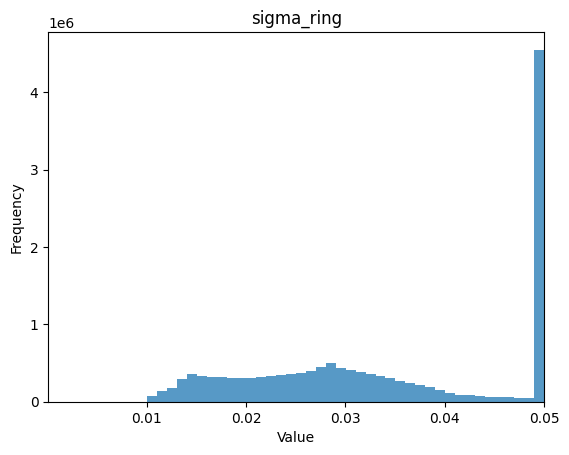

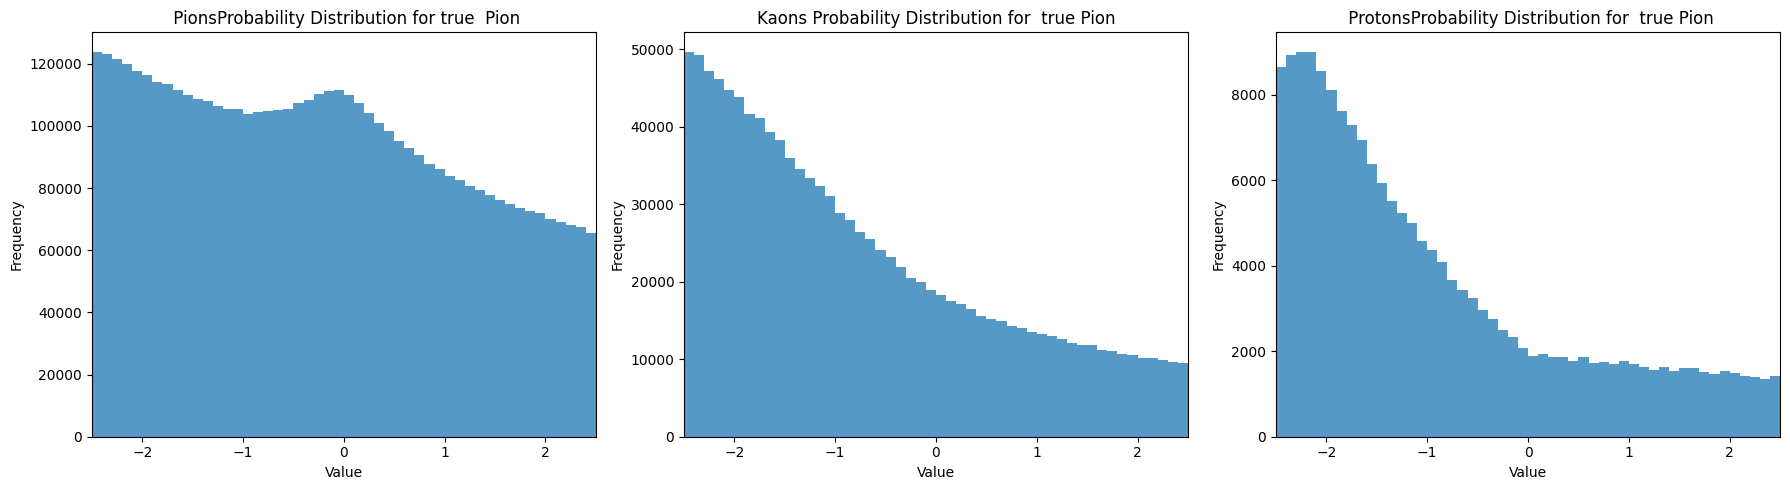

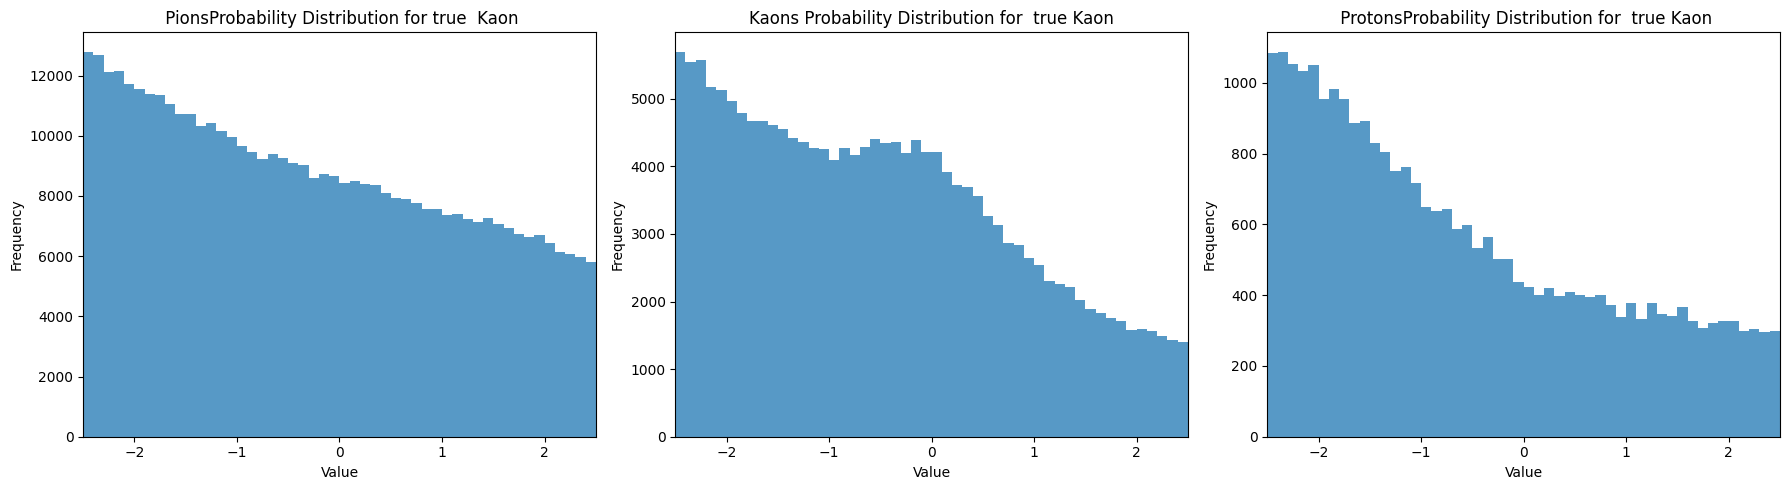

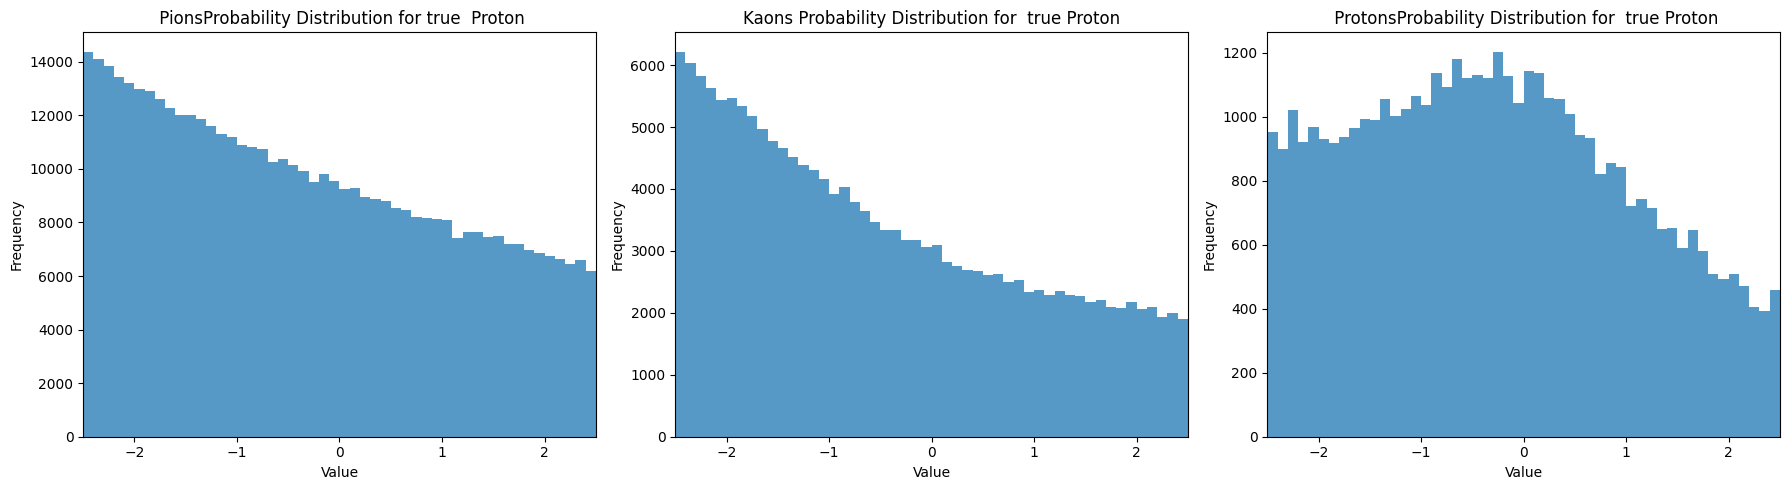

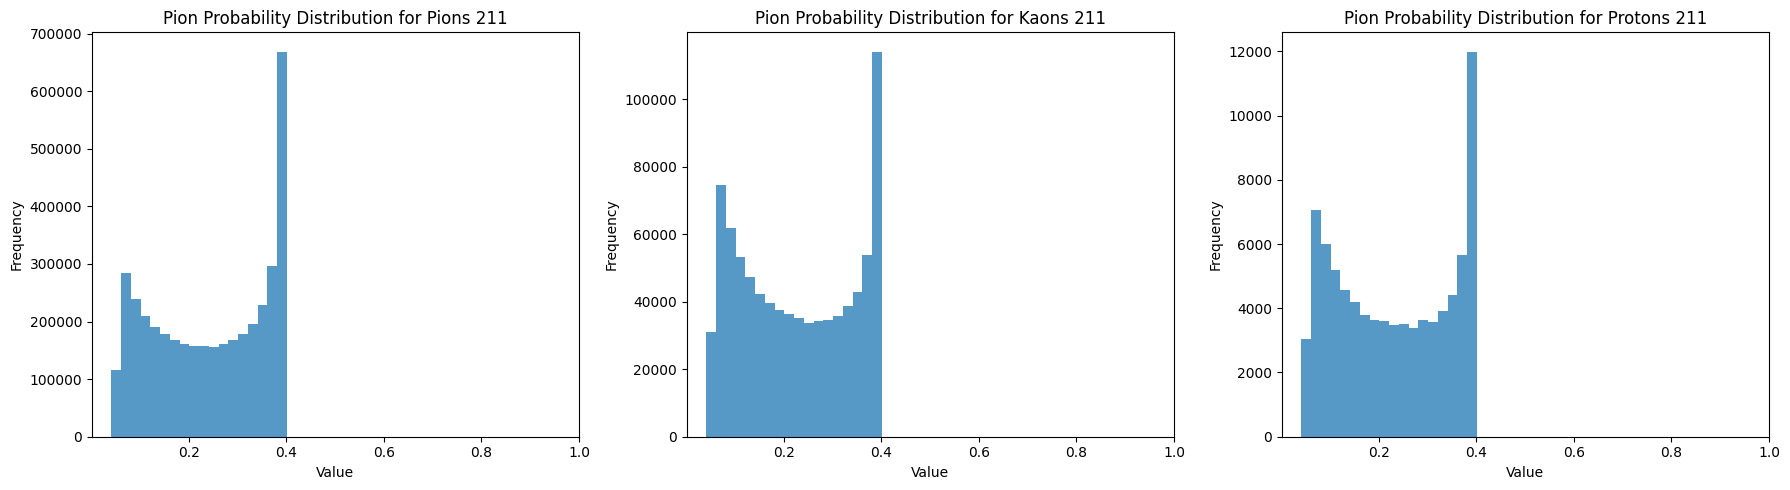

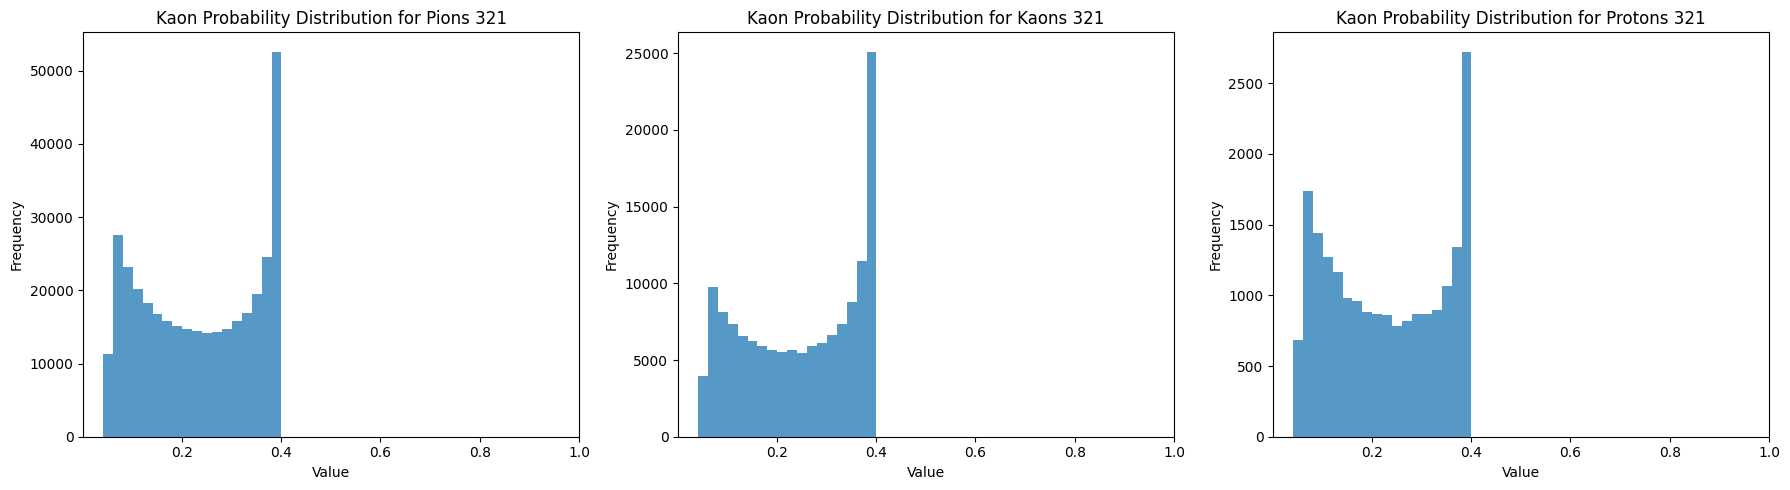

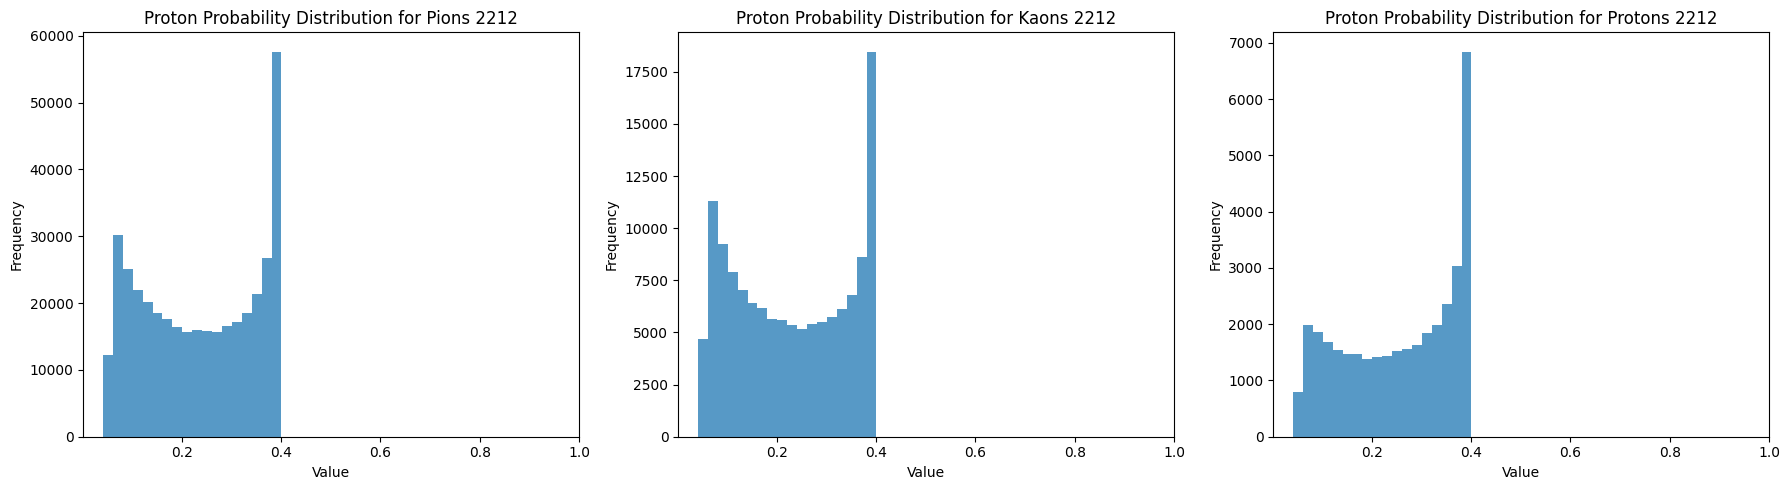

In [ ]:
# Change these as needed
cluster_candidates_string = 'ClusterCandidates;4'
cluster_candidates_string = 'ClusterCandidates;14'

high_clu_string = "HighChargeClusters;4"

def check_and_broadcast(a, b):
    print(f"Shape of a: {a.shape}")
    print(f"Shape of b: {b.shape}")
    if a.ndim != b.ndim:
        # Example: Reshape to match dimensions if logically required
        if a.ndim < b.ndim:
            a = a.reshape((a.shape[0], 1))
        elif b.ndim < a.ndim:
            b = b.reshape((b.shape[0], 1))
    return a, b


def plot_ckov_probs(data_dict):

    for key in data_dict.keys():
        print(f"key {key}")

    clu_cands = data_dict[cluster_candidates_string]
    this_track = data_dict["ThisTrack;1"]
    pdgs = data_dict["McTruth;1"]["mcTruth_pdgCodeTrack;"]
    pdg_to_check = [211,   321,  2212]

    print(f"keys of clucands > {clu_cands.keys()}")
    print(f"this_track key {this_track.keys()}")
    print(f"clu_cands key {clu_cands.keys()}")


    #print(f"shapes > pdg_mask {pdg_mask.shape} clu_cands {clu_cands.shape} this_track {this_track.shape}")

    print(f"type of clucands > {type(clu_cands)}")

    print(f"keys of clucands > {clu_cands.keys()}")


    clu_cands["ClusterData_sigmaRingValues"]
    clu_cands["ClusterData_pionProbs"]
    clu_cands["ClusterData_kaonProbs"]
    clu_cands["ClusterData_protonProbs"]
    clu_cands["ClusterData_thetaCerValues"]

    this_track["TrackAttributes_ckovThPionThisTrack"]
    this_track["TrackAttributes_ckovThKaonThisTrack"]
    this_track["TrackAttributes_ckovThProtonThisTrack"]

    cluster_candidates = all_dicts[cluster_candidates_string]

    sigma_ring =  cluster_candidates['ClusterData_sigmaRingValues']
    th_pion = all_dicts['ThisTrack;1']['TrackAttributes_ckovThPionThisTrack']
    th_kaon = all_dicts['ThisTrack;1']['TrackAttributes_ckovThKaonThisTrack']
    th_proton = all_dicts['ThisTrack;1']['TrackAttributes_ckovThProtonThisTrack']
    theta_cer = cluster_candidates['ClusterData_thetaCerValues']

    sum_prob_all_tracks =  all_dicts["SumProballTracks;1"]["sumProbabilityAllTracks"]

    # ef : apply some maximum value for sigma_ring
    sigma_max_value = 0.05
    sigma_ring = np.minimum(sigma_ring, sigma_max_value)

    plot_histograms(sigma_ring.flatten(), "sigma_ring", (0.0001, 0.05))

    print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")

    print(f"types > th_pion : {type(th_pion)} sigma_ring : {type(sigma_ring)} theta_cer : {type(theta_cer)}" )


    if isinstance(th_pion, pd.Series):

        th_pion_rs = th_pion.values.reshape(-1, 1)
        th_kaon_rs = th_kaon.values.reshape(-1, 1)
        th_proton_rs = th_proton.values.reshape(-1, 1)
    else :
        th_pion_rs = th_pion.reshape(-1, 1)
        th_kaon_rs = th_kaon.reshape(-1, 1)
        th_proton_rs = th_proton.reshape(-1, 1)

    print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")
    print(f"shapes reshaped > sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion_rs {th_pion_rs.shape}")
    sigma_non_zero = sigma_ring > 0



    z_pion = np.where(sigma_non_zero, (th_pion_rs - theta_cer) / sigma_ring, np.nan)
    z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
    z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)


    z_score_hadron_thresh= 2
    import gc

    is_pion_cand = (np.abs(z_pion) < z_score_hadron_thresh) & (th_pion_rs > 0)
    is_kaon_cand  = (np.abs(z_kaon) < z_score_hadron_thresh) & (th_kaon_rs > 0)
    is_proton_cand = (np.abs(z_proton) < z_score_hadron_thresh) & (th_proton_rs > 0)

    is_hadron_cand = (is_pion_cand | is_kaon_cand | is_proton_cand) & (sigma_ring > 0)
    from scipy.stats import norm

    p_pion = norm.pdf(z_pion)*is_pion_cand
    p_kaon = norm.pdf(z_kaon)*is_kaon_cand
    p_proton = norm.pdf(z_proton)*is_proton_cand


    is_proton_cand_rs = is_proton_cand.reshape(-1, 1)

    #print(f"shapes  > z_proton {z_proton.shape},  p_proton {p_proton.shape},  theta_cer {theta_cer.shape} is_proton_cand {is_proton_cand.shape}  th_proton_rs {th_proton_rs.shape}")
    #print(f"shapes  > z_proton {z_proton.shape},  p_proton {p_proton.shape},  theta_cer {theta_cer.shape} is_proton_cand {is_proton_cand.shape}  is_proton_cand_rs {is_proton_cand_rs.shape} th_proton_rs {th_proton_rs.shape}")

    for pdg, name in zip([211, 321, 2212], ['Pion', 'Kaon', 'Proton']):
        pdg_mask = np.abs(pdgs) == pdg
        # plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))
        # plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))
        # plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))


        # plot_histograms(z_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (-2.5, 2.5))
        # plot_histograms(z_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (-2.5, 2.5))
        # plot_histograms(z_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (-2.5, 2.5))



        # Second group of plots
        plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
        plt.subplot(1, 3, 1)
        plot_histograms(z_pion[pdg_mask].flatten(), f' PionsProbability Distribution for true  {name}', (-2.5, 2.5))

        plt.subplot(1, 3, 2)
        plot_histograms(z_kaon[pdg_mask].flatten(), f'Kaons Probability Distribution for  true {name}', (-2.5, 2.5))

        plt.subplot(1, 3, 3)
        plot_histograms(z_proton[pdg_mask].flatten(), f' ProtonsProbability Distribution for  true {name}', (-2.5, 2.5))

        plt.tight_layout()
        plt.show()


    for pdg, name in zip([211, 321, 2212], ['Pion', 'Kaon', 'Proton']):
        pdg_mask = np.abs(pdgs) == pdg
        # plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))
        # plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))
        # plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))


        # plot_histograms(z_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (-2.5, 2.5))
        # plot_histograms(z_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (-2.5, 2.5))
        # plot_histograms(z_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (-2.5, 2.5))


        plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
        plt.subplot(1, 3, 1)

        plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))

        plt.subplot(1, 3, 2)
        plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))

        plt.subplot(1, 3, 3)
        plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))

        plt.tight_layout()
        plt.show()



plot_ckov_probs(all_dicts)


####  z score for ind

key SumProballTracks;1
key ThisTrack;1
key OtherTracks;1
key HighChargeClusters;4
key ClusterCandidates;14
key McTruth;1
keys of clucands > dict_keys(['ClusterData_xValues', 'ClusterData_yValues', 'ClusterData_qValues', 'ClusterData_sizeValues', 'ClusterData_thetaCerValues', 'ClusterData_phiCerValues', 'ClusterData_sigmaRingValues', 'ClusterData_pionProbs', 'ClusterData_kaonProbs', 'ClusterData_protonProbs', 'ClusterData_protonProbsNorm', 'ClusterData_kaonProbsNorm', 'ClusterData_pionProbsNorm', 'ClusterData_sumProbabilityTrack', 'ClusterData_rawSizeValues', 'ClusterData_numRawClustersValues'])
this_track key dict_keys(['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'T

<ipython-input-16-0a5ade884590>:74: RuntimeWarning: divide by zero encountered in divide
  z_pion = np.where(sigma_non_zero, (th_pion_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-16-0a5ade884590>:75: RuntimeWarning: divide by zero encountered in divide
  z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-16-0a5ade884590>:75: RuntimeWarning: invalid value encountered in divide
  z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-16-0a5ade884590>:76: RuntimeWarning: divide by zero encountered in divide
  z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-16-0a5ade884590>:76: RuntimeWarning: invalid value encountered in divide
  z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)


shapes  > z_proton (147542, 756),  p_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  is_proton_cand_rs (111541752, 1) th_proton_rs (147542, 1)
shapes  > z_proton (147542, 756),  p_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  th_proton_rs (147542, 1)
pdg_true 2212 shapes  > z_proton (147542, 756) z_pion (147542, 756)


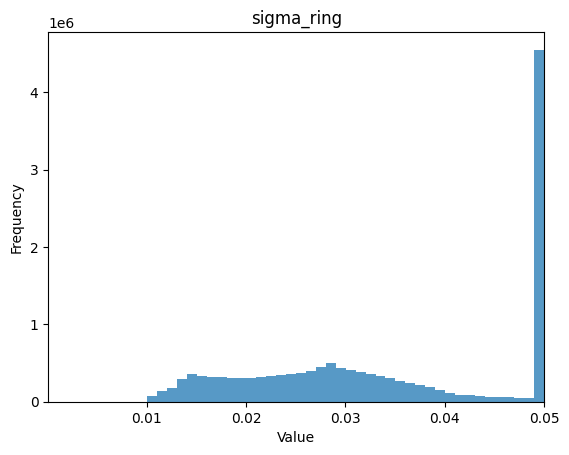

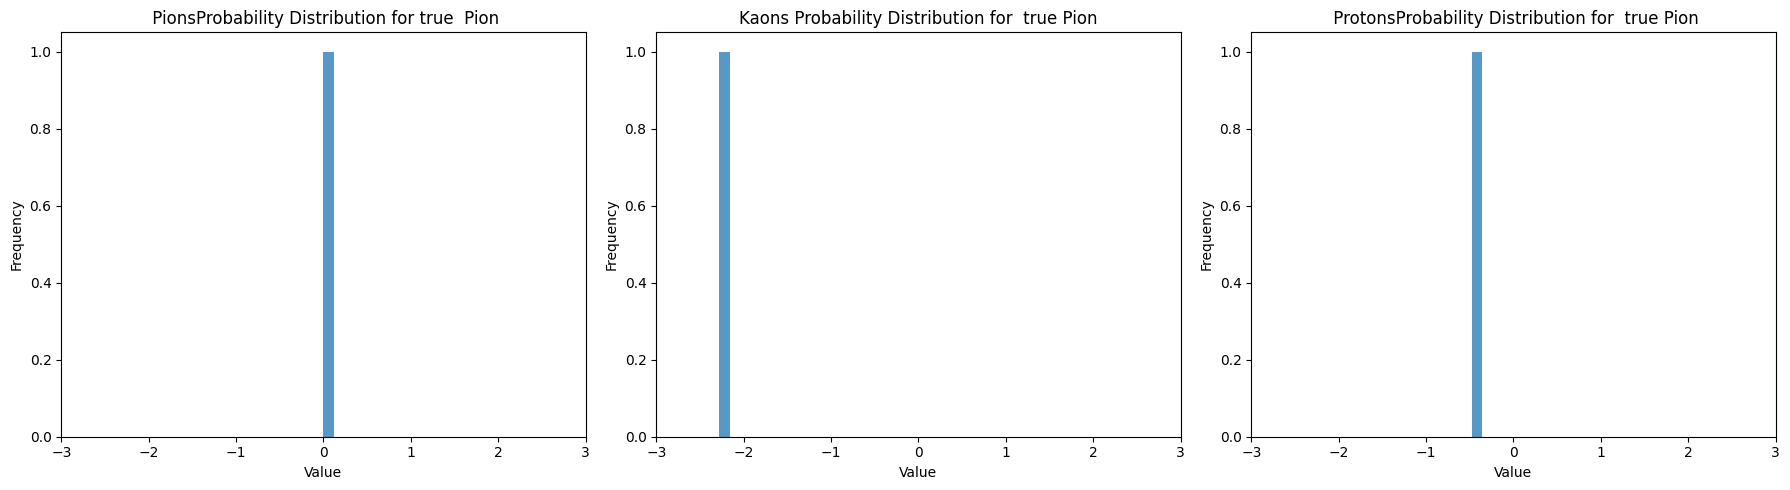

pdg_true 211 shapes  > z_proton (147542, 756) z_pion (147542, 756)


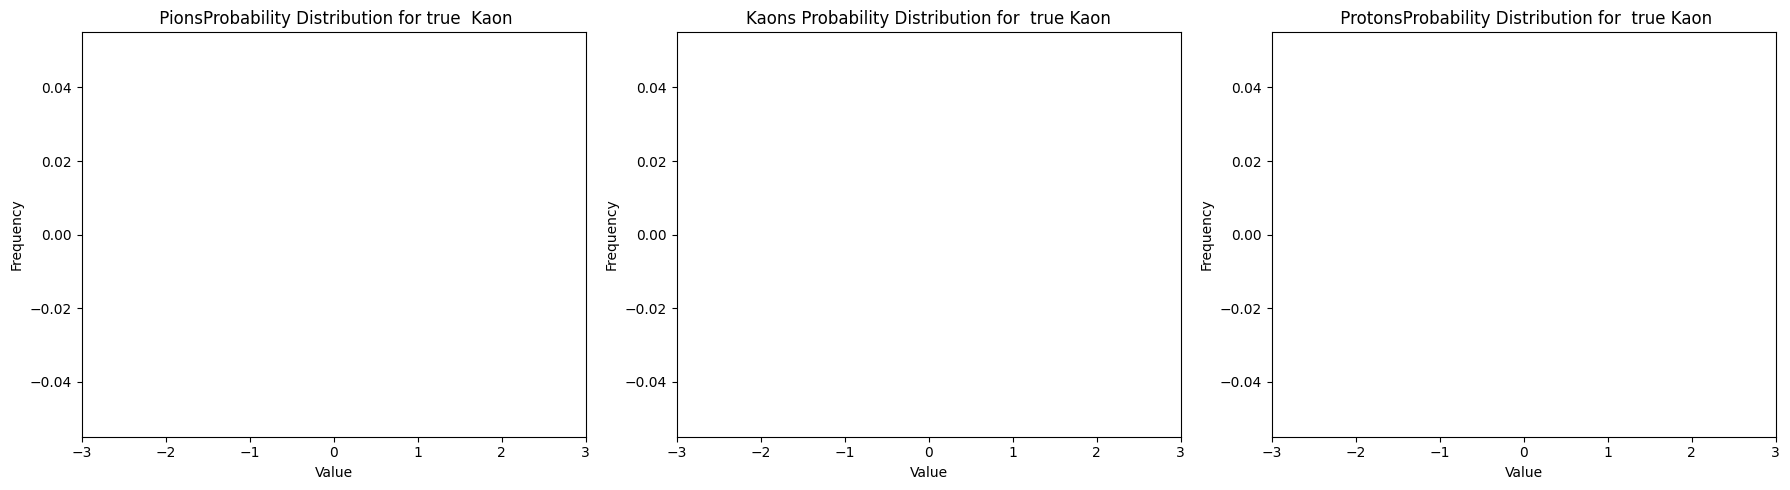

pdg_true -211 shapes  > z_proton (147542, 756) z_pion (147542, 756)


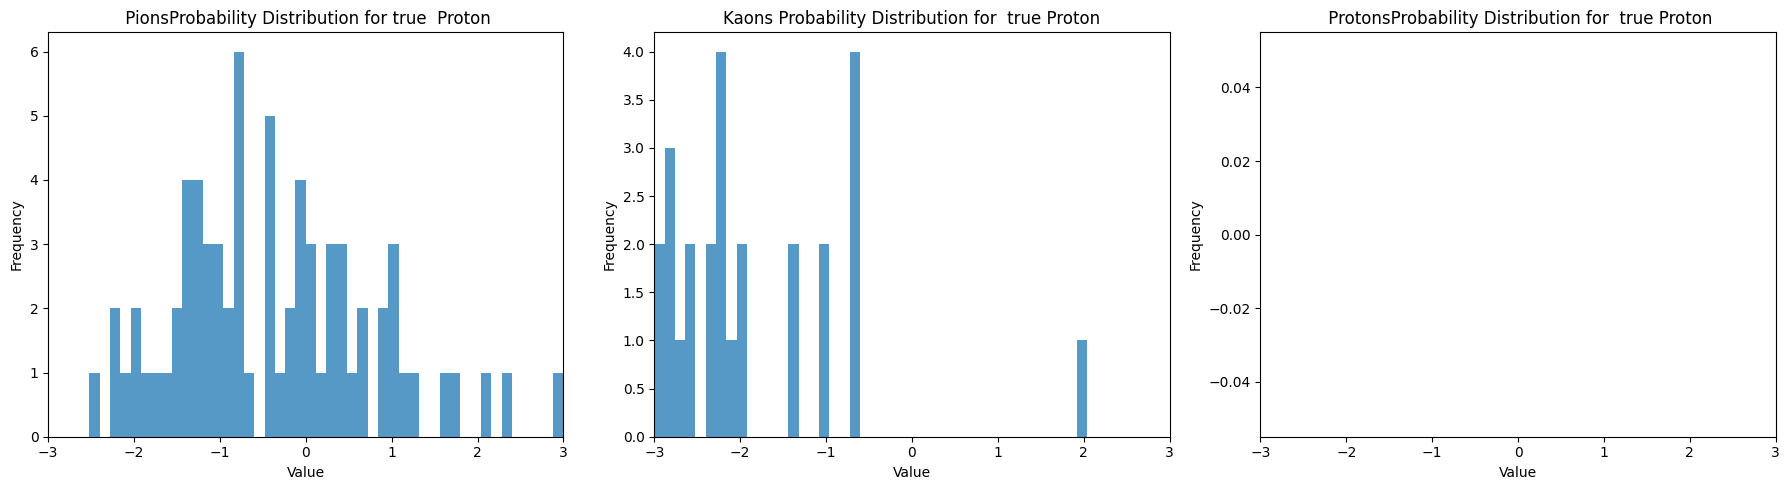

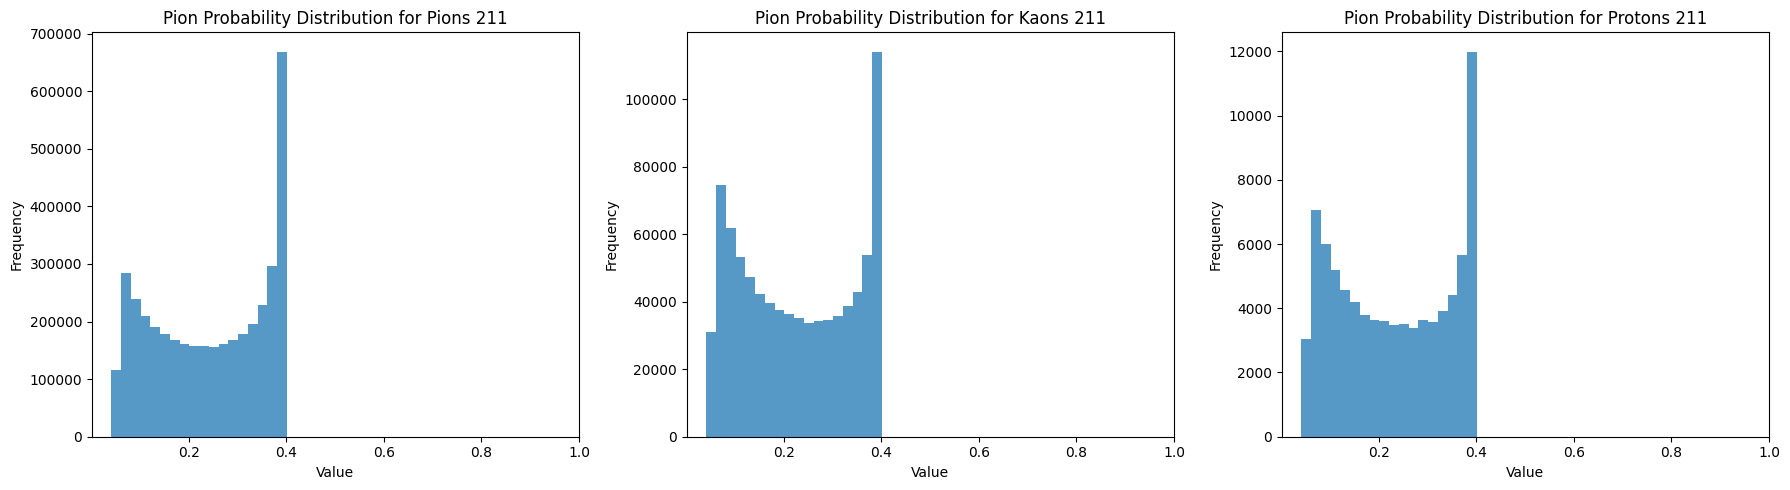

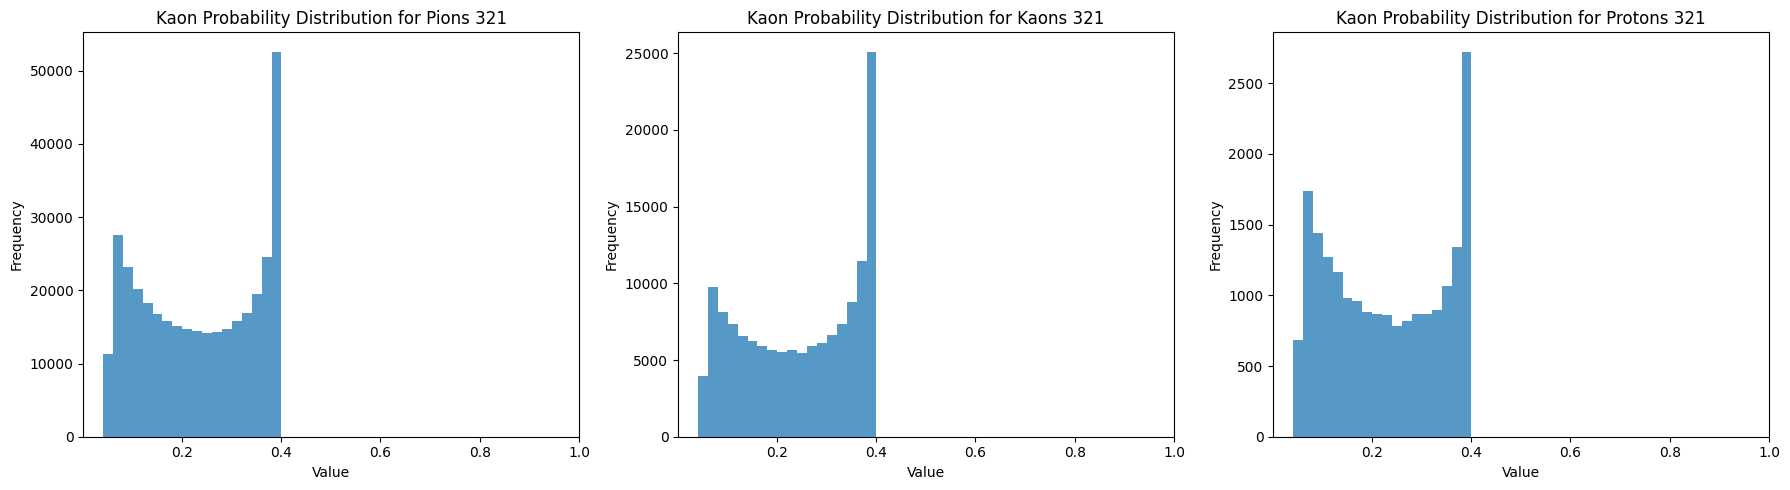

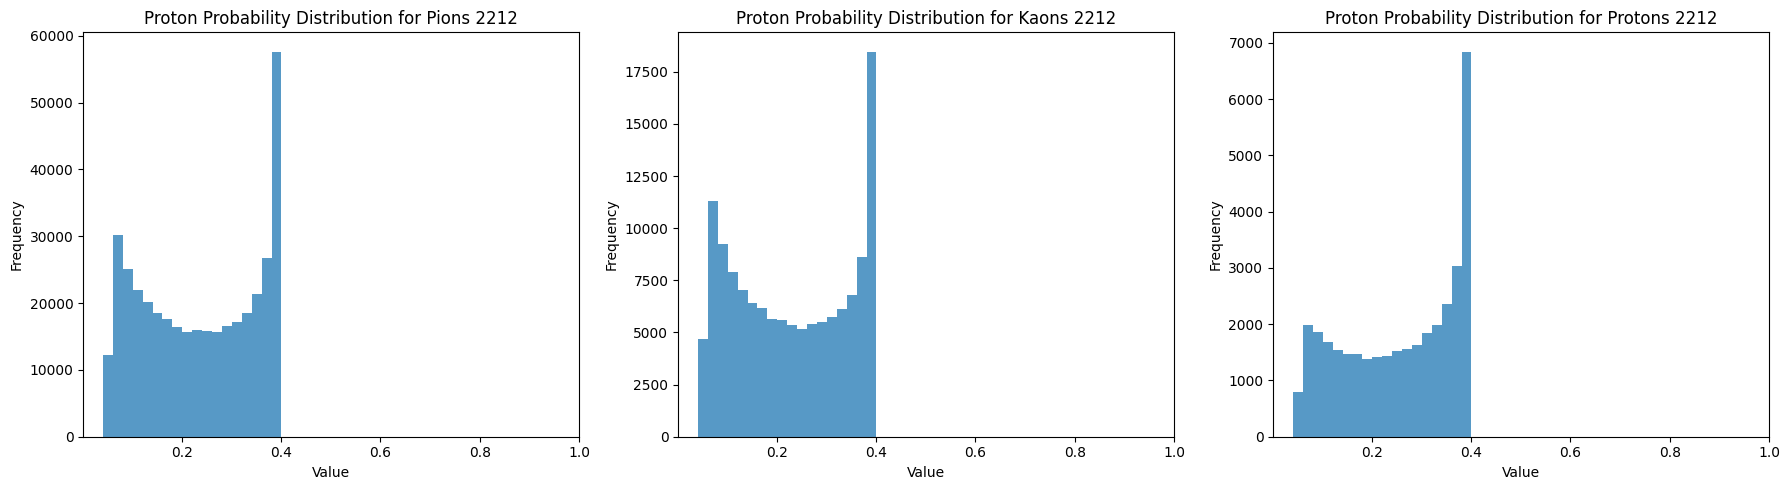

In [ ]:

def plot_ckov_probs(data_dict,idx):

    for key in data_dict.keys():
        print(f"key {key}")

    clu_cands = data_dict[cluster_candidates_string]
    this_track = data_dict["ThisTrack;1"]
    pdgs = data_dict["McTruth;1"]["mcTruth_pdgCodeTrack;"]
    pdg_to_check = [211,   321,  2212]

    print(f"this_track key {this_track.keys()}")

    #print(f"shapes > pdg_mask {pdg_mask.shape} clu_cands {clu_cands.shape} this_track {this_track.shape}")

    print(f"type of clucands > {type(clu_cands)}")
    print(f"keys of clucands > {clu_cands.keys()}")


    clu_cands["ClusterData_sigmaRingValues"]
    clu_cands["ClusterData_pionProbs"]
    clu_cands["ClusterData_kaonProbs"]
    clu_cands["ClusterData_protonProbs"]
    clu_cands["ClusterData_thetaCerValues"]

    this_track["TrackAttributes_ckovThPionThisTrack"]
    this_track["TrackAttributes_ckovThKaonThisTrack"]
    this_track["TrackAttributes_ckovThProtonThisTrack"]

    cluster_candidates = all_dicts[cluster_candidates_string]

    sigma_ring =  cluster_candidates['ClusterData_sigmaRingValues']
    th_pion = all_dicts['ThisTrack;1']['TrackAttributes_ckovThPionThisTrack']
    th_kaon = all_dicts['ThisTrack;1']['TrackAttributes_ckovThKaonThisTrack']
    th_proton = all_dicts['ThisTrack;1']['TrackAttributes_ckovThProtonThisTrack']
    theta_cer = cluster_candidates['ClusterData_thetaCerValues']

    sum_prob_all_tracks =  all_dicts["SumProballTracks;1"]["sumProbabilityAllTracks"]

    # ef : apply some maximum value for sigma_ring
    sigma_max_value = 0.05
    sigma_ring = np.minimum(sigma_ring, sigma_max_value)

    plot_histograms(sigma_ring.flatten(), "sigma_ring", (0.0001, 0.05))

    print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")

    print(f"types > th_pion : {type(th_pion)} sigma_ring : {type(sigma_ring)} theta_cer : {type(theta_cer)}" )


    if isinstance(th_pion, pd.Series):

        th_pion_rs = th_pion.values.reshape(-1, 1)
        th_kaon_rs = th_kaon.values.reshape(-1, 1)
        th_proton_rs = th_proton.values.reshape(-1, 1)
    else :
        th_pion_rs = th_pion.reshape(-1, 1)
        th_kaon_rs = th_kaon.reshape(-1, 1)
        th_proton_rs = th_proton.reshape(-1, 1)

    print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")
    print(f"shapes reshaped > sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion_rs {th_pion_rs.shape}")
    
    # boolean mask to check sigma_ring is over 0
    sigma_non_zero = sigma_ring > 0


    # apply nan to those who do not fulfill
    z_pion = np.where(sigma_non_zero, (th_pion_rs - theta_cer) / sigma_ring, np.nan)
    z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
    z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)


    z_score_hadron_thresh= 2
    import gc
    
    # define whether clusters are candidates or not of species
    is_pion_cand = (np.abs(z_pion) < z_score_hadron_thresh) & (th_pion_rs > 0)
    is_kaon_cand  = (np.abs(z_kaon) < z_score_hadron_thresh) & (th_kaon_rs > 0)
    is_proton_cand = (np.abs(z_proton) < z_score_hadron_thresh) & (th_proton_rs > 0)

    is_hadron_cand = (is_pion_cand | is_kaon_cand | is_proton_cand) & (sigma_ring > 0)
    from scipy.stats import norm

    # take the specie-probability,
    # multiply by the 0/1 mask is is_pion_cand
    p_pion = norm.pdf(z_pion)*is_pion_cand
    p_kaon = norm.pdf(z_kaon)*is_kaon_cand
    p_proton = norm.pdf(z_proton)*is_proton_cand

    # reshape
    is_proton_cand_rs = is_proton_cand.reshape(-1, 1)

    #print(f"shapes  > z_proton {z_proton.shape},  p_proton {p_proton.shape},  theta_cer {theta_cer.shape} is_proton_cand {is_proton_cand.shape}  is_proton_cand_rs {is_proton_cand_rs.shape} th_proton_rs {th_proton_rs.shape}")
    #print(f"shapes  > z_proton {z_proton.shape},  p_proton {p_proton.shape},  theta_cer {theta_cer.shape} is_proton_cand {is_proton_cand.shape}  th_proton_rs {th_proton_rs.shape}")


    for pdg, name in zip([211, 321, 2212], ['Pion', 'Kaon', 'Proton']):
        pdg_mask = np.abs(pdgs) == pdg
        pdg_true = pdgs[idx]
        z_pion_cp = z_pion[idx]
        z_kaon_cp = z_kaon[idx]
        z_proton_cp = z_proton[idx]
        idx += 1
        print(f"pdg_true {pdg_true} shapes  > z_proton {z_proton.shape} z_pion {z_pion.shape}")

        # plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))
        # plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))
        # plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))


        # plot_histograms(z_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (-2.5, 2.5))
        # plot_histograms(z_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (-2.5, 2.5))
        # plot_histograms(z_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (-2.5, 2.5))



        # Second group of plots
        plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
        plt.subplot(1, 3, 1)
        plot_histograms(z_pion_cp[pdg_mask[idx]].flatten(), f' PionsProbability Distribution for true  {name}', (-3, 3))

        plt.subplot(1, 3, 2)
        plot_histograms(z_kaon_cp[pdg_mask[idx]].flatten(), f'Kaons Probability Distribution for  true {name}', (-3, 3))

        plt.subplot(1, 3, 3)
        plot_histograms(z_proton_cp[pdg_mask[idx]].flatten(), f' ProtonsProbability Distribution for  true {name}', (-3, 3))

        plt.tight_layout()
        plt.show()


    for pdg, name in zip([211, 321, 2212], ['Pion', 'Kaon', 'Proton']):
        pdg_mask = np.abs(pdgs) == pdg
        # plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))
        # plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))
        # plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))


        # plot_histograms(z_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (-2.5, 2.5))
        # plot_histograms(z_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (-2.5, 2.5))
        # plot_histograms(z_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (-2.5, 2.5))


        plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
        plt.subplot(1, 3, 1)

        plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))

        plt.subplot(1, 3, 2)
        plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))

        plt.subplot(1, 3, 3)
        plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))

        plt.tight_layout()
        plt.show()



plot_ckov_probs(all_dicts, 1)


####  z score all, filtered

key SumProballTracks;1
key ThisTrack;1
key OtherTracks;1
key HighChargeClusters;4
key ClusterCandidates;14
key McTruth;1
keys of clucands > dict_keys(['ClusterData_xValues', 'ClusterData_yValues', 'ClusterData_qValues', 'ClusterData_sizeValues', 'ClusterData_thetaCerValues', 'ClusterData_phiCerValues', 'ClusterData_sigmaRingValues', 'ClusterData_pionProbs', 'ClusterData_kaonProbs', 'ClusterData_protonProbs', 'ClusterData_protonProbsNorm', 'ClusterData_kaonProbsNorm', 'ClusterData_pionProbsNorm', 'ClusterData_sumProbabilityTrack', 'ClusterData_rawSizeValues', 'ClusterData_numRawClustersValues'])
this_track key dict_keys(['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'T

<ipython-input-17-54221b831910>:86: RuntimeWarning: divide by zero encountered in divide
  z_pion = np.where(sigma_non_zero, (th_pion_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-17-54221b831910>:87: RuntimeWarning: divide by zero encountered in divide
  z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-17-54221b831910>:87: RuntimeWarning: invalid value encountered in divide
  z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-17-54221b831910>:88: RuntimeWarning: divide by zero encountered in divide
  z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)
<ipython-input-17-54221b831910>:88: RuntimeWarning: invalid value encountered in divide
  z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)


shapes  > z_proton (147542, 756),  p_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  th_proton_rs (147542, 1)
shapes  > z_proton (147542, 756),  p_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  is_proton_cand_rs (111541752, 1) th_proton_rs (147542, 1)
shapes  > z_proton (147542, 756),  filtered_z_proton (147542, 756),  theta_cer (147542, 756) is_proton_cand (147542, 756)  th_proton_rs (147542, 1)


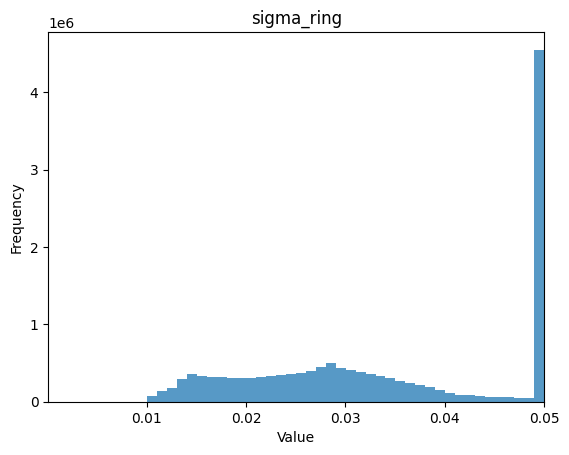

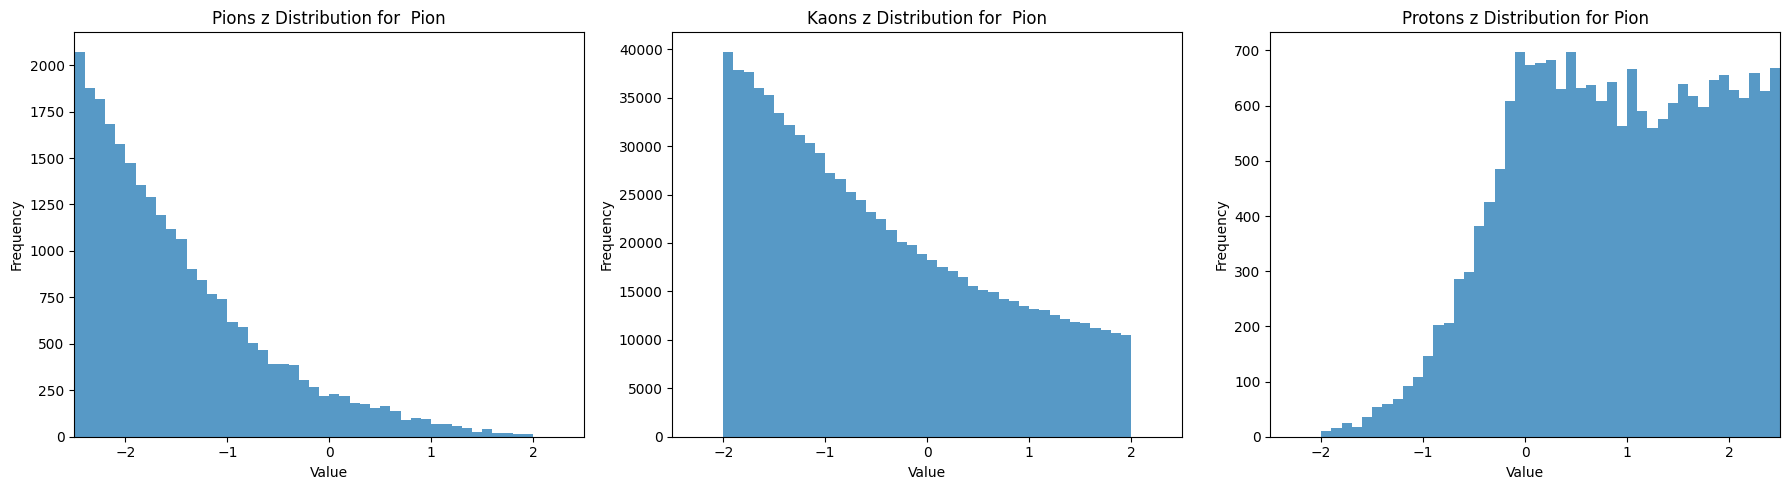

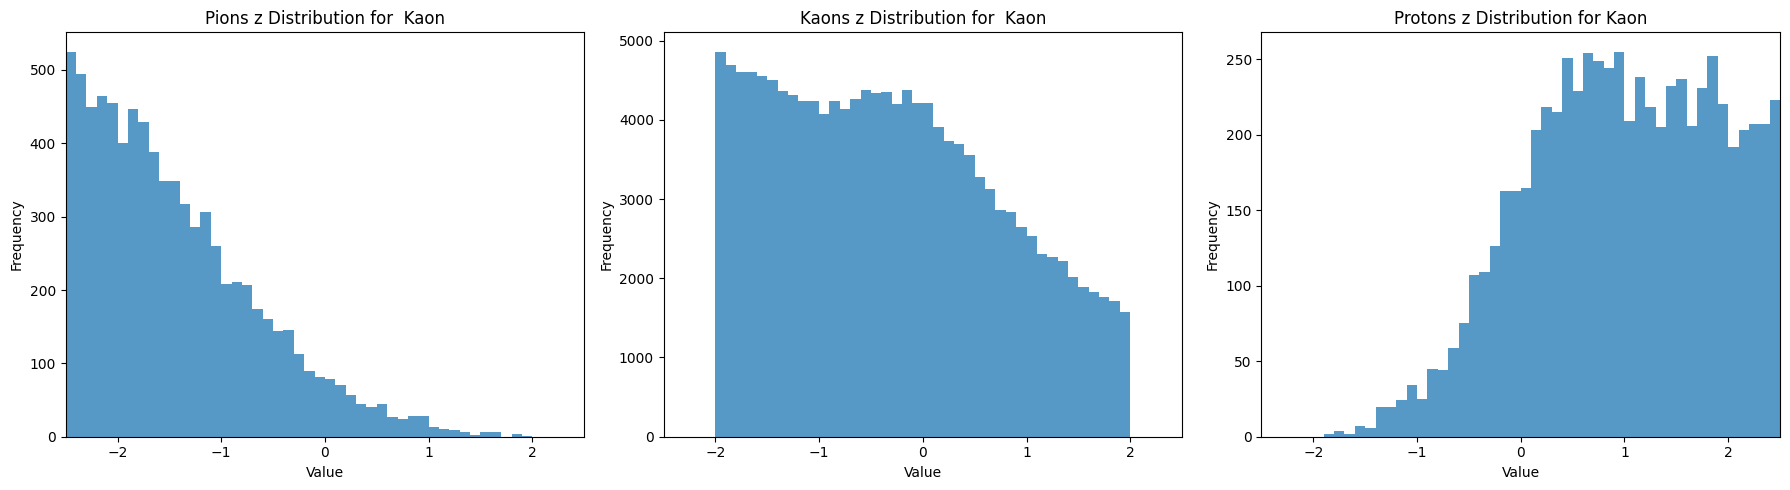

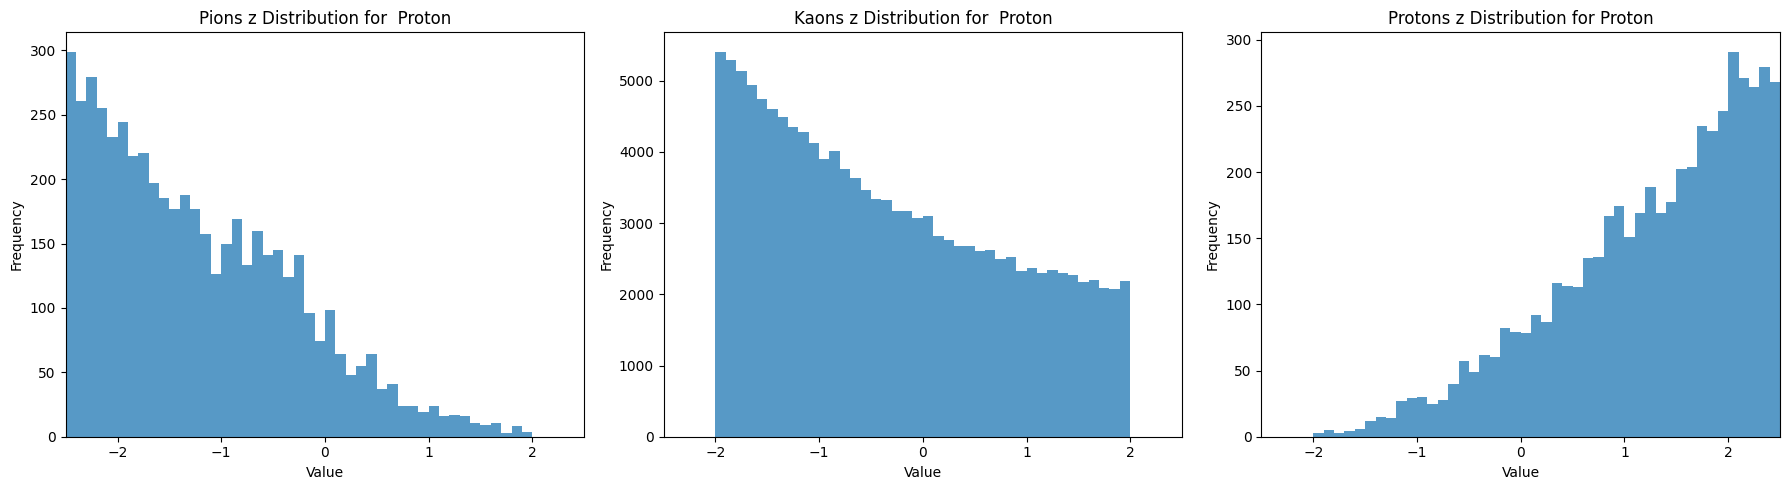

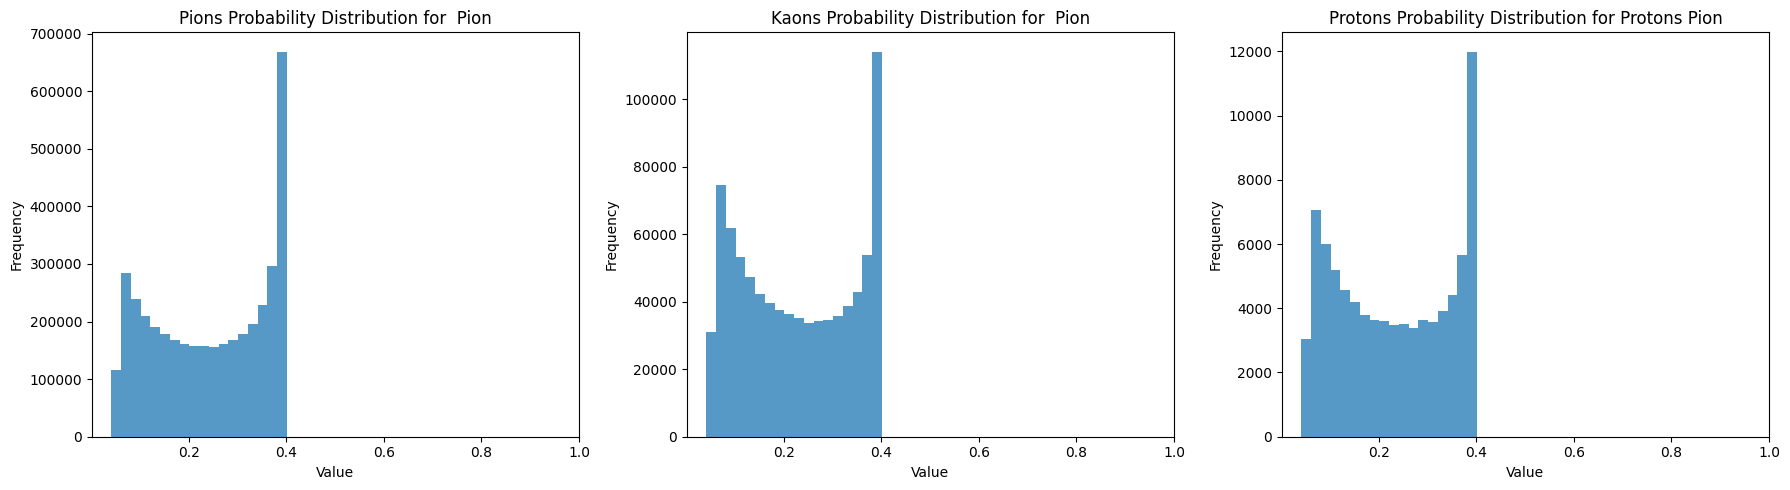

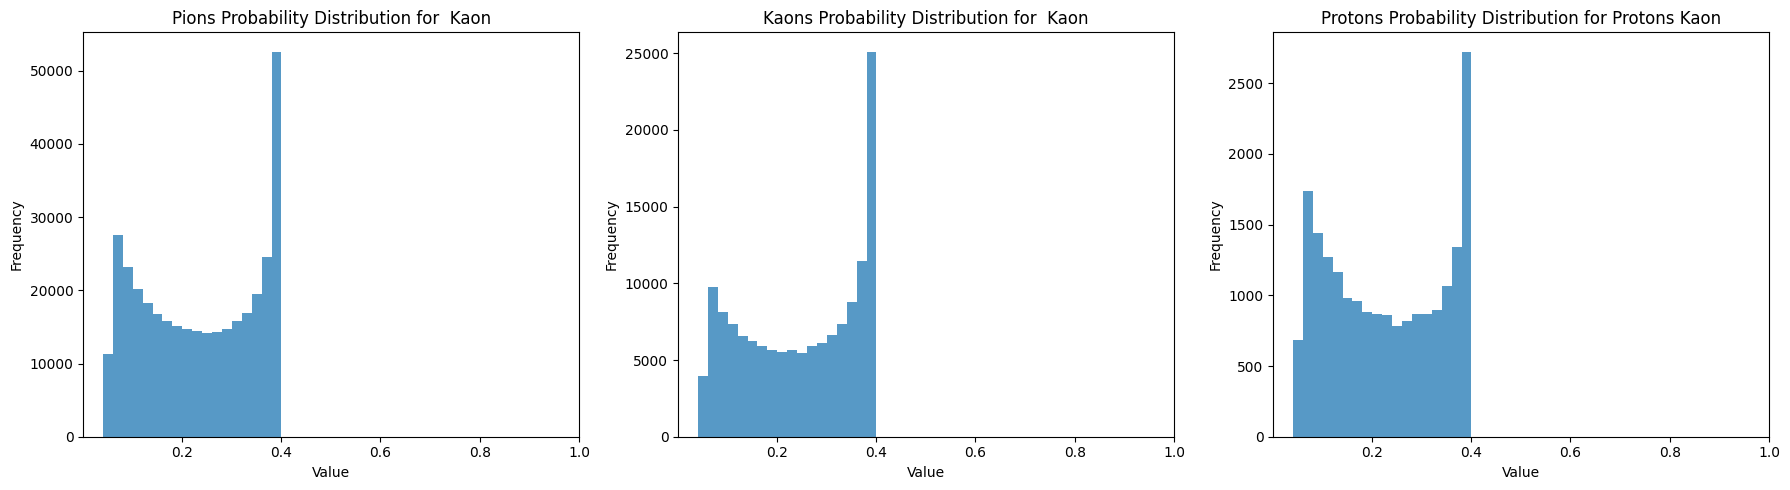

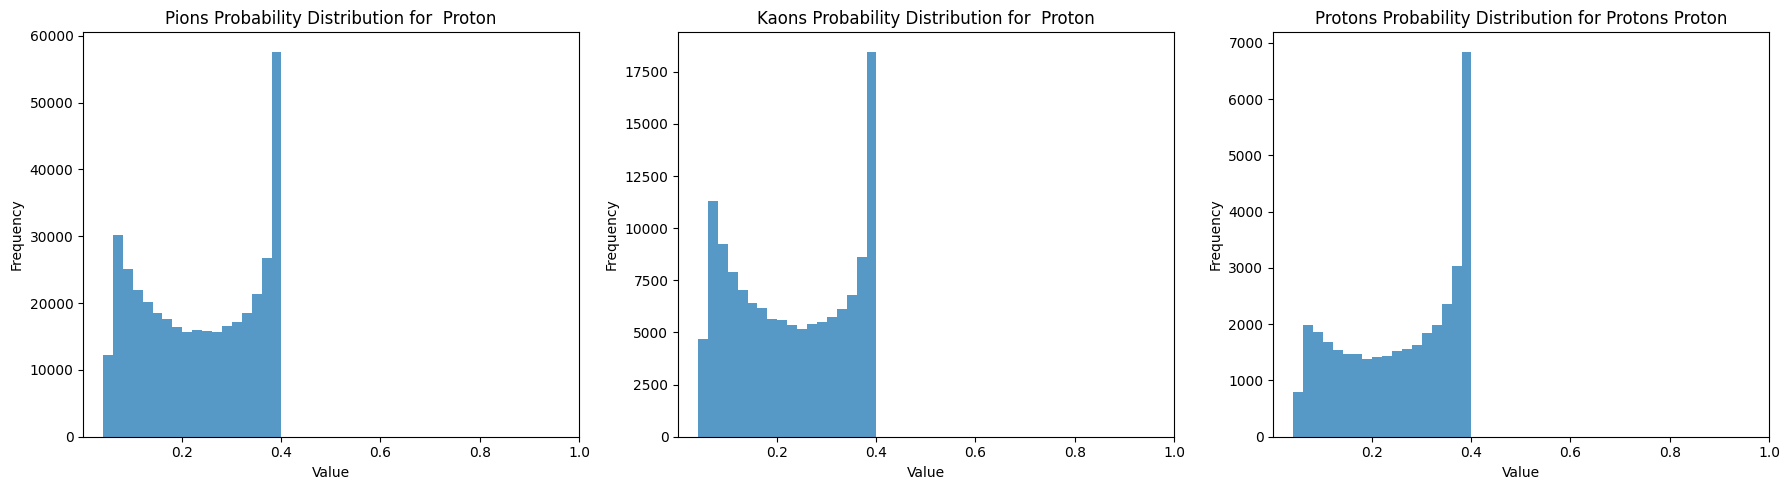

In [ ]:
def check_and_broadcast(a, b):
    print(f"Shape of a: {a.shape}")
    print(f"Shape of b: {b.shape}")
    if a.ndim != b.ndim:
        # Example: Reshape to match dimensions if logically required
        if a.ndim < b.ndim:
            a = a.reshape((a.shape[0], 1))
        elif b.ndim < a.ndim:
            b = b.reshape((b.shape[0], 1))
    return a, b


def plot_ckov_probs(data_dict):

    for key in data_dict.keys():
        print(f"key {key}")

    clu_cands = data_dict[cluster_candidates_string]
    this_track = data_dict["ThisTrack;1"]
    pdgs = data_dict["McTruth;1"]["mcTruth_pdgCodeTrack;"]
    pdg_to_check = [211,   321,  2212]


    clu_cands["ClusterData_sigmaRingValues"]
    clu_cands["ClusterData_pionProbs"]
    clu_cands["ClusterData_kaonProbs"]
    clu_cands["ClusterData_protonProbs"]
    clu_cands["ClusterData_thetaCerValues"]

    this_track["TrackAttributes_ckovThPionThisTrack"]
    this_track["TrackAttributes_ckovThKaonThisTrack"]
    this_track["TrackAttributes_ckovThProtonThisTrack"]

    cluster_candidates = all_dicts['ClusterCandidates;14']

    sigma_ring =  cluster_candidates['ClusterData_sigmaRingValues']
    th_pion = all_dicts['ThisTrack;1']['TrackAttributes_ckovThPionThisTrack']
    th_kaon = all_dicts['ThisTrack;1']['TrackAttributes_ckovThKaonThisTrack']
    th_proton = all_dicts['ThisTrack;1']['TrackAttributes_ckovThProtonThisTrack']
    theta_cer = cluster_candidates['ClusterData_thetaCerValues']

    sum_prob_all_tracks =  all_dicts["SumProballTracks;1"]["sumProbabilityAllTracks"]

    # ef : apply some maximum value for sigma_ring
    sigma_max_value = 0.05
    sigma_ring = np.minimum(sigma_ring, sigma_max_value)

    plot_histograms(sigma_ring.flatten(), "sigma_ring", (0.0001, 0.05))

    print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")
    print(f"types > th_pion : {type(th_pion)} sigma_ring : {type(sigma_ring)} theta_cer : {type(theta_cer)}" )


    if isinstance(th_pion, pd.Series):

        th_pion_rs = th_pion.values.reshape(-1, 1)
        th_kaon_rs = th_kaon.values.reshape(-1, 1)
        th_proton_rs = th_proton.values.reshape(-1, 1)
    else :
        th_pion_rs = th_pion.reshape(-1, 1)
        th_kaon_rs = th_kaon.reshape(-1, 1)
        th_proton_rs = th_proton.reshape(-1, 1)

    print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")
    print(f"shapes reshaped > sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion_rs {th_pion_rs.shape}")
    sigma_non_zero = sigma_ring > 0



    z_pion = np.where(sigma_non_zero, (th_pion_rs - theta_cer) / sigma_ring, np.nan)
    z_kaon = np.where(sigma_non_zero, (th_kaon_rs - theta_cer) / sigma_ring, np.nan)
    z_proton = np.where(sigma_non_zero, (th_proton_rs - theta_cer) / sigma_ring, np.nan)


    z_score_hadron_thresh= 2
    import gc

    is_pion_cand = (np.abs(z_pion) < z_score_hadron_thresh) & (th_pion_rs > 0)
    is_kaon_cand  = (np.abs(z_kaon) < z_score_hadron_thresh) & (th_kaon_rs > 0)
    is_proton_cand = (np.abs(z_proton) < z_score_hadron_thresh) & (th_proton_rs > 0)

    is_hadron_cand = (is_pion_cand | is_kaon_cand | is_proton_cand) & (sigma_ring > 0)
    from scipy.stats import norm

    p_pion = norm.pdf(z_pion)*is_pion_cand
    p_kaon = norm.pdf(z_kaon)*is_kaon_cand
    p_proton = norm.pdf(z_proton)*is_proton_cand


    filtered_z_pion = np.where(is_pion_cand, z_proton, np.nan)  # Replace non-candidates with NaN
    filtered_z_kaon = np.where(is_kaon_cand, z_kaon, np.nan)  # Replace non-candidates with NaN
    filtered_z_proton = np.where(is_proton_cand, z_pion, np.nan)  # Replace non-candidates with NaN

    is_proton_cand_rs = is_proton_cand.reshape(-1, 1)


    for pdg, name in zip([211, 321, 2212], ['Pion', 'Kaon', 'Proton']):
        pdg_mask = np.abs(pdgs) == pdg
        # plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))
        # plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))
        # plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))


        # plot_histograms(z_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (-2.5, 2.5))
        # plot_histograms(z_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (-2.5, 2.5))
        # plot_histograms(z_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (-2.5, 2.5))



        # Second group of plots
        plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
        plt.subplot(1, 3, 1)
        plot_histograms(filtered_z_pion[pdg_mask].flatten(), f'Pions z Distribution for  {name}', (-2.5, 2.5))

        plt.subplot(1, 3, 2)
        plot_histograms(filtered_z_kaon[pdg_mask].flatten(), f'Kaons z Distribution for  {name}', (-2.5, 2.5))

        plt.subplot(1, 3, 3)
        plot_histograms(filtered_z_proton[pdg_mask].flatten(), f'Protons z Distribution for {name}', (-2.5, 2.5))

        plt.tight_layout()
        plt.show()


    for pdg, name in zip([211, 321, 2212], ['Pion', 'Kaon', 'Proton']):
        pdg_mask = np.abs(pdgs) == pdg
        # plot_histograms(p_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (0.001, 1))
        # plot_histograms(p_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (0.001, 1))
        # plot_histograms(p_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (0.001, 1))


        # plot_histograms(z_pion[pdg_mask].flatten(), f'{name} Probability Distribution for Pions {pdg}', (-2.5, 2.5))
        # plot_histograms(z_kaon[pdg_mask].flatten(), f'{name} Probability Distribution for Kaons {pdg}', (-2.5, 2.5))
        # plot_histograms(z_proton[pdg_mask].flatten(), f'{name} Probability Distribution for Protons {pdg}', (-2.5, 2.5))


        plt.figure(figsize=(18, 5))  # Adjust the figure size as needed
        plt.subplot(1, 3, 1)

        plot_histograms(p_pion[pdg_mask].flatten(), f'Pions Probability Distribution for  {name}', (0.001, 1))

        plt.subplot(1, 3, 2)
        plot_histograms(p_kaon[pdg_mask].flatten(), f'Kaons Probability Distribution for  {name}', (0.001, 1))

        plt.subplot(1, 3, 3)
        plot_histograms(p_proton[pdg_mask].flatten(), f'Protons Probability Distribution for Protons {name}', (0.001, 1))

        plt.tight_layout()
        plt.show()



plot_ckov_probs(all_dicts)


In [ ]:
#all_dicts_cp = copy(#all_dicts)

## Filter distances

In [ ]:
def apply_distance_thresh(distance_thresh = 1):

    """
        Modifies data in-place based on the mip-pc cut
        NB ! overwrites original data !

    """


    pdg_track = all_dicts["McTruth;1"]["mcTruth_pdgCodeTrack;"]
    pdgs_to_reconstruct = [211, 321, 2212]

    pdg_mask = np.isin(np.abs(pdg_track), pdgs_to_reconstruct)


    ckov_recon = all_dicts["ThisTrack;1"]["TrackAttributes_ckovReconThisTrack"]


    x_mip = all_dicts["ThisTrack;1"]["TrackAttributes_xMipThisTrack"]
    y_mip = all_dicts["ThisTrack;1"]["TrackAttributes_yMipThisTrack"]
    x_pc = all_dicts["ThisTrack;1"]["TrackAttributes_xPCThisTrack"]
    y_pc = all_dicts["ThisTrack;1"]["TrackAttributes_yPCThisTrack"]

    momentum = all_dicts["ThisTrack;1"]["TrackAttributes_momentumThisTrack"]


    # Calculate the Euclidean distance
    dist_mip_pc = np.sqrt((x_mip - x_pc)**2 + (y_mip - y_pc)**2)

    all_dicts["ThisTrack;1"]["TrackAttributes_mipPcDistThisTrack"] = dist_mip_pc
    dist = dist_mip_pc


    is_num_phots_ok = all_dicts["McTruth;1"]["mcTruth_isTrackToReconKnownPdg"]


    ckov_recon_mask = ckov_recon > 0

    dist_mask = dist < distance_thresh

    # only considering momentum from 1 to 5 GeV/c
    momentum_mask = (momentum > 1) & (momentum < 5)

    if isinstance(momentum_mask, pd.Series):
        momentum_mask = momentum_mask.values.reshape(-1, 1)
    else:
        momentum_mask = momentum_mask.reshape(-1, 1)


    if isinstance(is_num_phots_ok, pd.Series):
        is_num_phots_ok = is_num_phots_ok.values.reshape(-1, 1)
    else:
        is_num_phots_ok = is_num_phots_ok.reshape(-1, 1)


    if isinstance(dist_mask, pd.Series):
        dist_mask = dist_mask.values.reshape(-1, 1)
    else:
        dist_mask = dist_mask.reshape(-1, 1)

    if isinstance(ckov_recon_mask, pd.Series):
        ckov_recon_mask = ckov_recon_mask.values.reshape(-1, 1)
    else:
        ckov_recon_mask = ckov_recon_mask.reshape(-1, 1)

    if isinstance(pdg_mask, pd.Series):
        pdg_mask = pdg_mask.values.reshape(-1, 1)
    else:
        pdg_mask = pdg_mask.reshape(-1, 1)


    print(f"Count of non-zero in is_num_phots_ok: {np.count_nonzero(is_num_phots_ok)}")
    print(f"Count of non-zero in dist_mask: {np.count_nonzero(dist_mask)}")
    print(f"Count of non-zero in pdg_mask: {np.count_nonzero(pdg_mask)}")
    print(f"Count of non-zero in ckov_recon_mask: {np.count_nonzero(ckov_recon_mask)}")

    # Combine masks using logical AND
    combined_mask = is_num_phots_ok & dist_mask & pdg_mask & ckov_recon_mask & momentum_mask

    # Print the count of non-zero elements in the combined mask
    print(f"Count of non-zero in combined mask: {np.count_nonzero(combined_mask)}")


    for key in all_dicts.keys():

        inner_dict = all_dicts[key]
        for inner_key in inner_dict.keys():

            data = inner_dict[inner_key]

            print(f" key {key}  inner_key {inner_key} > type {type(data)} ")

            if isinstance(data, pd.Series):
                data = data.values.reshape(-1, 1)
            elif isinstance(data, np.ndarray) and data.ndim == 1:
                data = data.reshape(-1, 1)


            # Apply mask if dimensions are compatible
            if data.shape == dist_mask.shape:
                data_masked = data[combined_mask]
                print(f"Data_masked shape > {data_masked.shape}")
            else:
                # Apply mask to each column of the data. This assumes data has at least two dimensions.
                if data.ndim > 1 and dist_mask.shape[1] == 1:
                    # Flatten the mask to (n,) for compatibility

                    flat_mask = combined_mask.flatten()
                    data_masked = data[flat_mask, :]

                else:
                    print("Error: Mask and data shape incompatible.")


            all_dicts[key][inner_key] = data_masked

In [ ]:
try:
    del combined_df
    gc.collect()

except Exception as e:
    print(f"already deleted")

already deleted


In [ ]:
apply_distance_thresh(distance_thresh = 2)

Count of non-zero in is_num_phots_ok: 28712
Count of non-zero in dist_mask: 40441
Count of non-zero in pdg_mask: 140212
Count of non-zero in ckov_recon_mask: 109014
Count of non-zero in combined mask: 15175
 key SumProballTracks;1  inner_key sumProbabilityAllTracks > type <class 'numpy.ndarray'> 
 key ThisTrack;1  inner_key TrackAttributes_xMipThisTrack > type <class 'pandas.core.series.Series'> 
Data_masked shape > (15175,)
 key ThisTrack;1  inner_key TrackAttributes_yMipThisTrack > type <class 'pandas.core.series.Series'> 
Data_masked shape > (15175,)
 key ThisTrack;1  inner_key TrackAttributes_xRadThisTrack > type <class 'pandas.core.series.Series'> 
Data_masked shape > (15175,)
 key ThisTrack;1  inner_key TrackAttributes_yRadThisTrack > type <class 'pandas.core.series.Series'> 
Data_masked shape > (15175,)
 key ThisTrack;1  inner_key TrackAttributes_xPCThisTrack > type <class 'pandas.core.series.Series'> 
Data_masked shape > (15175,)
 key ThisTrack;1  inner_key TrackAttributes_yPCT

### dump filtered data

In [ ]:
import pickle
import os

# Specify the directory path and the filename

directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleGunHO/'
filename = 'all_dicts_HO_filtered.pkl'


directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/'
filename = 'all_dicts_LEAD_filtered.pkl'

# Ensure the directory exists
os.makedirs(directory_path, exist_ok=True)

# Full path for the output file
full_path = os.path.join(directory_path, filename)

# Serialize the data and save it using Pickle
with open(full_path, 'wb') as file:
    pickle.dump(all_dicts, file)

print(f"Data successfully saved to {full_path}")


Data successfully saved to /content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/all_dicts_filtered.pkl


### read filtered data

In [ ]:
import pickle
import os



directory_path = '/content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/'
filename = 'all_dicts_LEAD_filtered.pkl'


# Full path to the output file
full_path = os.path.join(directory_path, filename)

# Deserialize the data from the saved Pickle file
with open(full_path, 'rb') as file:
    all_dicts = pickle.load(file)

print("Data successfully loaded from:", full_path)
# Optionally, inspect some of the data
print(type(all_dicts))  # Check the type to ensure it is a dict
print({k: v for k, v in all_dicts.items()})  # Print a preview of the data




Data successfully loaded from: /content/drive/MyDrive/ColabNotebooks/root2Pandas/LeadLead/all_dicts_filtered.pkl
<class 'dict'>
{'SumProballTracks;1': {'sumProbabilityAllTracks': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.26923186, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.1569425 , 0.47628033, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)}, 'ThisTrack;1': {'TrackAttributes_xMipThisTrack': array([ 80.92295837, 119.13568115,  16.16900826, ..., 129.85012817,
         9.70699883, 123.08870697]), 'TrackAttributes_yMipThisTrack': array([37.72836685, 67.25973511, 91.7791

#### plot filtered data, scale

key ThisTrack;1 key_inner TrackAttributes_thetaPThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_thetaPThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 0.7293233275413513
key ThisTrack;1 key_inner TrackAttributes_thetaPThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[0.09160855 0.15341447 0.15377805 ... 0.32584187 0.12423971 0.14526805]


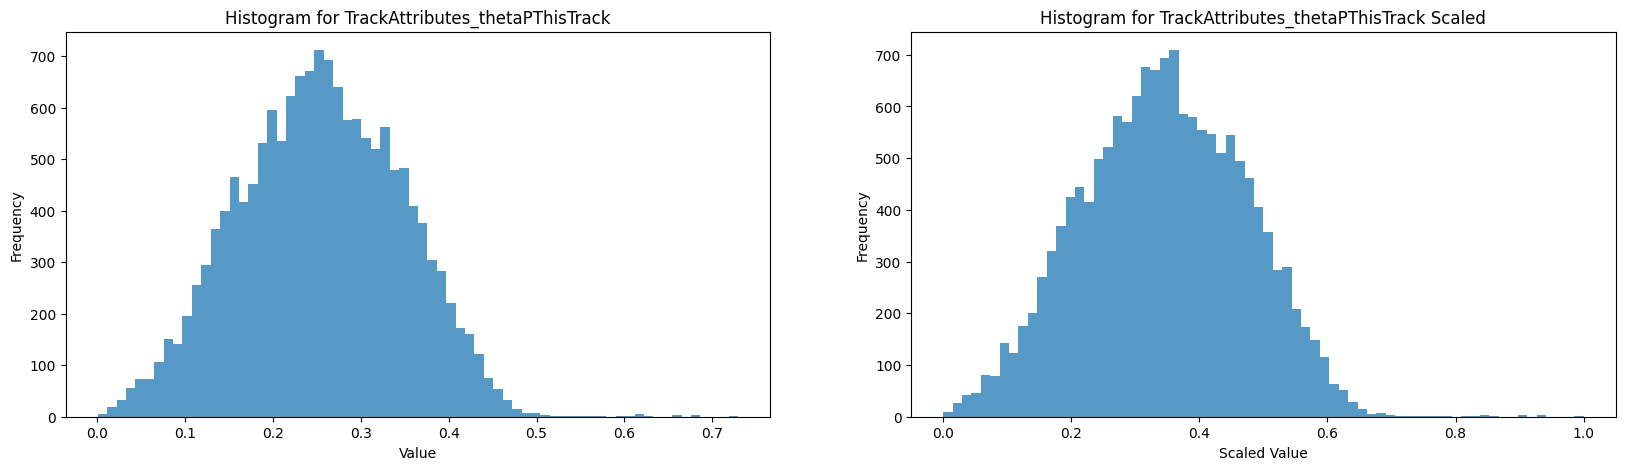

key ThisTrack;1 key_inner TrackAttributes_phiPThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_phiPThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 3.1356167793273926
key ThisTrack;1 key_inner TrackAttributes_phiPThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[ 1.14948857 -0.84238219 -2.3427155  ...  1.17696071  2.55844879
 -0.71876144]


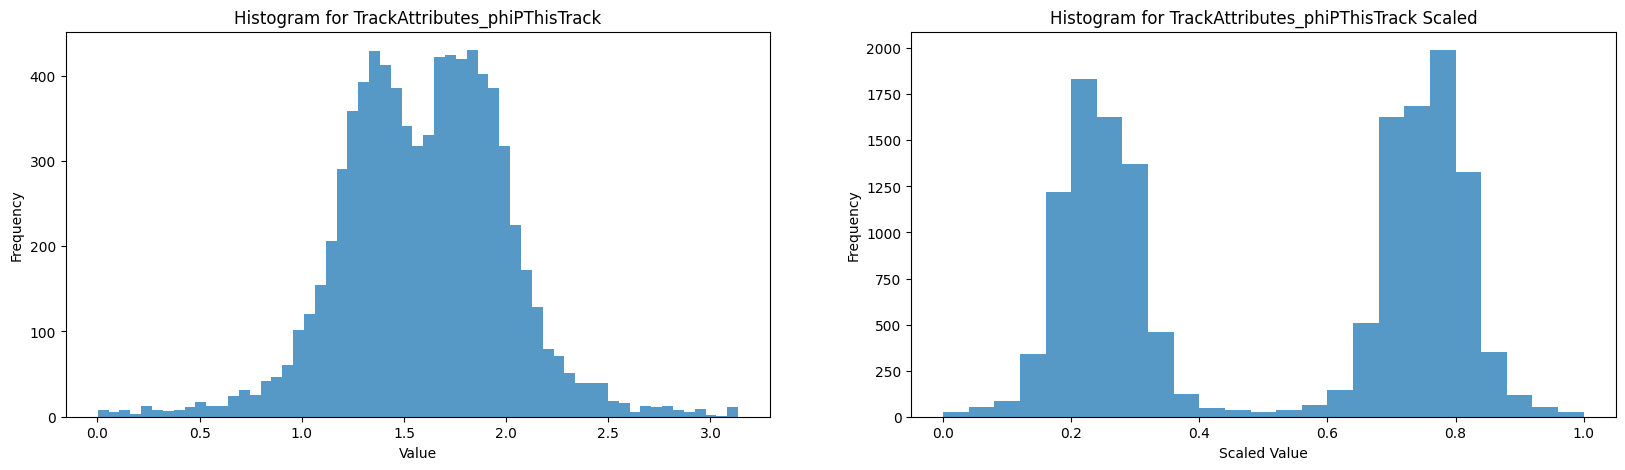

key ThisTrack;1 key_inner TrackAttributes_momentumThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_momentumThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 4.9879584312438965
key ThisTrack;1 key_inner TrackAttributes_momentumThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[2.54467511 3.20848179 2.27600718 ... 1.30543315 3.10608888 3.011024  ]


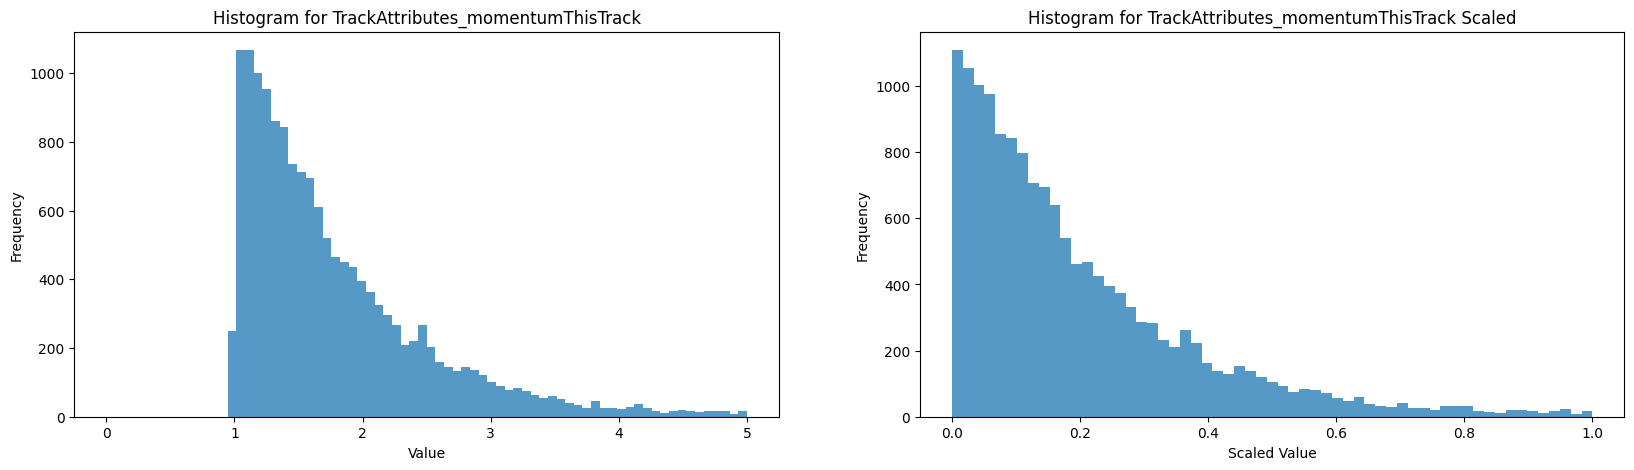

key ThisTrack;1 key_inner TrackAttributes_qMipThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_qMipThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 17188
key ThisTrack;1 key_inner TrackAttributes_qMipThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[ 393  322  639 ...  252  223 1332]


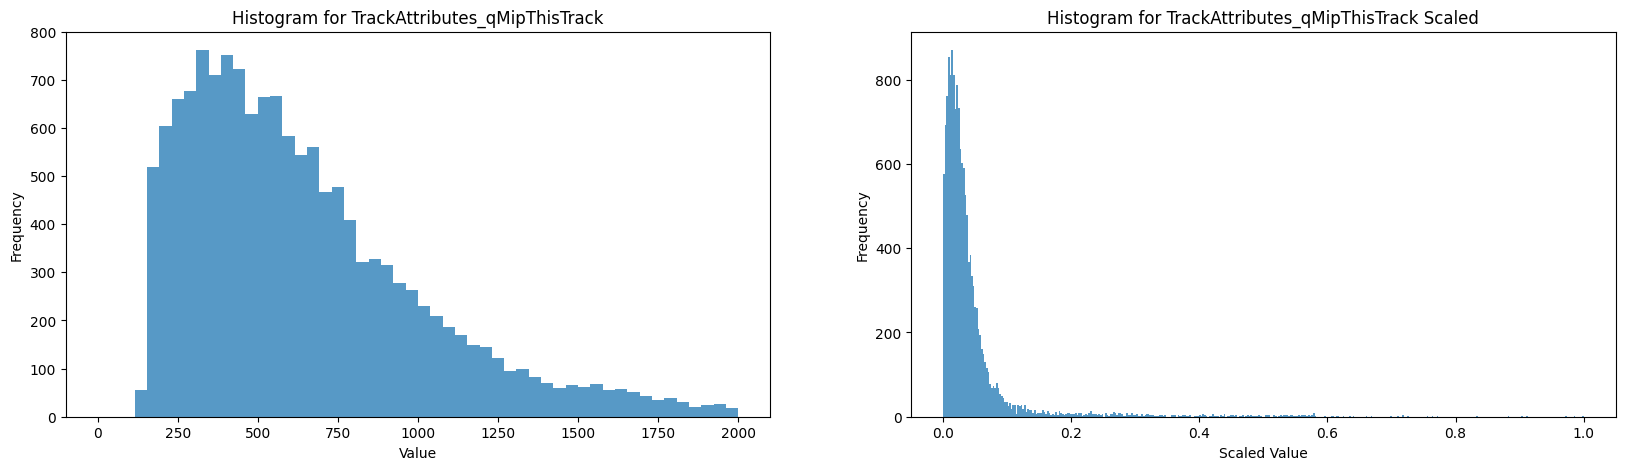

key ThisTrack;1 key_inner TrackAttributes_sizeMipThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_sizeMipThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 12
key ThisTrack;1 key_inner TrackAttributes_sizeMipThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[1 1 1 ... 1 1 1]


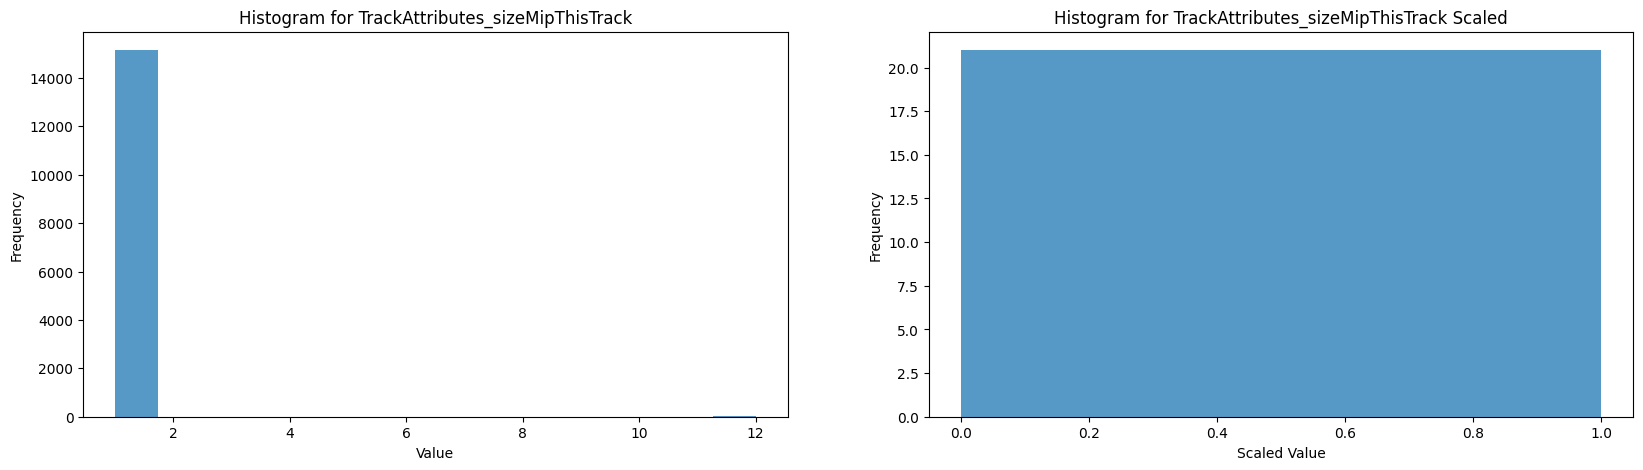

key ThisTrack;1 key_inner TrackAttributes_ckovThPionThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_ckovThPionThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 0.6836745738983154
key ThisTrack;1 key_inner TrackAttributes_ckovThPionThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[0.68230903 0.68299395 0.68184733 ... 0.67713344 0.6829161  0.68283665]


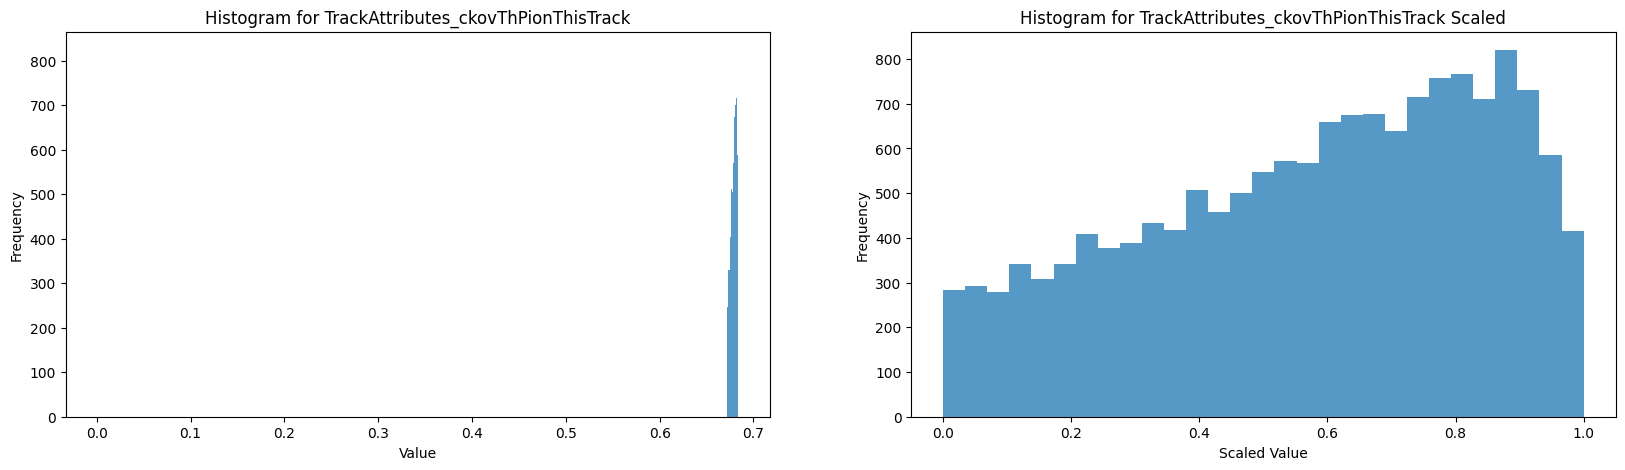

key ThisTrack;1 key_inner TrackAttributes_ckovThKaonThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_ckovThKaonThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 0.6781411170959473
key ThisTrack;1 key_inner TrackAttributes_ckovThKaonThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[0.66095912 0.66959333 0.65511894 ... 0.59433413 0.66861409 0.66761357]


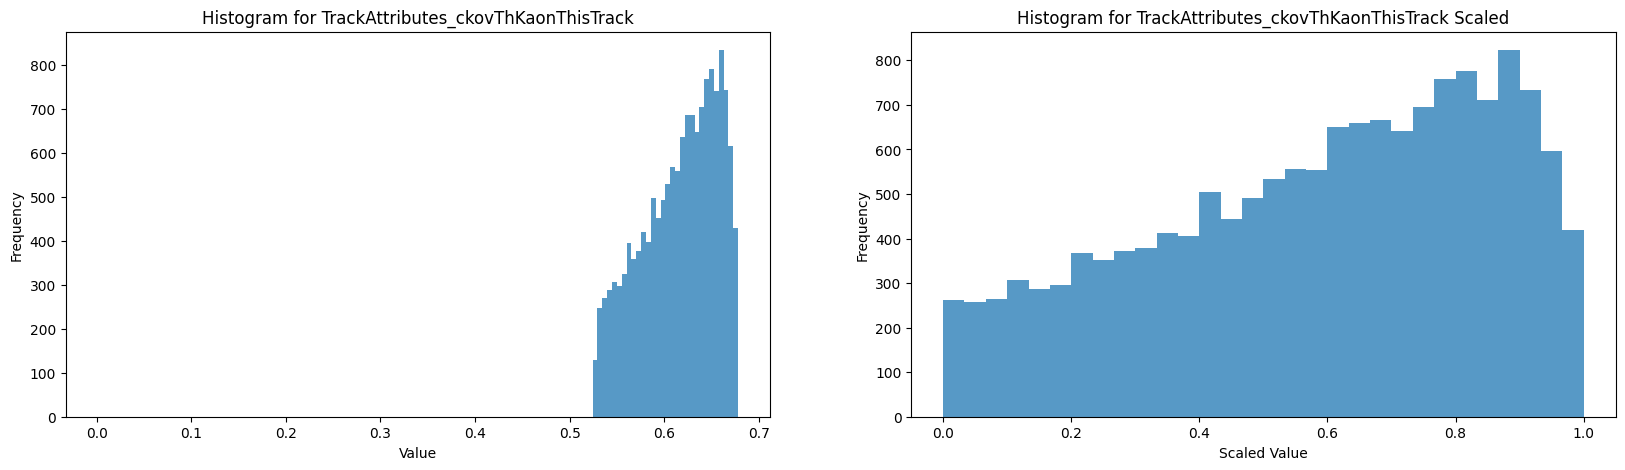

key ThisTrack;1 key_inner TrackAttributes_ckovThProtonThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_ckovThProtonThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 0.6623696684837341
key ThisTrack;1 key_inner TrackAttributes_ckovThProtonThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[0.59895402 0.63107842 0.57684845 ... 0.30361775 0.62746376 0.62376356]


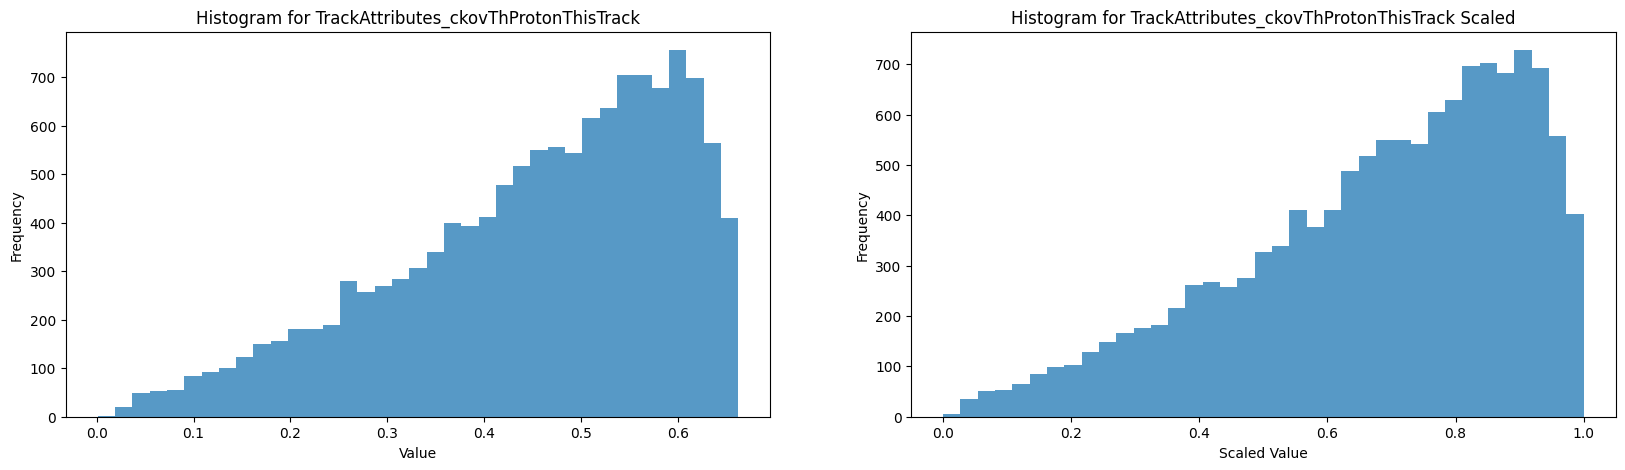

key ThisTrack;1 key_inner TrackAttributes_ckovReconThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_ckovReconThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 0.7193431854248047
key ThisTrack;1 key_inner TrackAttributes_ckovReconThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[0.66441631 0.62297726 0.65743446 ... 0.63361359 0.41737938 0.6140976 ]


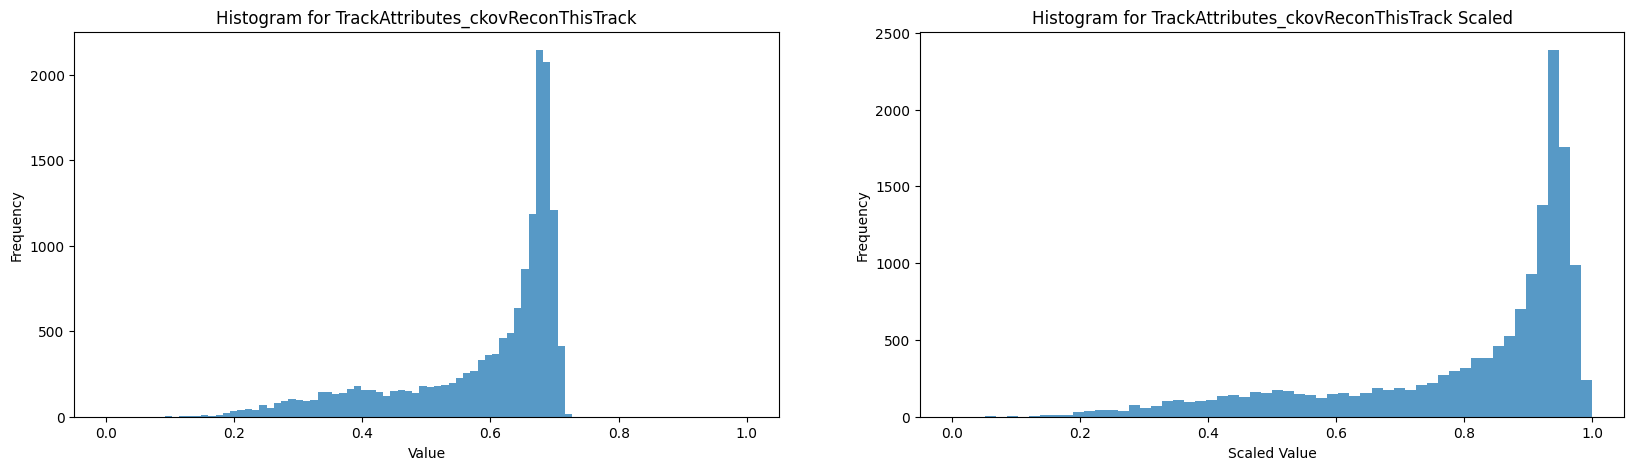

key ThisTrack;1 key_inner TrackAttributes_ckovReconMassHypThisTrack >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_ckovReconMassHypThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 0.7212333679199219
key ThisTrack;1 key_inner TrackAttributes_ckovReconMassHypThisTrack >> type <class 'numpy.ndarray'> shape (15175,)
[0.66276264 0.62561226 0.65377617 ... 0.         0.41758728 0.61413193]


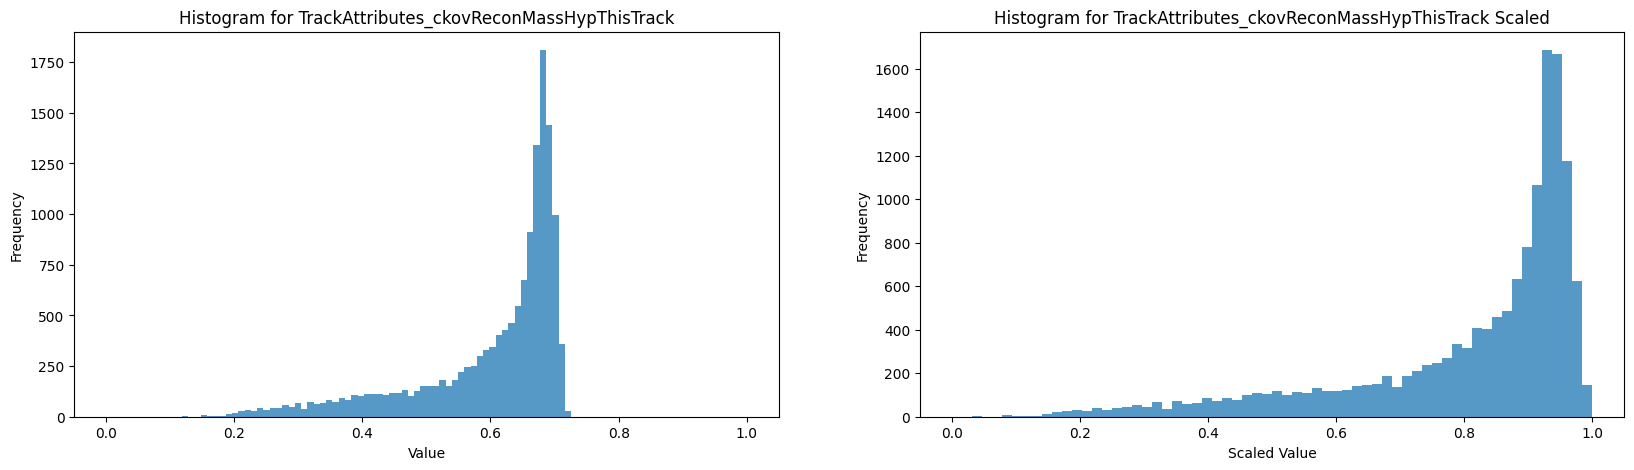

key ThisTrack;1 key_inner TrackAttributes_numCkovHough >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_numCkovHough >> type <class 'numpy.ndarray'> shape (15175,)
range is None:
key ThisTrack;1 key_inner TrackAttributes_numCkovHoughMH >> type <class 'numpy.ndarray'>
key ThisTrack;1 key_inner TrackAttributes_numCkovHoughMH >> type <class 'numpy.ndarray'> shape (15175,)
max_val is 211
key ThisTrack;1 key_inner TrackAttributes_numCkovHoughMH >> type <class 'numpy.ndarray'> shape (15175,)
[6 4 7 ... 0 3 3]


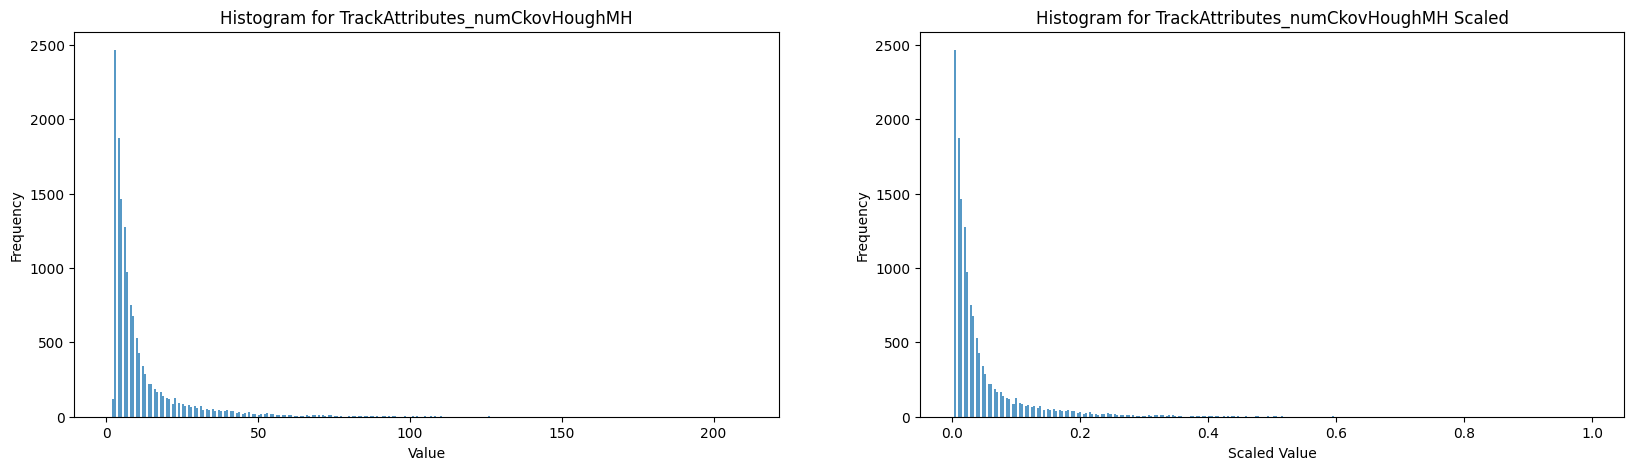

key OtherTracks;1 key_inner TrackAttributes_thetaPsOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_thetaPsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 1.0495858192443848
key OtherTracks;1 key_inner TrackAttributes_thetaPsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[0.46006498 0.         0.         ... 0.         0.         0.        ]
 [0.65708756 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.6835494  0.         0.         ... 0.         0.         0.        ]
 [0.19701971 0.6710748  0.619278   ... 0.         0.         0.        ]]


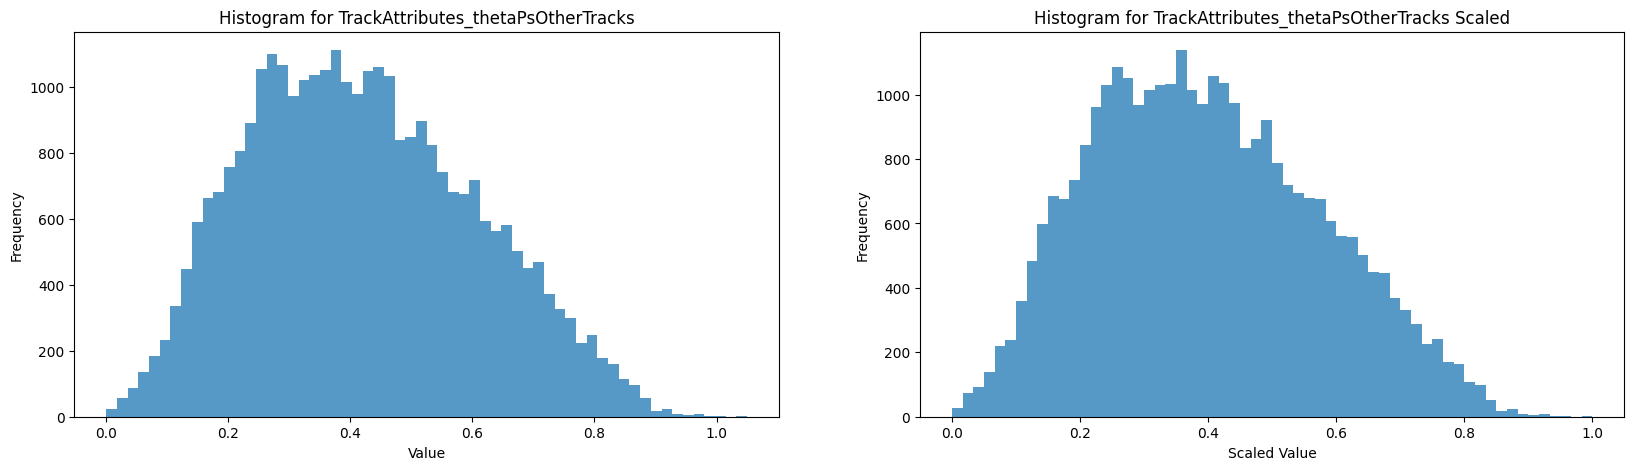

key OtherTracks;1 key_inner TrackAttributes_phiPsOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_phiPsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 3.140357732772827
key OtherTracks;1 key_inner TrackAttributes_phiPsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[ 1.3882273  0.         0.        ...  0.         0.         0.       ]
 [-1.5036998  0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 1.6856911  0.         0.        ...  0.         0.         0.       ]
 [-1.5507017  1.3482082  1.1829135 ...  0.         0.         0.       ]]


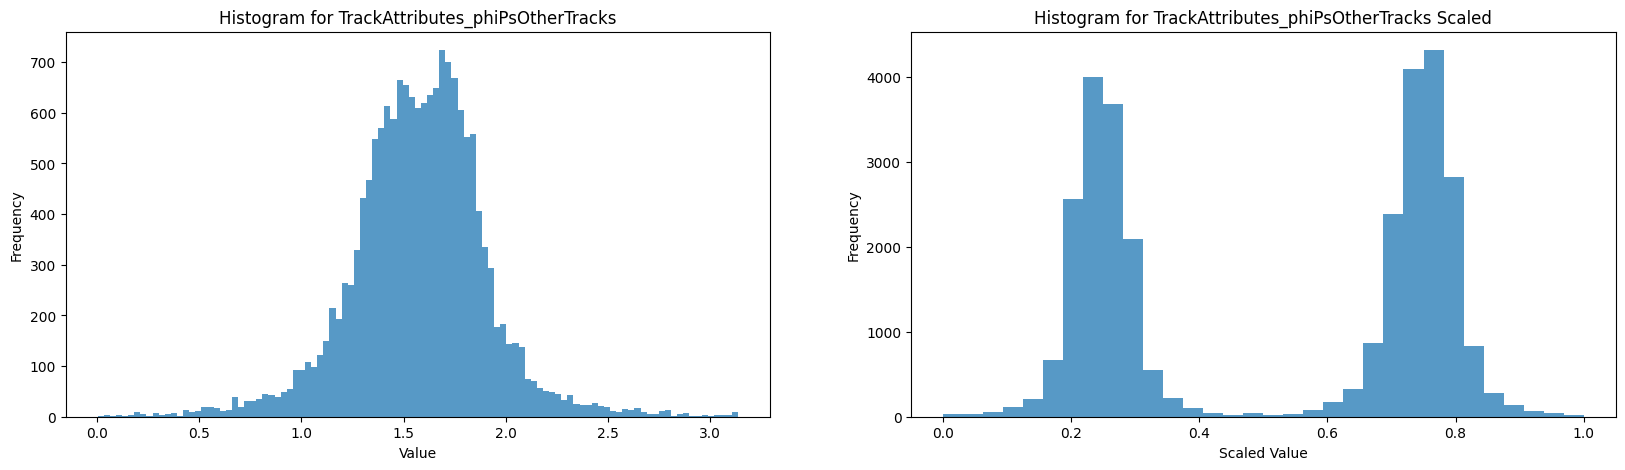

key OtherTracks;1 key_inner TrackAttributes_momentumsOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_momentumsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 175.46823120117188
key OtherTracks;1 key_inner TrackAttributes_momentumsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[1.1686685  0.         0.         ... 0.         0.         0.        ]
 [0.6638273  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.45710006 0.         0.         ... 0.         0.         0.        ]
 [2.565843   0.61250484 0.52477944 ... 0.         0.         0.        ]]


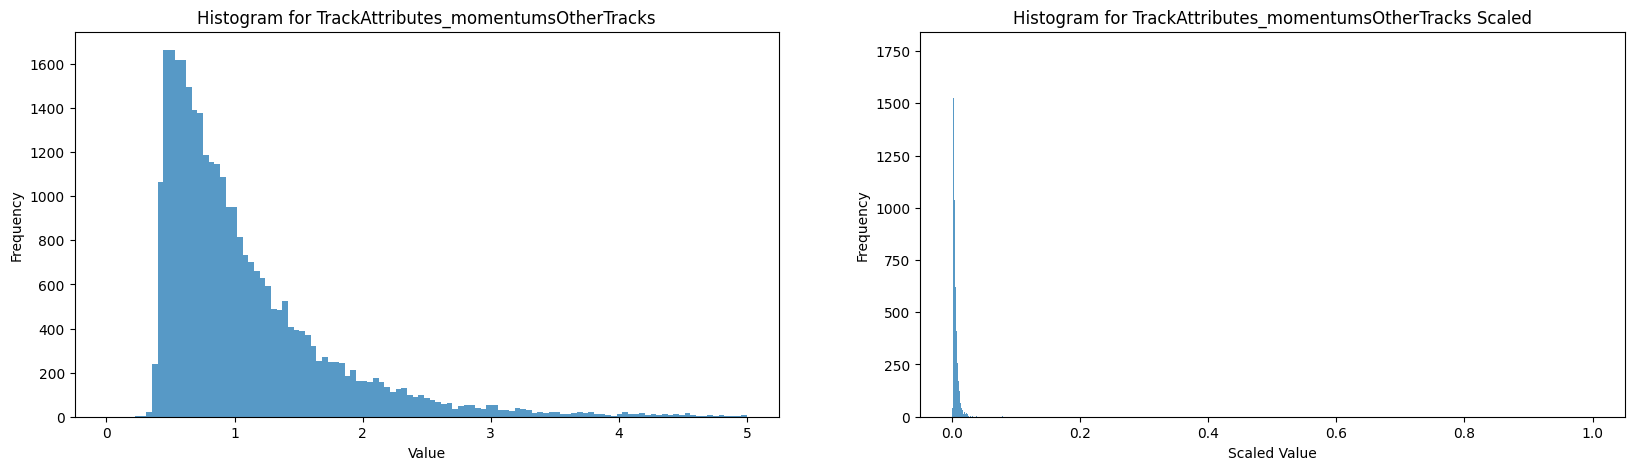

key OtherTracks;1 key_inner TrackAttributes_qMipsOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_qMipsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 20919.0
key OtherTracks;1 key_inner TrackAttributes_qMipsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[ 798.    0.    0. ...    0.    0.    0.]
 [ 180.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [ 657.    0.    0. ...    0.    0.    0.]
 [ 359. 2268. 1501. ...    0.    0.    0.]]


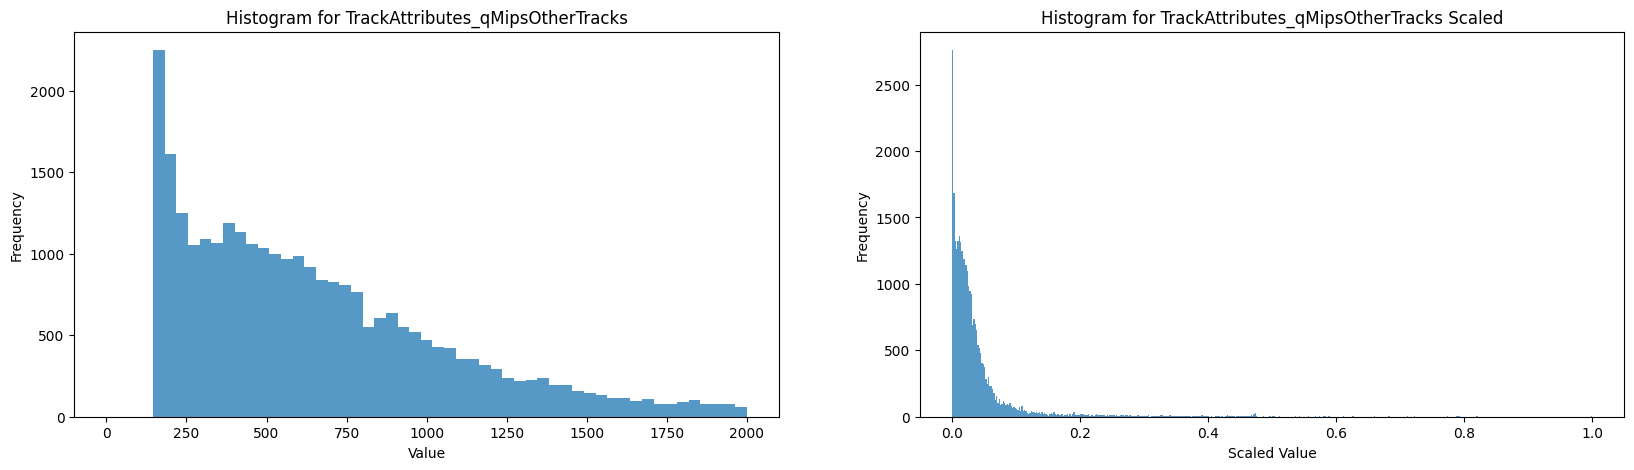

key OtherTracks;1 key_inner TrackAttributes_sizeMipsOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_sizeMipsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 12.0
key OtherTracks;1 key_inner TrackAttributes_sizeMipsOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[1. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 1. 2. ... 1. 1. 1.]]


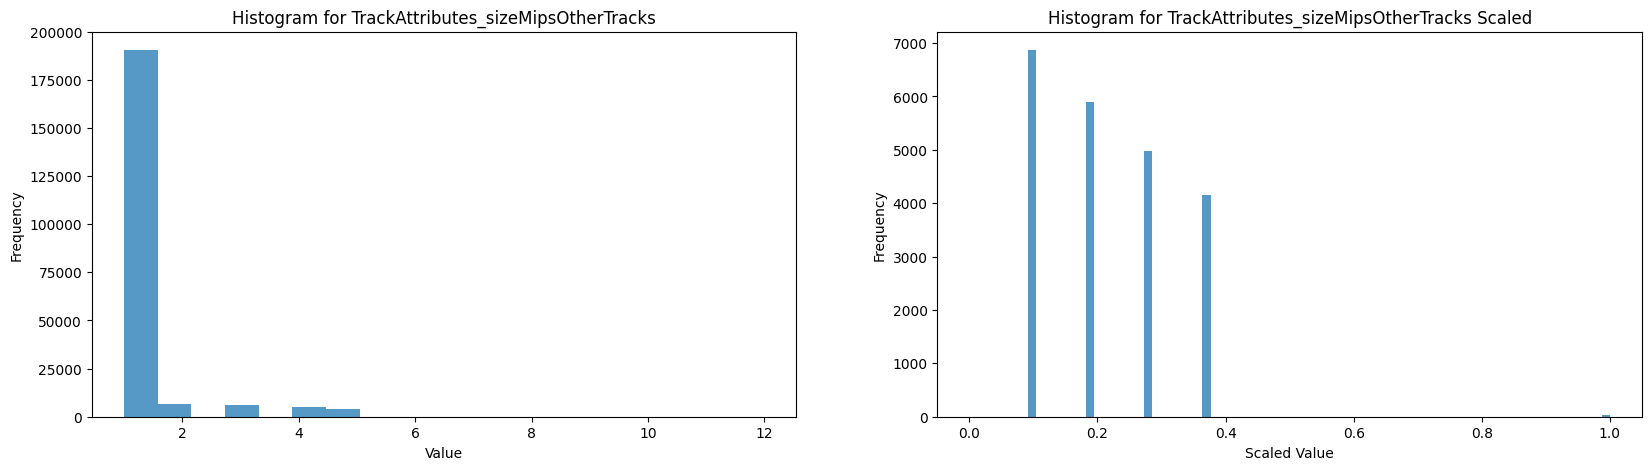

key OtherTracks;1 key_inner TrackAttributes_ckovReconOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_ckovReconOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 0.7208633422851562
key OtherTracks;1 key_inner TrackAttributes_ckovReconOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[-11.           0.           0.         ...   0.           0.
    0.        ]
 [-11.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [ -9.           0.           0.         ...   0.           0.
    0.        ]
 [  0.55996895   0.6924019    0.435297   ...   0.           0.
    0.        ]]


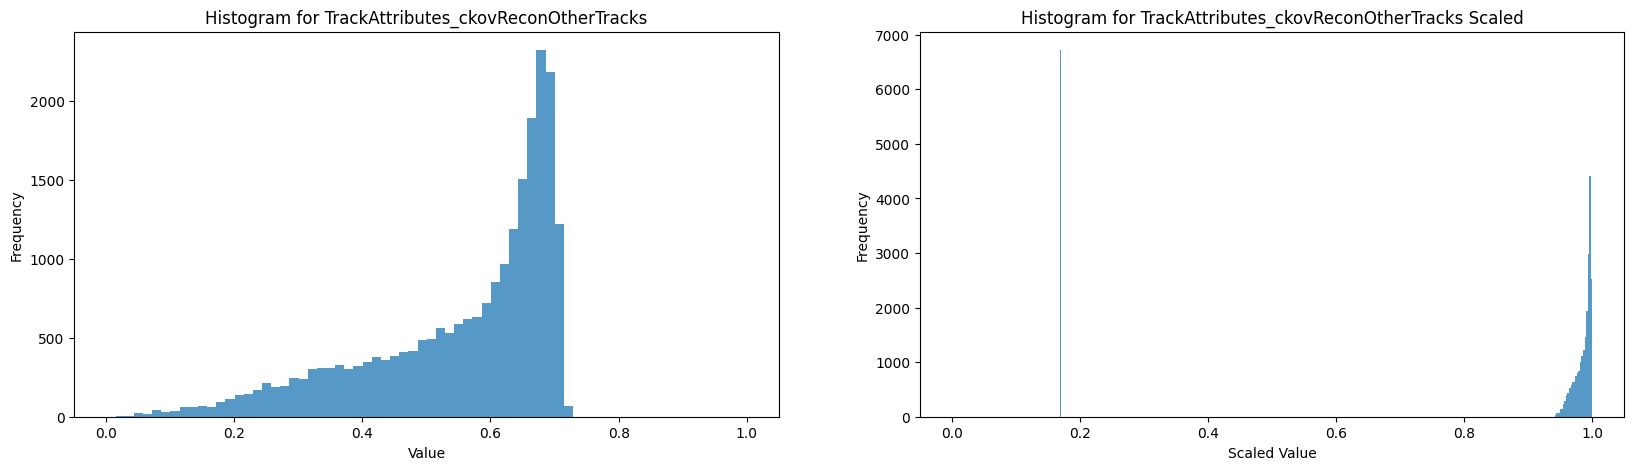

key OtherTracks;1 key_inner TrackAttributes_ckovReconMassHypOtherTracks >> type <class 'numpy.ndarray'>
key OtherTracks;1 key_inner TrackAttributes_ckovReconMassHypOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
max_val is 89.67556762695312
key OtherTracks;1 key_inner TrackAttributes_ckovReconMassHypOtherTracks >> type <class 'numpy.ndarray'> shape (15175, 14)
[[26.662762   0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [15.         0.         0.        ...  0.         0.         0.       ]
 [ 0.658165   0.6965389  0.4490528 ...  0.         0.         0.       ]]


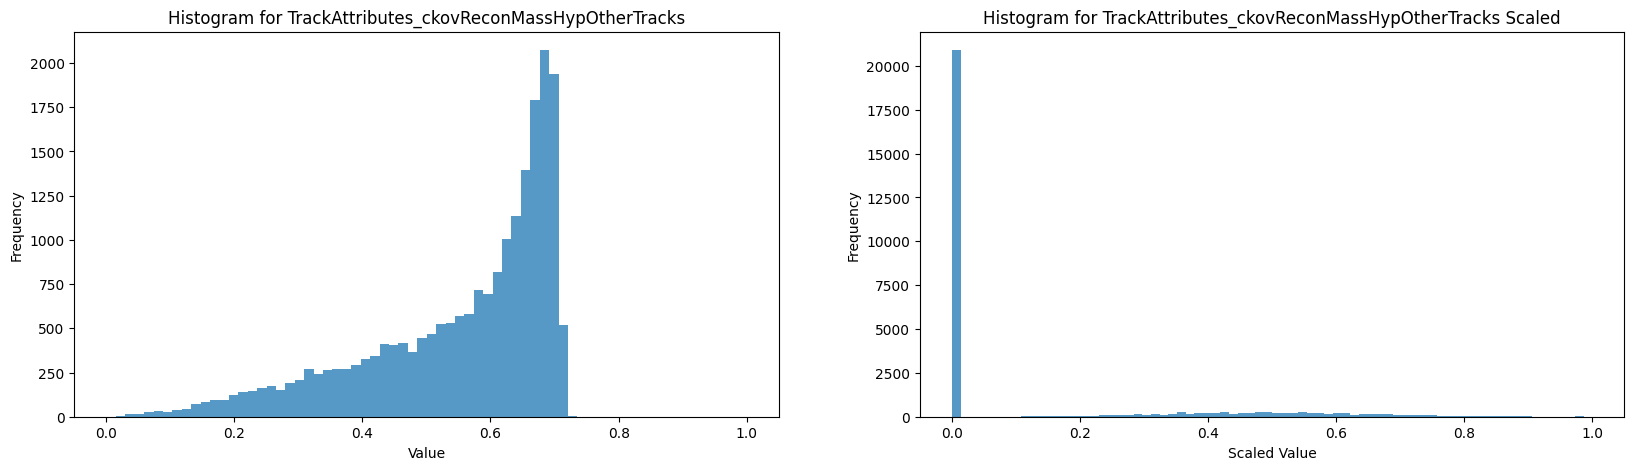

key HighChargeClusters;4 key_inner highChargeClu_q >> type <class 'numpy.ndarray'>
key HighChargeClusters;4 key_inner highChargeClu_q >> type <class 'numpy.ndarray'> shape (15175, 353)
max_val is 253022.0
max_val_int is 253022
range is (0.001, 2000)
key HighChargeClusters;4 key_inner highChargeClu_q >> type <class 'numpy.ndarray'> shape (15175, 353)
[[ 134.35742   302.57822    74.66583  ...    0.          0.
     0.      ]
 [2926.7324     59.633163   60.478706 ...    0.          0.
     0.      ]
 [ 645.80884   124.90757   131.47629  ...    0.          0.
     0.      ]
 ...
 [1540.3344    759.28827  1093.0865   ...    0.          0.
     0.      ]
 [ 949.2774    105.648926  162.92657  ...    0.          0.
     0.      ]
 [  70.11087    52.90421    98.14892  ...    0.          0.
     0.      ]]


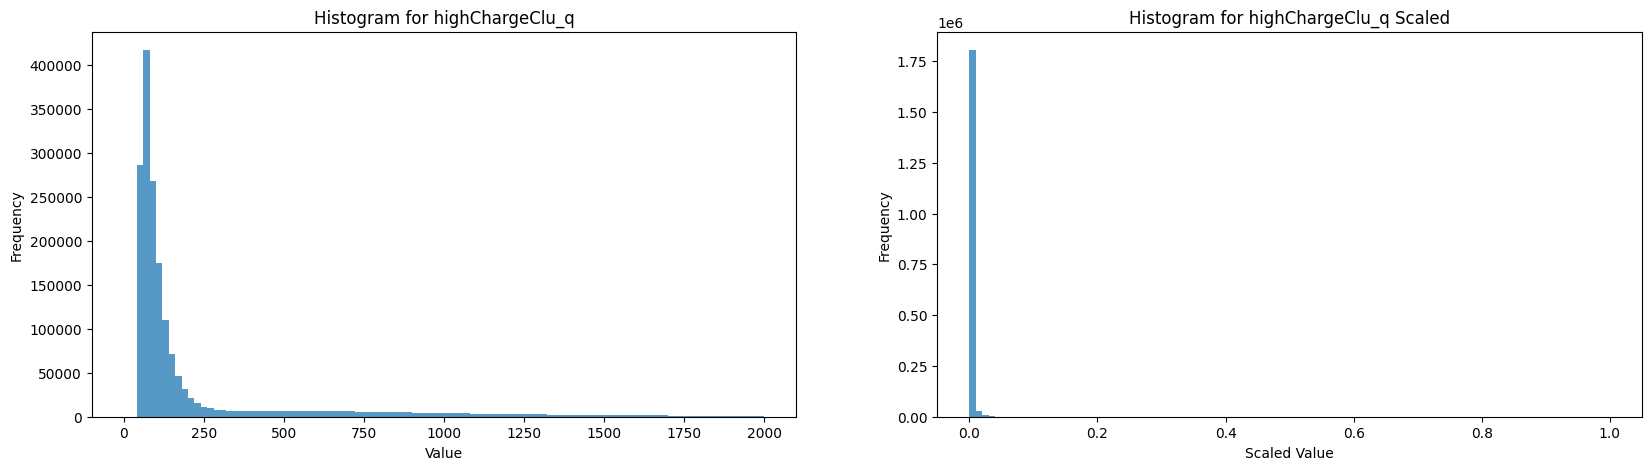

key HighChargeClusters;4 key_inner highChargeClu_size >> type <class 'numpy.ndarray'>
key HighChargeClusters;4 key_inner highChargeClu_size >> type <class 'numpy.ndarray'> shape (15175, 353)
max_val is 219.0
key HighChargeClusters;4 key_inner highChargeClu_size >> type <class 'numpy.ndarray'> shape (15175, 353)
[[3. 2. 2. ... 0. 0. 0.]
 [6. 2. 2. ... 0. 0. 0.]
 [5. 4. 3. ... 0. 0. 0.]
 ...
 [7. 5. 7. ... 0. 0. 0.]
 [6. 5. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]]


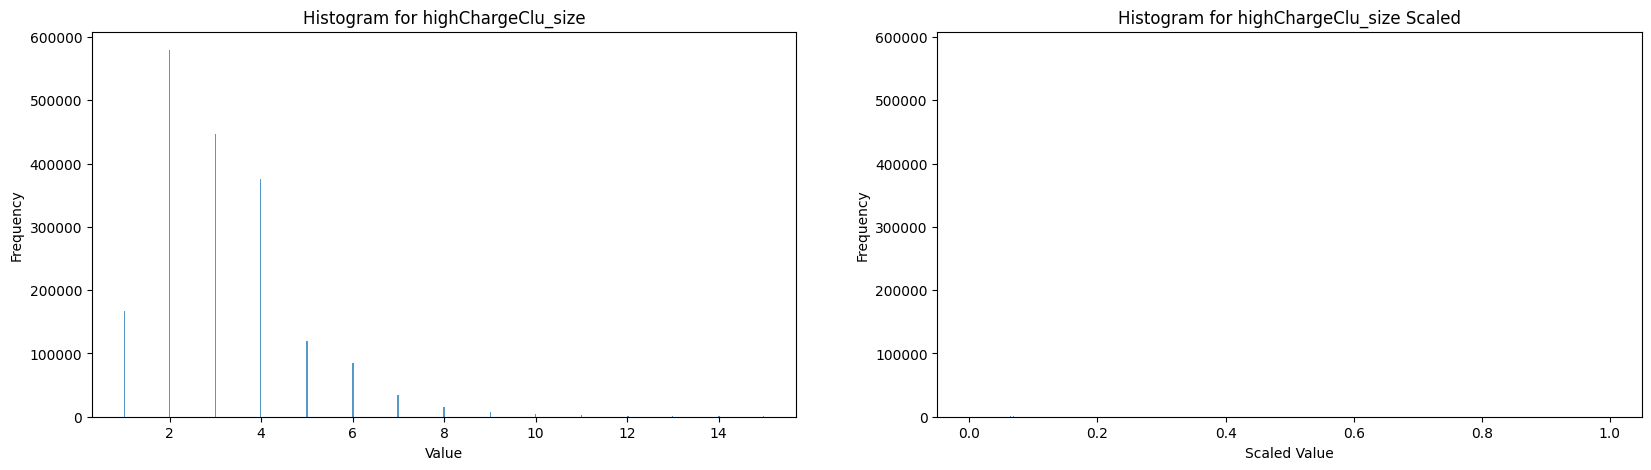

key ClusterCandidates;14 key_inner ClusterData_xValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_xValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 130.9982147216797
key ClusterCandidates;14 key_inner ClusterData_xValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.        12.400001   9.6755   ...   0.         0.         0.      ]
 ...
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.        18.3978    23.6      ...   0.         0.         0.      ]
 [  0.       125.04703  129.86252  ...   0.         0.         0.      ]]


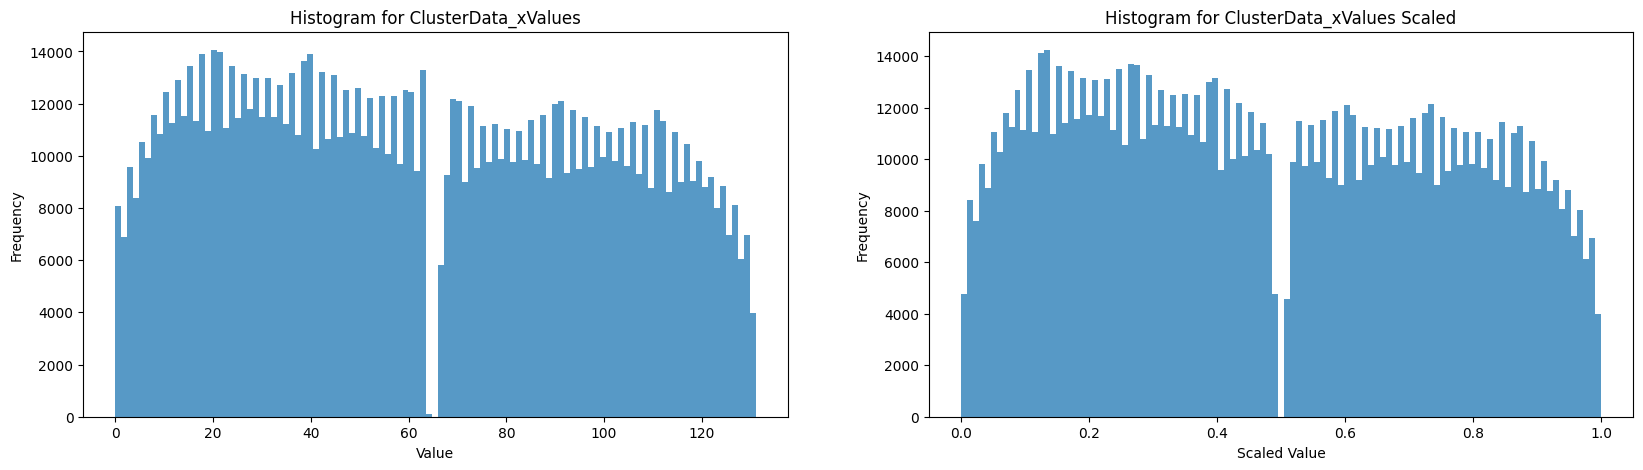

key ClusterCandidates;14 key_inner ClusterData_yValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_yValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 126.57999420166016
key ClusterCandidates;14 key_inner ClusterData_yValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.        95.22199   79.97005   ...  0.         0.         0.       ]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.        36.539997  51.739998  ...  0.         0.         0.       ]
 [ 0.        16.38       0.6712578 ...  0.         0.         0.       ]]


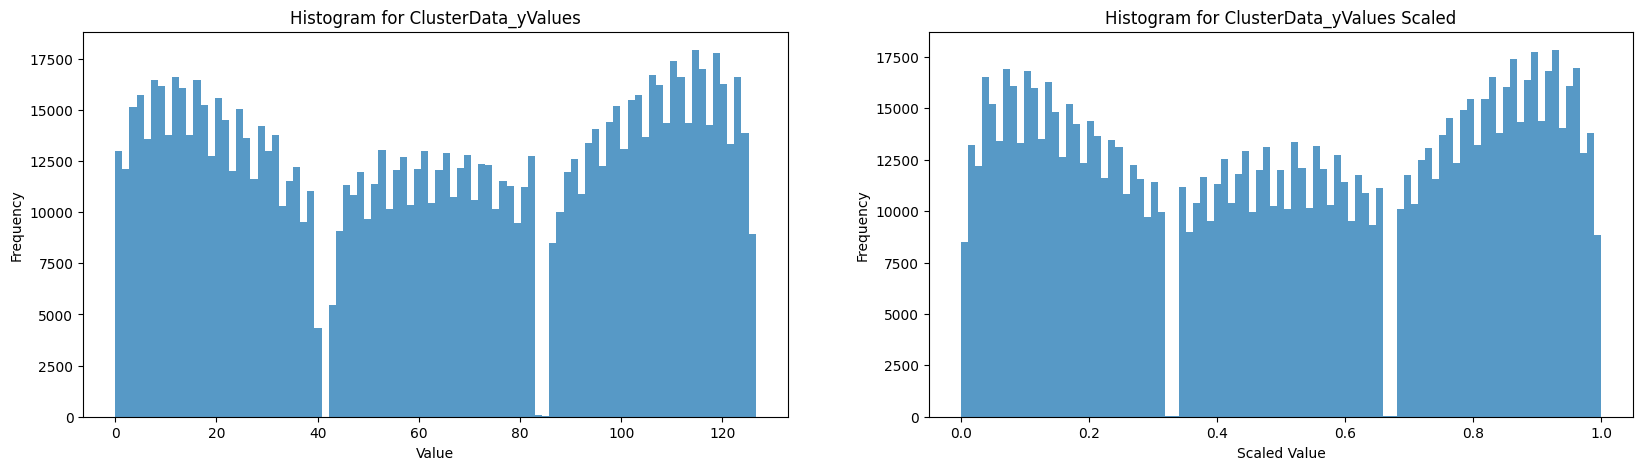

key ClusterCandidates;14 key_inner ClusterData_qValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_qValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 9999.9853515625
key ClusterCandidates;14 key_inner ClusterData_qValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.        70.02756   53.57624  ...   0.         0.         0.      ]
 ...
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.        19.542282  10.       ...   0.         0.         0.      ]
 [  0.        13.786282 131.94849  ...   0.         0.         0.      ]]


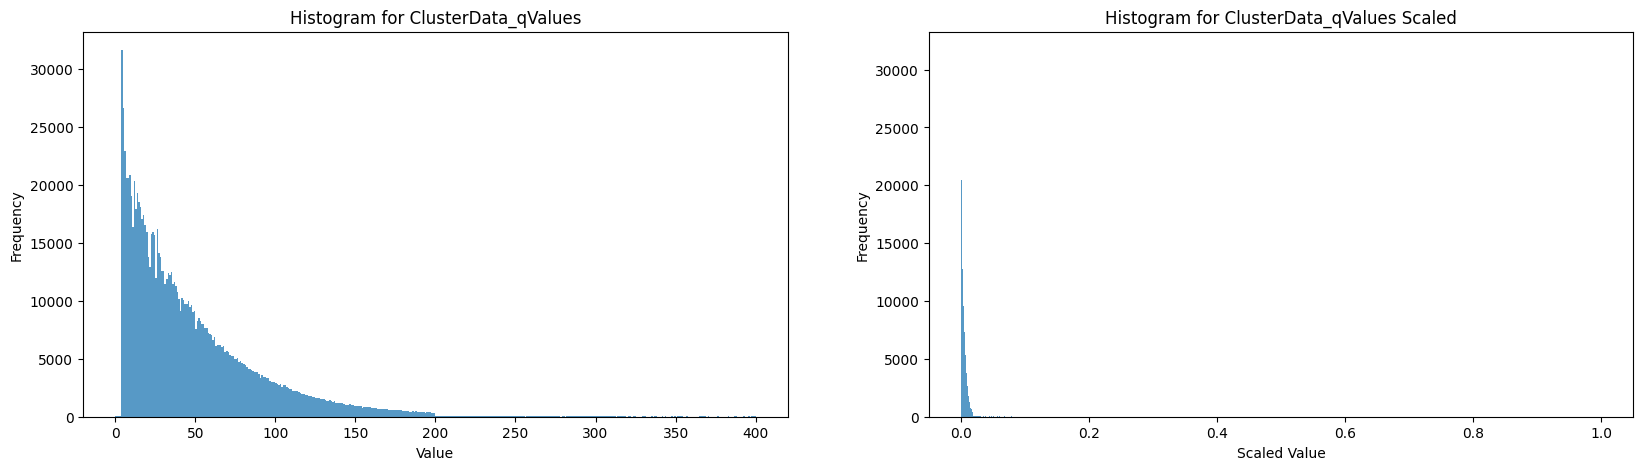

key ClusterCandidates;14 key_inner ClusterData_sizeValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_sizeValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 45.0
key ClusterCandidates;14 key_inner ClusterData_sizeValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 2. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]
 [0. 2. 4. ... 0. 0. 0.]]


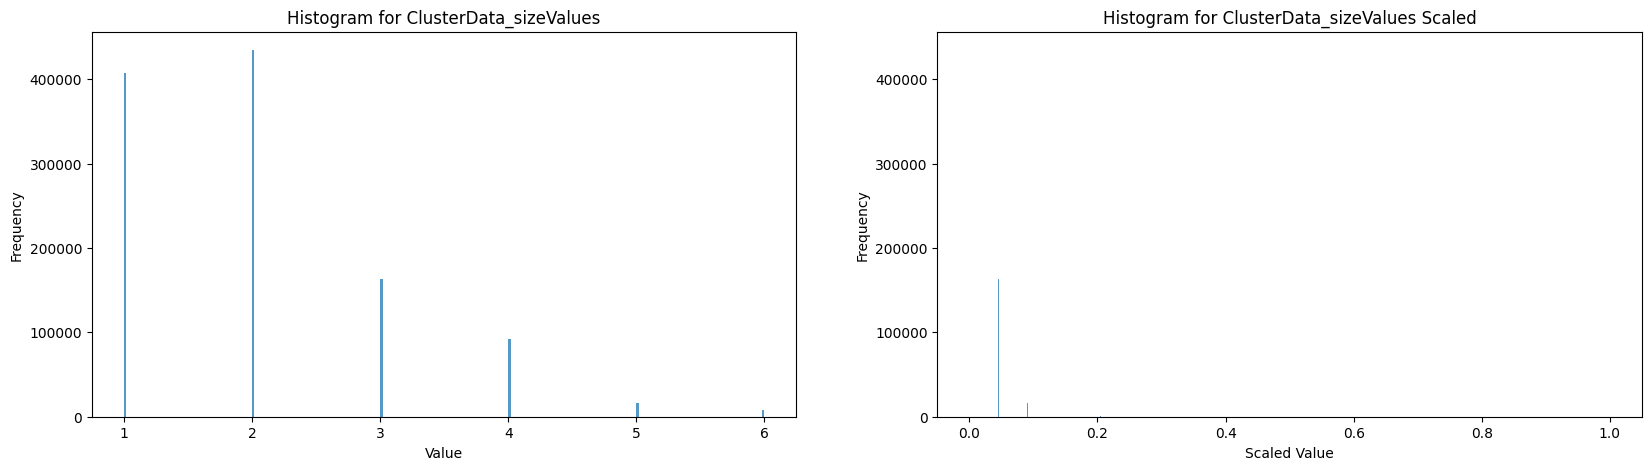

key ClusterCandidates;14 key_inner ClusterData_thetaCerValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_thetaCerValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 0.8333330750465393
key ClusterCandidates;14 key_inner ClusterData_thetaCerValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.4700279  0.5624373  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.76554793 0.7756846  ... 0.         0.         0.        ]
 [0.         0.7797405  0.7782009  ... 0.         0.         0.        ]]


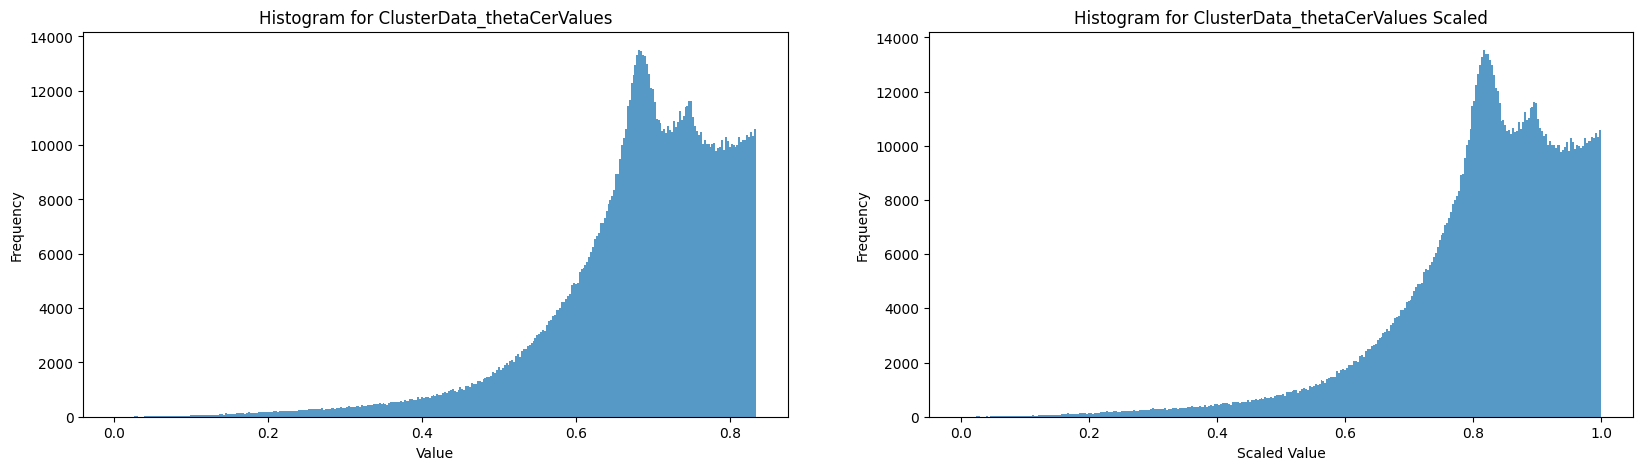

key ClusterCandidates;14 key_inner ClusterData_phiCerValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_phiCerValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 3.1415865421295166
key ClusterCandidates;14 key_inner ClusterData_phiCerValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -1.8074402   0.23817739 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          2.8549397  -2.1575634  ...  0.          0.
   0.        ]
 [ 0.         -0.90242934 -0.8432356  ...  0.          0.
   0.        ]]


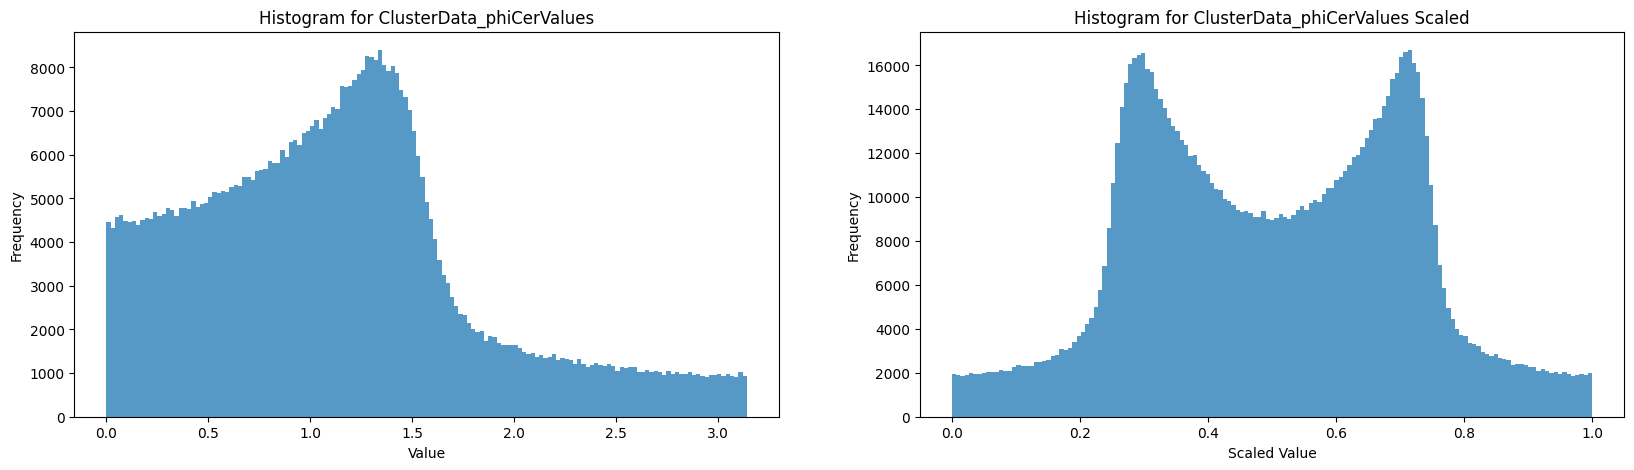

key ClusterCandidates;14 key_inner ClusterData_sigmaRingValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_sigmaRingValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 14142135296.0
key ClusterCandidates;14 key_inner ClusterData_sigmaRingValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01998112 0.02342755 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01160252 0.0152412  ... 0.         0.         0.        ]
 [0.         0.01136654 0.01140481 ... 0.         0.         0.        ]]


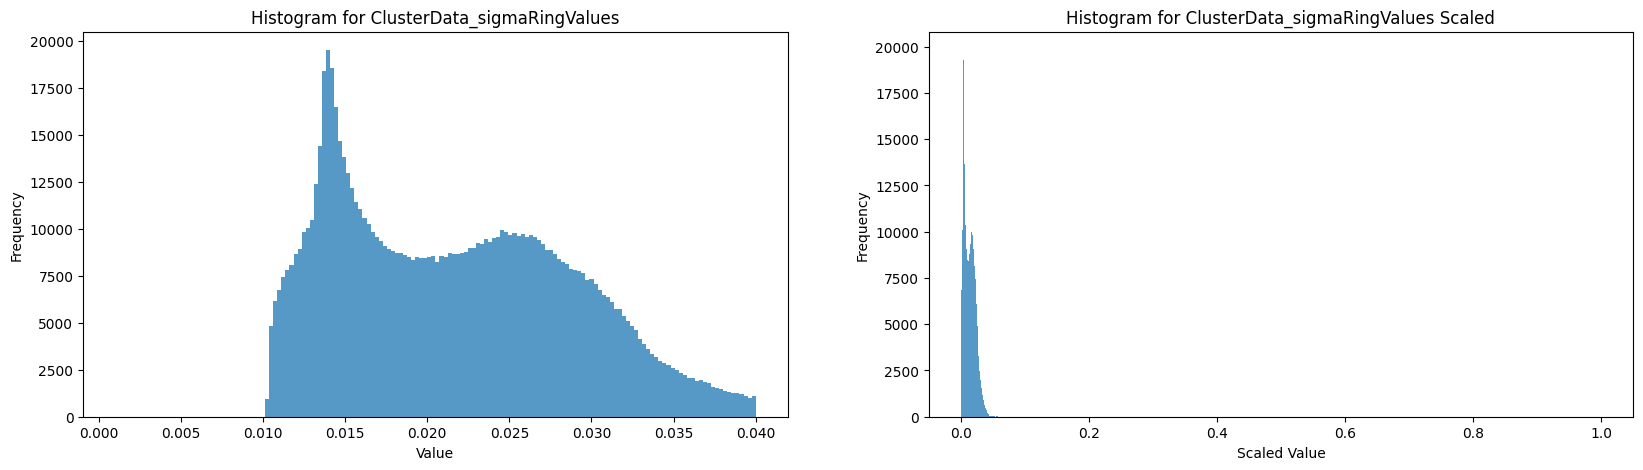

key ClusterCandidates;14 key_inner ClusterData_pionProbs >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_pionProbs >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 0.977243959903717
key ClusterCandidates;14 key_inner ClusterData_pionProbs >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.26923186 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


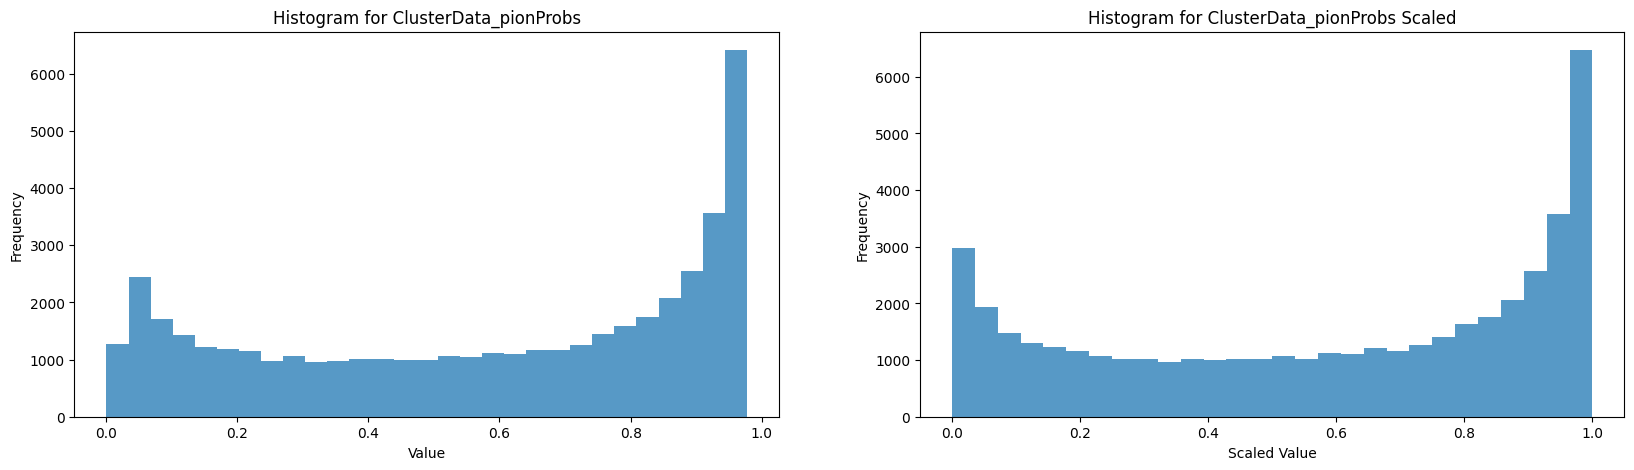

key ClusterCandidates;14 key_inner ClusterData_kaonProbs >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_kaonProbs >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 0.9772495627403259
key ClusterCandidates;14 key_inner ClusterData_kaonProbs >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


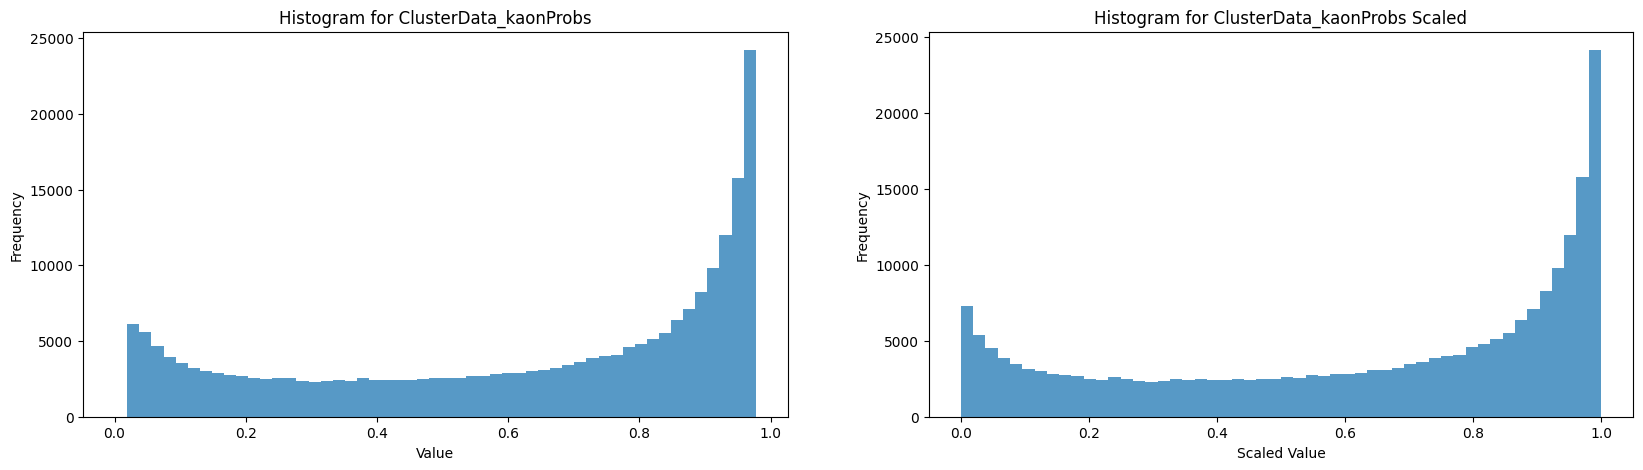

key ClusterCandidates;14 key_inner ClusterData_protonProbs >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_protonProbs >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 0.9772495031356812
key ClusterCandidates;14 key_inner ClusterData_protonProbs >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


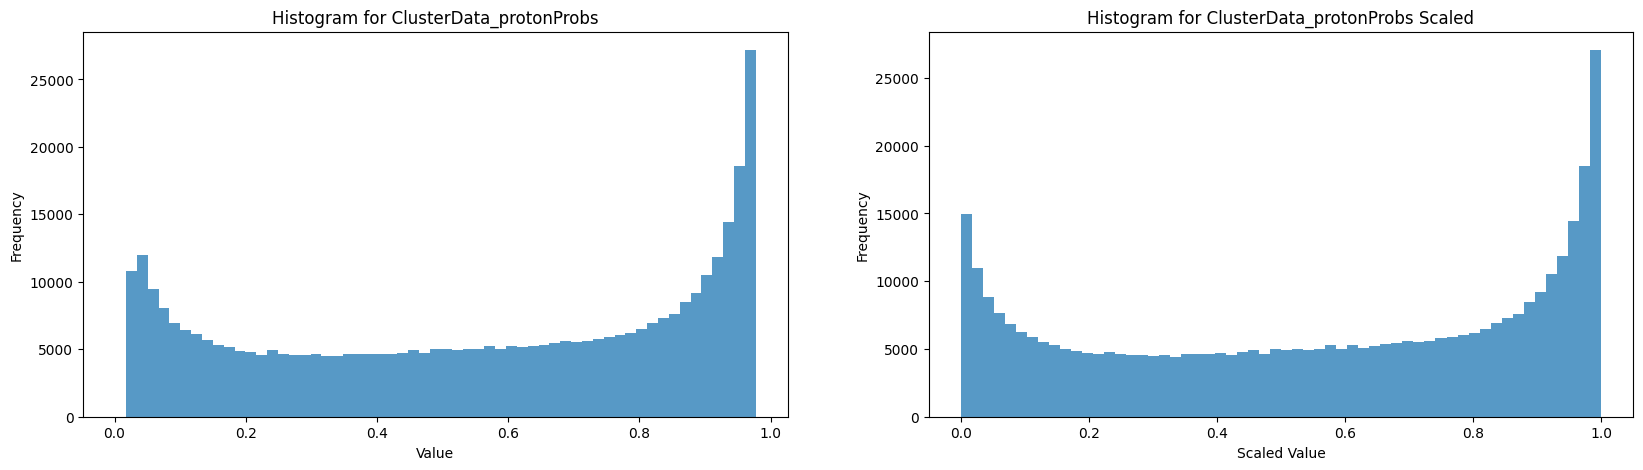

key ClusterCandidates;14 key_inner ClusterData_protonProbsNorm >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_protonProbsNorm >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 1.0
key ClusterCandidates;14 key_inner ClusterData_protonProbsNorm >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


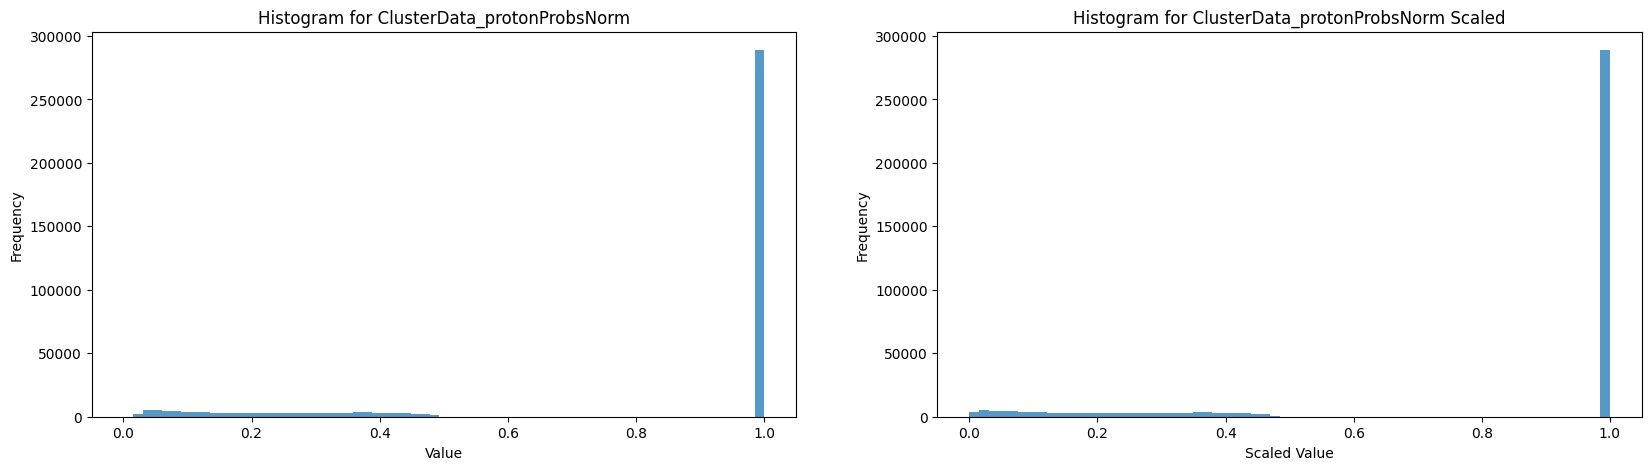

key ClusterCandidates;14 key_inner ClusterData_kaonProbsNorm >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_kaonProbsNorm >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 1.0
key ClusterCandidates;14 key_inner ClusterData_kaonProbsNorm >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


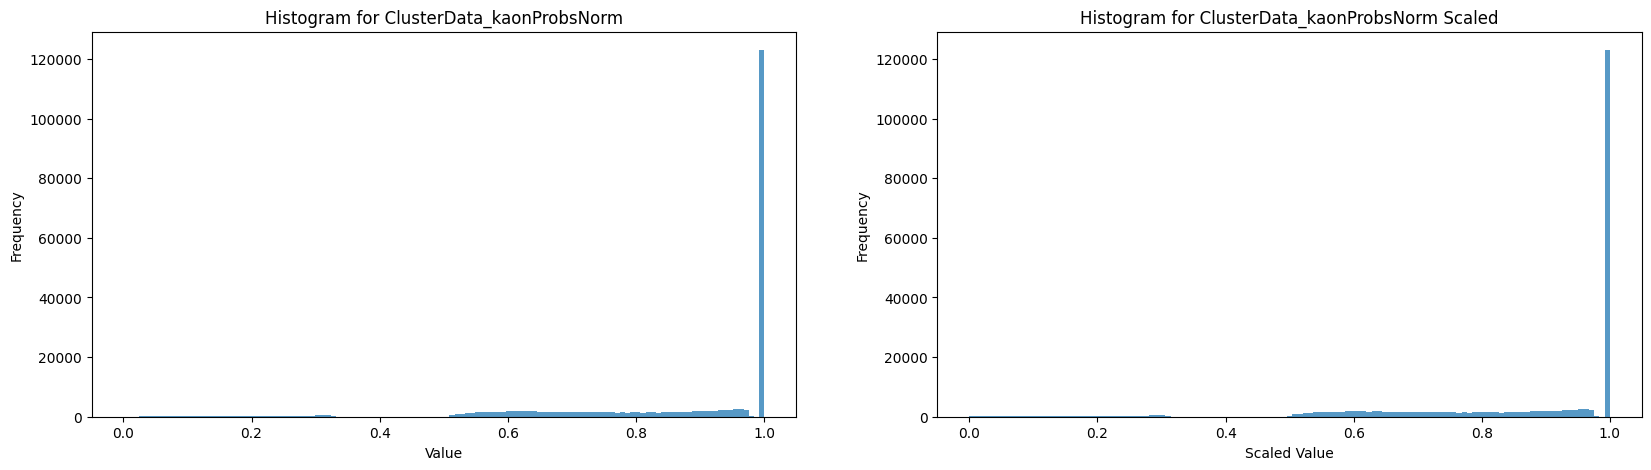

key ClusterCandidates;14 key_inner ClusterData_pionProbsNorm >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_pionProbsNorm >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 1.0
key ClusterCandidates;14 key_inner ClusterData_pionProbsNorm >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


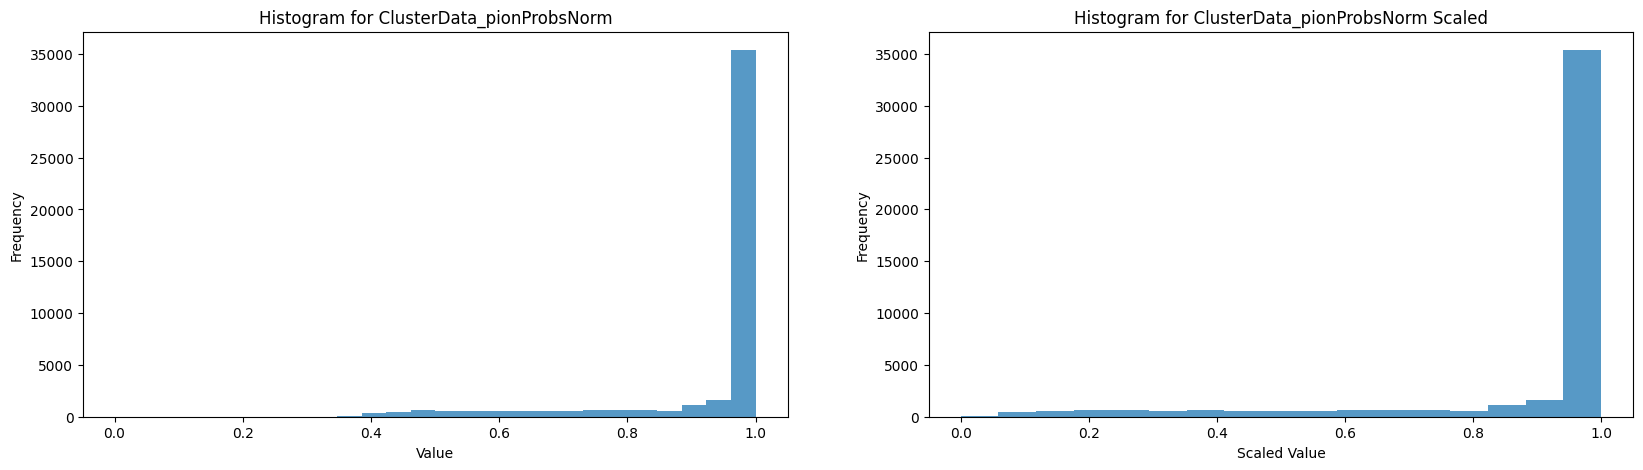

key ClusterCandidates;14 key_inner ClusterData_sumProbabilityTrack >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_sumProbabilityTrack >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 2.7243194580078125
key ClusterCandidates;14 key_inner ClusterData_sumProbabilityTrack >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.26923186 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


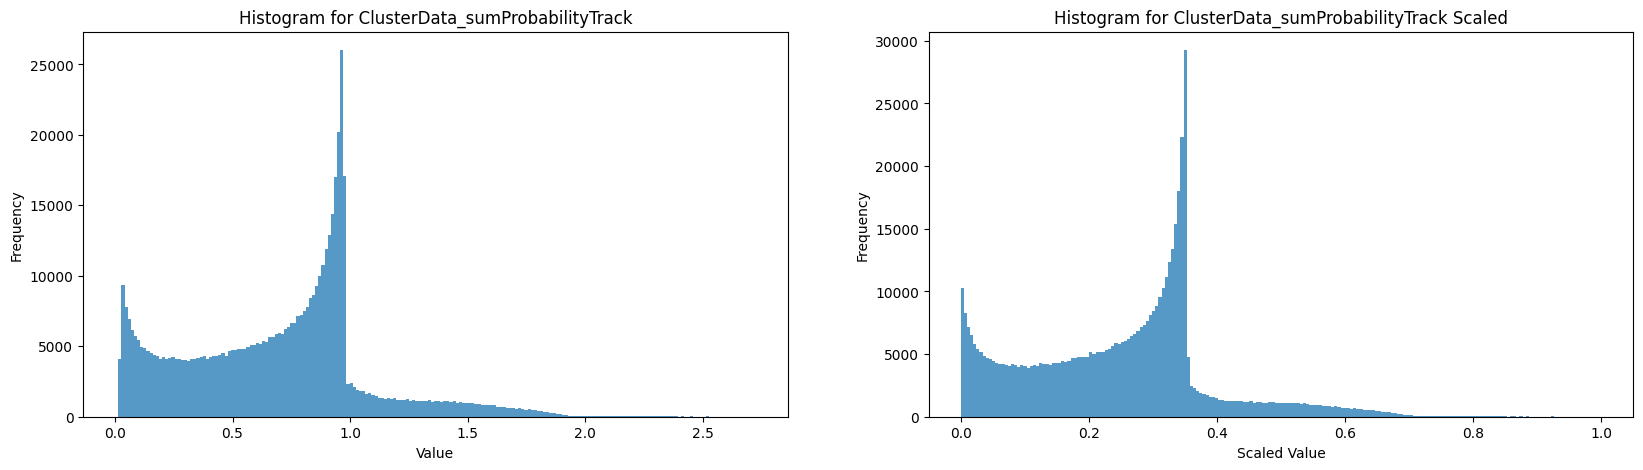

key ClusterCandidates;14 key_inner ClusterData_rawSizeValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_rawSizeValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 74.0
key ClusterCandidates;14 key_inner ClusterData_rawSizeValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 2. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]
 [0. 2. 4. ... 0. 0. 0.]]


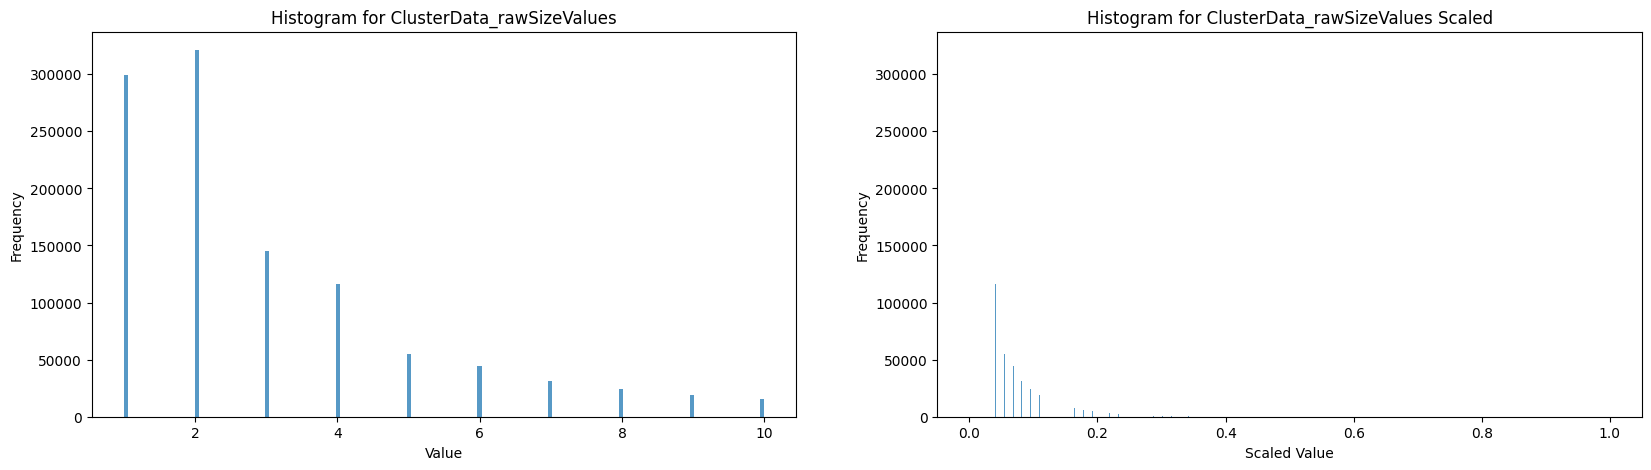

key ClusterCandidates;14 key_inner ClusterData_numRawClustersValues >> type <class 'numpy.ndarray'>
key ClusterCandidates;14 key_inner ClusterData_numRawClustersValues >> type <class 'numpy.ndarray'> shape (15175, 756)
max_val is 6.0
key ClusterCandidates;14 key_inner ClusterData_numRawClustersValues >> type <class 'numpy.ndarray'> shape (15175, 756)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


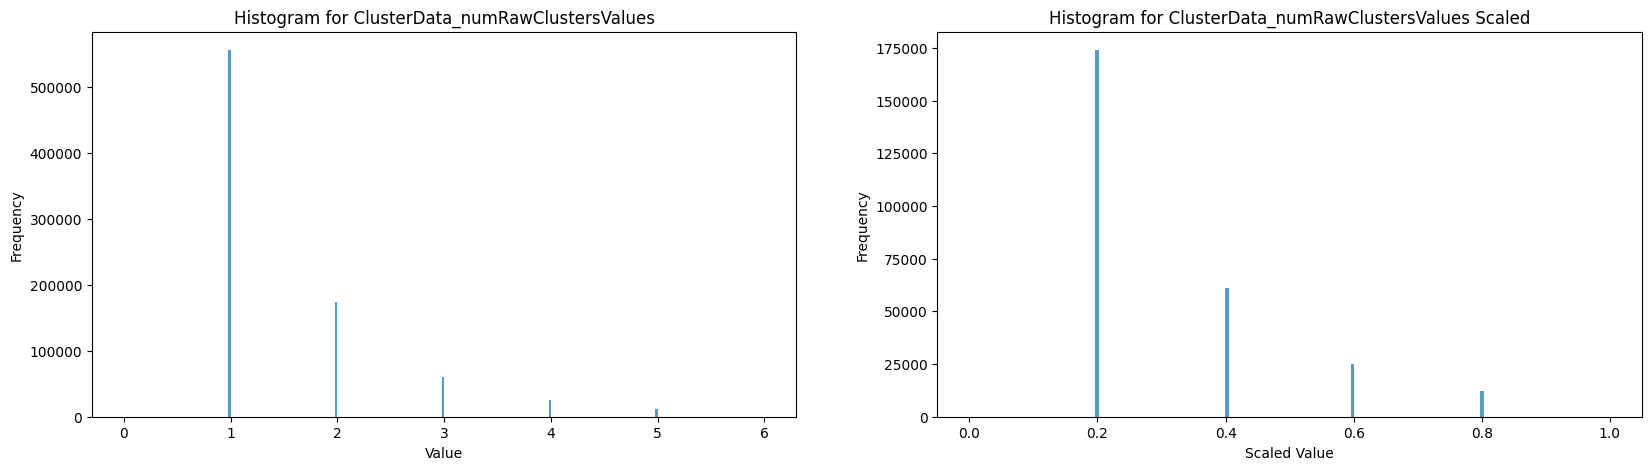

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer


plot_attributes_and_scale(all_dicts)

## Make maps

In [ ]:
import importlib
from ParticleObjectProcessor import ParticleObjectProcessorClass
import ParticleObjectProcessor

# Now reload the module
importlib.reload(ParticleObjectProcessor)


<module 'ParticleObjectProcessor' from '/content/drive/MyDrive/ColabNotebooks/root2Pandas/ParticleObjectProcessor.py'>

In [ ]:
def filter_and_pad_vectorized(data, mask):
    # Step 1: Calculate the maximum number of selected clusters
    num_true_per_row = np.sum(mask, axis=1)
    max_selected_clusters = np.max(num_true_per_row)

    # Step 2: Prepare indices for placing filtered values in the new array
    try:
        num_tracks, num_clusters = data.shape
        print(f"original data : num_tracks {num_tracks} num_clusters {num_clusters}")

    except Exception as e :
        print(f"only 1 dimension")
        num_tracks = data.shape



    row_indices = np.arange(num_tracks)[:, None]  # shape (num_tracks, 1)
    true_positions = np.cumsum(mask, axis=1)  # shape (num_tracks, num_clusters)

    # Use this mask to get the indices for the first 'True' per row
    # Adjusting positions: we place data where cumulative sum matches the mask and is non-zero
    placement_indices = np.where(mask, true_positions - 1, -1)

    # Step 3: Create the output array
    output = np.full((num_tracks, max_selected_clusters), np.nan)  # using NaN for floating point data

    # Step 4: Flatten and filter the data and indices, and then use flat indices for placement
    flat_output_indices = (row_indices * max_selected_clusters + placement_indices)[mask]
    flat_data = data[mask]

    # Place the flattened filtered data into the flattened output array using computed indices
    np.put(output, flat_output_indices, flat_data)


    print(f"output data  {output.shape}")

    return output

In [ ]:
from __future__ import print_function
import numpy as np
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import normaltest, anderson
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Dropout, Flatten
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.regularizers import l1, l2, l1_l2

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import os


# specie_probability : vector containing the specie for same prob as specie in candidate_positions
def extract_neighborhood_map_new(x, y, mip_positions, attribute, attribute_key, neighborhood_size, map_size):
    """
    Extracts neighborhood maps based on candidate positions and MIP positions.

    Args:
        x (ndarray): X-coordinates of candidate positions.
        y (ndarray): Y-coordinates of candidate positions.
        mip_positions (ndarray): MIP positions.
        attribute (str): Attribute.
        attribute_key (str): Attribute key.
        neighborhood_size (int): Size of the neighborhood.
        map_size (int): Size of the map.

    Returns:
        ndarray: Neighborhood map around MIP, (num_samples x map_size x map_size)
                 Where Z-axis is the atrribute value.

    """


    #print(f"shape of hadron_candidates {hadron_candidates}")
    # get x, y



    #num_samples = candidate_positions.shape[0]
    cand_pos = np.stack((x, y), axis=-1)  # Shape (num_tracks, num_clusters, 2)


    print(f"mip_positions shape = {mip_positions.shape}")
    print(f"cand_pos shape = {cand_pos.shape}")


    num_samples = cand_pos.shape[0]
    num_candidates = cand_pos.shape[1]

    # cand_pos = np.zeros((num_samples, num_candidates, 2))  # Create an array filled with zeros
    # cand_pos = candidate_positions[:, :, :2]

    print(f"cand_pos shape = {cand_pos.shape}")
    #mip_positions = mip_positions.reshape((num_samples, 1, 2))

    # Use np.tile to replicate along the second dimension (num_candidates)
    num_tracks = x.shape[0]
    num_clusters = x.shape[1]

    mip_positions_expanded = mip_positions[:, np.newaxis, :]  # shape becomes (29850, 1, 2)


    # Use broadcasting to expand along the second dimension to get shape (8050, 915, 2)
    # Extend mip_positions to match the relevant dimensions of candidate_positions

    print(f"cand_pos shape = {cand_pos.shape}")

    centered_positions = cand_pos - mip_positions_expanded


    radii = np.sqrt((centered_positions[:, :, 0])**2 + (centered_positions[:, :, 1])**2)
    # Create a mask for points within the neighborhood radius
    radius_mask = radii <= (neighborhood_size / 2)


    # Perform the subtraction
    print(f"candidate_positions shape = {cand_pos.shape}")
    print(f"extended_mip_positions shape = {mip_positions_expanded.shape}")

    distances = cand_pos - mip_positions_expanded#[:, np.newaxis, :]
    print(f"centered_positions shape = {centered_positions.shape}")


    # Calculate distances between candidate positions and MIP positions
    #distances = candidate_positions - mip_positions[:, np.newaxis, :]

    # Calculate the norm of distances to get the Euclidean distance
    distances = np.linalg.norm(distances, axis=-1)
    print(f"distances shape = {distances.shape}")

    # Create an empty map
    neighborhood_maps = np.zeros((num_samples, map_size, map_size))
    print(f"neighborhood_maps shape = {neighborhood_maps.shape}")

    # Check if the candidate falls within the neighborhood
    mask = distances <= neighborhood_size / 2

    print(f"dist?mask shape = {mask.shape}")


    #centered_positions shape = (8193, 97, 2)

    centered_positions = cand_pos - mip_positions_expanded
    print(f"centered_positions shape = {centered_positions.shape}")

    centered_positions_x = centered_positions[:, :, 0]
    centered_positions_y = centered_positions[:, :, 1]

    centered_positions_x = filter_and_pad_vectorized(centered_positions_x, mask)
    centered_positions_y = filter_and_pad_vectorized(centered_positions_y, mask)

    centered_positions_masked = np
    centered_positions_masked = np.stack((centered_positions_x, centered_positions_y), axis=-1)

    attributes_masked_for_dist = filter_and_pad_vectorized(attribute, mask)


    # Convert centered positions to map indices and shift them to be around the center of the map
    map_indices = np.round(centered_positions[:, :, :] + map_size // 2).astype(int)

    map_indices2 = np.round(centered_positions_masked[:, :, :] + map_size // 2).astype(int)

    print(f"map_indices shape = {map_indices.shape}")

    ix_row = np.arange(num_samples)[:, None]
    ix_col = map_indices[mask, 1]
    ix_dep = map_indices[mask, 0]

    # Ensure attribute is masked appropriately and broadcastable

    print(f"map_indicesshape = {map_indices.shape}")

    map_indices = np.clip(map_indices, 0, map_size - 1)
    map_indices2 = np.clip(map_indices2, 0, map_size - 1)






    print(f"attribute[mask] shape = {attribute[mask].shape}")
    #attribute_masked = attribute[mask]
    print(f"attribute shape = {attribute.shape}")
    print(f"mask shape = {mask.shape}")


    attributes_masked_for_dist = filter_and_pad_vectorized(attribute*mask, mask)

    #attributes_masked_for_dist = filter_and_pad_vectorized(attributes_masked_for_dist*radius_mask, radius_mask)

    # Update the map
    # ef :change was done here: take the mask of specie_probability ; take only within +- map_size of MIP for candidate of specie


    ####### DEBUGGING ##########3


    # Debug: Print the maximum distance to verify correctness
    print(f"Maximum distance: {np.max(distances)}")

    # Create an empty map


    # Debug: Check if any distances are greater than the neighborhood size but still within the mask

    try :
        if np.any(distances[mask] > neighborhood_size / 2):
            print("Error: Some distances within mask exceed the neighborhood size.")
    except Exception as e:
        print(f"Failed to check distance mask with : {e}")
        # Plotting



    try :
        valid_map_indices = map_indices2[mask]

        # Check if any of the valid indices correspond to points outside the desired radius
        # Calculate radius from map center for each valid index
        radius = np.sqrt((valid_map_indices[:, 0] - (map_size // 2))**2 +
                        (valid_map_indices[:, 1] - (map_size // 2))**2)

        if np.any(radius > (neighborhood_size / 2)):
            print("Error: Some points exceed the neighborhood radius.")
    except Exception as e:
        print(f"Failed to check radiuses with : {e}")

    ####### DEBUGGING ##########3

    print(f"attributes_masked_for_dist shape {attributes_masked_for_dist.shape}")
    print(f"attributes_masked_for_dist shape {attributes_masked_for_dist.shape}")


    try:
        neighborhood_maps[np.arange(num_samples)[:, np.newaxis], map_indices[:, :, 1], map_indices[:, :, 0]] = attributes_masked_for_dist
        print("Assignment successful for filtered attributes.")
    except Exception as e:
        print(f"Failed to assign filtered attributes: {e}")

    try:
        neighborhood_maps[np.arange(num_samples)[:, np.newaxis], map_indices[:, :, 1], map_indices[:, :, 0]] = attribute
        print("Assignment successful for original attributes.")
    except Exception as e:
        print(f"Failed to assign original attributes: {e}")
        # Plotting


    try:
        neighborhood_maps[np.arange(num_samples)[:, np.newaxis], map_indices2[:, :, 1], map_indices2[:, :, 0]] = attributes_masked_for_dist
        print("Assignment successful for second set of indices.")
    except Exception as e:
        print(f"Failed to assign with second set of indices: {e}")

    neighborhood_maps_red = neighborhood_maps[:, 1:map_size-1, 1:map_size-1]


    try :
        for sample_idx in range(1, 2):
            plt.imshow(neighborhood_maps_red[sample_idx], cmap='gray')
            plt.colorbar()
            plt.title(f"Neighborhood Map for num_samples = {sample_idx} , attribute = {attribute_key}")
            plt.xlabel("X-axis")
            plt.ylabel("Y-axis")

            # Mark the MIP position (which should be at the center after centering)
            plt.scatter(map_size // 2, map_size // 2, c='red', marker='o')
            plt.show()

            plt.imshow(neighborhood_maps[sample_idx], cmap='gray')
            plt.colorbar()
            plt.title(f"Neighborhood Map for num_samples = {sample_idx} , attribute = {attribute_key}")
            plt.xlabel("X-axis")
            plt.ylabel("Y-axis")

            # Mark the MIP position (which should be at the center after centering)
            plt.scatter(map_size // 2, map_size // 2, c='red', marker='o')
            plt.show()

    except Exception as e:
        print(f"Failed to plot : {e}")




    print(f" neighborhood_maps_red shape {neighborhood_maps_red.shape} neighborhood_maps shape {neighborhood_maps.shape}")

    return neighborhood_maps_red



In [ ]:

cnn_attributes = ['pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks']

### wher the map_keys are defined
cnn_attributes = ['z_pion', 'z_kaon', 'z_proton',  'proton_probs', 'pion_probs_norm', 'kaon_probs_norm']


cnn_attributes = ['pion_probs', 'kaon_probs', 'proton_probs']#, 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks']

import numpy as np
import pandas as pd

#from map_helper_functions import extract_neighborhood_map_new


class SpecieData:
    def __init__(self):
        self.this_track = None
        self.other_tracks = None
        self.cluster_candidates = None
        self.high_charge_clusters = None
        self.maps = {}
        self.mc_truth = None

        self.pion_data = {}
        self.kaon_data = {}
        self.proton_data = {}


class ParticleObjectProcessorClass:
    """
        specify keys for each FC branch >
        cluster_candidate_keys > "x", "y", "q", ...
        this_track_keys > "x", "y", "q", ...
        other_track_keys > "x", "y", "q", ...
        high_charge_cluster_keys > "x", "y", "q", ...

        specify attributes for CNN
        attributes > "pion_prob", "kaon_prob" ...


    """

    def __init__(self, all_dicts, cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys):


        self.all_dicts = all_dicts

        self.this_track = None
        self.other_tracks = None
        self.cluster_candidates = None
        self.high_charge_clusters = None
        self.maps = {}
        self.mc_truth = None
        self.make_feature_vectors(all_dicts, this_track_keys, other_track_keys, high_charge_cluster_keys, cluster_candidate_keys, mc_truth_keys)


        self.make_vectors()


        mc_truth = 'mc_truth'
        self.all_dicts_filtered =   {
            'this_track': self.this_track,
            'other_tracks': self.other_tracks,
            'cluster_candidates': self.cluster_candidates,
            'high_charge_clusters': self.high_charge_clusters,
            'maps': self.maps,
            f'{mc_truth}': self.mc_truth
        }

        self.sort_species()



    def make_feature_vectors(self, all_dicts, this_track_keys, other_track_keys, high_charge_cluster_keys, cluster_candidate_keys, mc_truth_keys):

        filtered_clusters = self.filter_on_z_score(all_dicts, z_score_hadron_thresh=2, cluster_candidate_keys = cluster_candidate_keys)

        self.this_track = {key: all_dicts['ThisTrack;1'][key] for key in this_track_keys}
        #this_track_df = pd.DataFrame(this_track)

        self.other_tracks = {key: all_dicts['OtherTracks;1'][key] for key in other_track_keys}
        #other_tracks_df = pd.DataFrame(other_tracks)

        self.high_charge_clusters = {key: all_dicts[high_clu_string][key] for key in high_charge_cluster_keys}
        #high_charge_clusters_df = pd.DataFrame(high_charge_clusters)


        self.mc_truth = {key: all_dicts['McTruth;1'][key] for key in mc_truth_keys}


        for key in filtered_clusters.keys():
            print(f"filtered_clusters : {key}")

        for key in cluster_candidate_keys:
            print(f"cluster_candidate_keys : {key}")

        self.cluster_candidates = filtered_clusters
        #cluster_candidates_df = pd.DataFrame(cluster_candidates)


        self.cluster_candidate_keys = cluster_candidate_keys
        self.this_track_keys = this_track_keys
        self.other_track_keys = other_track_keys
        self.high_charge_cluster_keys = high_charge_cluster_keys
        self.mc_truth_keys = mc_truth_keys


    def filter_on_z_score(self, all_dicts, z_score_hadron_thresh, cluster_candidate_keys):
        # Key: TrackAttributes_ckovThPionThisTrack (pandas Series) - Length: 29850, Dtype: float64
        # Key: TrackAttributes_ckovThKaonThisTrack (pandas Series) - Length: 29850, Dtype: float64
        # Key: TrackAttributes_ckovThProtonThisTrack (pandas Series) - Length: 29850, Dtype: float64

        # Key: ClusterCandidates;3 (dict) : contains these fields
        # Key: ClusterData_sigmaRingValues (numpy array) - Shape: (29850, 749), Dtype: float32
        # Key: ClusterData_thetaCerValues (numpy array) - Shape: (29850, 749), Dtype: float32

        cluster_candidates = all_dicts[cluster_candidates_string]

        sigma_ring =  cluster_candidates['ClusterData_sigmaRingValues']
        th_pion = all_dicts['ThisTrack;1']['TrackAttributes_ckovThPionThisTrack']
        th_kaon = all_dicts['ThisTrack;1']['TrackAttributes_ckovThKaonThisTrack']
        th_proton = all_dicts['ThisTrack;1']['TrackAttributes_ckovThProtonThisTrack']
        theta_cer = cluster_candidates['ClusterData_thetaCerValues']

        sum_prob_all_tracks =  all_dicts["SumProballTracks;1"]["sumProbabilityAllTracks"]

        # ef : apply some maximum value for sigma_ring
        sigma_max_value = 0.025
        sigma_ring = np.minimum(sigma_ring, sigma_max_value)

        print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")

        print(f"types > th_pion : {type(th_pion)} sigma_ring : {type(sigma_ring)} theta_cer : {type(theta_cer)}" )


        if isinstance(th_pion, pd.Series):

            th_pion_rs = th_pion.values.reshape(-1, 1)
            th_kaon_rs = th_kaon.values.reshape(-1, 1)
            th_proton_rs = th_proton.values.reshape(-1, 1)
        else :
            th_pion_rs = th_pion.reshape(-1, 1)
            th_kaon_rs = th_kaon.reshape(-1, 1)
            th_proton_rs = th_proton.reshape(-1, 1)

        print(f"shapes sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion {th_pion.shape}")
        print(f"shapes reshaped > sigma_ring {sigma_ring.shape}, theta_cer {theta_cer.shape} th_pion_rs {th_pion_rs.shape}")

        z_pion = (th_pion_rs -theta_cer) / sigma_ring
        z_kaon = (th_kaon_rs - theta_cer) / sigma_ring
        z_proton = (th_proton_rs - theta_cer) /sigma_ring



        import gc

        is_pion_cand = (np.abs(z_pion) < z_score_hadron_thresh) & (th_pion_rs > 0)
        is_kaon_cand  = (np.abs(z_kaon) < z_score_hadron_thresh) & (th_kaon_rs > 0)
        is_proton_cand = (np.abs(z_proton) < z_score_hadron_thresh) & (th_proton_rs > 0)

        is_hadron_cand = (is_pion_cand | is_kaon_cand | is_proton_cand) & (sigma_ring > 0)

        print("Shape of z_pion:", z_pion.shape)


        print("Shape of is_pion_cand:", is_pion_cand.shape)
        print("Shape of is_kaon_cand:", is_kaon_cand.shape)
        print("Shape of is_proton_cand:", is_proton_cand.shape)
        print("Shape of sigma_ring:", sigma_ring.shape)
        print("Shape of is_hadron_cand:", is_hadron_cand.shape)


        z_pion_filt = filter_and_pad_vectorized(z_pion, is_hadron_cand)
        print("Shape of z_pion_filt", z_pion_filt.shape)

        print("Shape of z_pion[is_pion_cand]", z_pion[is_pion_cand].shape)
        print("Shape of z_pion[is_hadron_cand]", z_pion[is_hadron_cand].shape)


        filtered_cluster_candidates = {}
        keys_to_filter = ['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs',
                            'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track',
                            'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks']
        keys_to_filter = cluster_candidate_keys

        key_mapping = {
            'sigma_ring': 'ClusterData_sigmaRingValues',
            'theta_cer': 'ClusterData_thetaCerValues',
            'x': 'ClusterData_xValues',
            'y': 'ClusterData_yValues',
            'q': 'ClusterData_qValues',
            'size': 'ClusterData_sizeValues',
            'phi_cer': 'ClusterData_phiCerValues',
            'pion_probs': 'ClusterData_pionProbs',
            'kaon_probs': 'ClusterData_kaonProbs',
            'proton_probs': 'ClusterData_protonProbs',
            'pion_probs_norm': 'ClusterData_protonProbsNorm',
            'kaon_probs_norm': 'ClusterData_kaonProbsNorm',
            'proton_probs_norm': 'ClusterData_pionProbsNorm',
            'sum_prob_track': 'ClusterData_sumProbabilityTrack',
            'raw_cluster_size': 'ClusterData_rawSizeValues',
            'num_raw_clusters': 'ClusterData_numRawClustersValues'
        }


        # filtered_cluster_candidates = {
        #     'sigma_ring': cluster_candidates['ClusterData_sigmaRingValues'][is_hadron_cand],
        #     'theta_cer': cluster_candidates['ClusterData_thetaCerValues'][is_hadron_cand],
        #     'x': cluster_candidates['ClusterData_xValues'][is_hadron_cand],
        #     'y': cluster_candidates['ClusterData_yValues'][is_hadron_cand],
        #     'q': cluster_candidates['ClusterData_qValues'][is_hadron_cand],
        #     'size': cluster_candidates['ClusterData_sizeValues'][is_hadron_cand],
        #     'phi_cer': cluster_candidates['ClusterData_phiCerValues'][is_hadron_cand],
        #     'pion_probs': cluster_candidates['ClusterData_pionProbs'][is_hadron_cand],
        #     'kaon_probs': cluster_candidates['ClusterData_kaonProbs'][is_hadron_cand],
        #     'proton_probs': cluster_candidates['ClusterData_protonProbs'][is_hadron_cand],
        #     'pion_probs_norm': cluster_candidates['ClusterData_protonProbsNorm'][is_hadron_cand],
        #     'kaon_probs_norm': cluster_candidates['ClusterData_kaonProbsNorm'][is_hadron_cand],
        #     'proton_probs_norm': cluster_candidates['ClusterData_pionProbsNorm'][is_hadron_cand],
        #     'sum_prob_track': cluster_candidates['ClusterData_sumProbabilityTrack'][is_hadron_cand],
        #     'raw_cluster_size': cluster_candidates['ClusterData_rawSizeValues'][is_hadron_cand],
        #     'num_raw_clusters': cluster_candidates['ClusterData_numRawClustersValues'][is_hadron_cand]
        # }



        filtered_cluster_candidates = {}
        for friendly_key, actual_key in key_mapping.items():
            if actual_key in cluster_candidates:
                print(f"actual {actual_key} freind {friendly_key}")
                data = cluster_candidates[actual_key]#[is_hadron_cand]
                filtered_cluster_candidates[friendly_key] = filter_and_pad_vectorized(data, is_hadron_cand)#
                print(f"shaoe {filtered_cluster_candidates[friendly_key].shape}")
                del cluster_candidates[actual_key]  # Release memory by deleting the original data
                gc.collect()


        del all_dicts
        gc.collect()


        filtered_cluster_candidates[friendly_key] = filter_and_pad_vectorized(data, is_hadron_cand)#

        filtered_cluster_candidates["z_pion"] = filter_and_pad_vectorized(z_pion, is_hadron_cand)#
        d =  filtered_cluster_candidates["z_pion"]
        print(f"filtered_cluster_candidates_z_pion {d.shape}")

        del z_pion, d
        gc.collect()

        print("return from z_pion")

        filtered_cluster_candidates["z_kaon"] = filter_and_pad_vectorized(z_kaon, is_hadron_cand)#

        del z_kaon
        gc.collect()
        print("return from z_kaon")

        filtered_cluster_candidates["z_proton"] = filter_and_pad_vectorized(z_proton, is_hadron_cand)#
        print("return from z_proton")
        del z_proton
        gc.collect()

        filtered_cluster_candidates["sum_prob_all_tracks"] = sum_prob_all_tracks[is_hadron_cand]

        del sum_prob_all_tracks
        gc.collect()

        print("return from filterZ")
        return filtered_cluster_candidates




    def make_maps(self, this_track, attributes, neighborhood_size, map_size):

        """
            Args :
            this_track : the dats for the track to be reconstructed
            attributes : list of keys for cluster_candidates for making maps
            neighborhood_size : 2*size around the mip  (map_dims = (neighborhood_size, neighborhood_size) )

        """

        x_mips = this_track['TrackAttributes_xMipThisTrack']
        y_mips = this_track['TrackAttributes_yMipThisTrack']

        for key in self.cluster_candidates.keys():
            print(f"self.cluster_candidate_keys : {key}")

        x = self.cluster_candidates['x']
        y = self.cluster_candidates['y']


        mip_positions = np.stack([x_mips, y_mips], axis=1)
        maps = {}
        for key in attributes:
            val = self.cluster_candidates[key]

            print(f" setting cluster-candidate map key {key}")

            maps[key] = extract_neighborhood_map_new(x, y, mip_positions, val, key, neighborhood_size, map_size)


        high_charge_cluster_keys = ['highChargeClu_x','highChargeClu_y', 'highChargeClu_q', 'highChargeClu_size']
        x_high_charge = self.high_charge_clusters['highChargeClu_x']
        y_high_charge = self.high_charge_clusters['highChargeClu_y']
        q_high_charge = self.high_charge_clusters['highChargeClu_q']

        #def extract_neighborhood_map_new(x, y, mip_positions, attribute, attribute_key, neighborhood_size, map_size):


        ## apply scaling of maps :
        charge = extract_neighborhood_map_new(x_high_charge, y_high_charge, mip_positions, attribute = q_high_charge, attribute_key = "High Charge Q", neighborhood_size = neighborhood_size, map_size = map_size)
        min_charge = np.min(charge)
        max_charge = np.max(charge)
        scaled_charge = (charge - min_charge) / (max_charge - min_charge)

        maps["high_charge"] = scaled_charge

        for key in maps.keys():

            print(f" key {key}  shape of map > {maps[key].shape}")

        self.maps = maps

    def make_vectors(self):

        neighborhood_size = 60
        map_size = 60



        self.make_maps(self.this_track, cnn_attributes, neighborhood_size, map_size)


    def sort_species(self):


        pdg_track = self.mc_truth["mcTruth_pdgCodeTrack;"]

        for key in self.maps.keys():
            print(f" key {key}  shape of map > {self.maps[key].shape}")


        pion_mask = np.abs(pdg_track) == 211
        kaon_mask = np.abs(pdg_track) == 321
        proton_mask = np.abs(pdg_track) == 2212

        print(f"pion_mask shape {pion_mask.shape}")

        current_track = {}

        pion_data = {}
        kaon_data = {}
        proton_data = {}

        for key, inner_dict in self.all_dicts_filtered.items():
            # Initialize a new inner dictionary for each key
            pion_data[key] = {}
            kaon_data[key] = {}
            proton_data[key] = {}

            # Loop through each key in the inner dictionary
            for inner_key in inner_dict.keys():
                # You can set the inner keys to None or some default value
                pion_data[key][inner_key] = None
                kaon_data[key][inner_key] = None
                proton_data[key][inner_key] = None


        # for key, inner_dict in self.all_dicts_filtered.items():

        #     for inner_key in inner_dict.keys():
        #         # You can set the inner keys to None or some default value
        #         print(f"pion_DATA key {key} inner_key {inner_key}")




        for key in self.all_dicts_filtered.keys() :
            print(f"key {key}")
            inner_dict = self.all_dicts_filtered[key]
            for inner_key in inner_dict.keys() :
                object_in_dict = inner_dict[inner_key]
                print(f"key {key} inner_key {inner_key} :  shape {object_in_dict.shape}")

                try:
                    if object_in_dict.shape[0] == pdg_track.shape[0]:  # Check if the data is aligned with PDG codes
                        pion_data[key][inner_key] = object_in_dict[pion_mask]
                        kaon_data[key][inner_key] = object_in_dict[kaon_mask]
                        proton_data[key][inner_key] = object_in_dict[proton_mask]

                        print("succesfully sat data")
                except Exception as e:
                    print(f"failed setting dirs w {e}")

                try:
                    if object_in_dict.ndim > 1 and object_in_dict.shape[0] == pdg_track.shape[0]: # Check if the data is aligned with PDG codes
                        pion_data[key][inner_key] = object_in_dict[pion_mask, ...]
                        kaon_data[key][inner_key] = object_in_dict[kaon_mask, ...]
                        proton_data[key][inner_key] = object_in_dict[proton_mask, ...]

                        print(f"succesfully sat data2 key {key}")
                except Exception as e:
                    print(f"failed setting dirs w2 {e}")





        self.pion_data = pion_data
        self.kaon_data = kaon_data
        self.proton_data = proton_data


        # for key in self.pion_data.keys() :
        #     print(f"pion_data >> key {key}")
        #     inner_dict = self.pion_data[key]
        #     for inner_key in inner_dict.keys() :
        #         object_in_dict = inner_dict[inner_key]
        #         if object_in_dict is not None:
        #             print(f"key {inner_key} :  shape {object_in_dict.shape}")


        # for key in self.kaon_data.keys() :
        #     print(f"kaon_data >> key {key}")
        #     inner_dict = self.kaon_data[key]
        #     for inner_key in inner_dict.keys() :
        #         object_in_dict = inner_dict[inner_key]
        #         if object_in_dict is not None:
        #             print(f"key {inner_key} :  shape {object_in_dict.shape}")

        # for key in self.proton_data.keys() :
        #     print(f"proton_data >> key {key}")
        #     inner_dict = self.proton_data[key]
        #     for inner_key in inner_dict.keys() :
        #         object_in_dict = inner_dict[inner_key]
        #         if object_in_dict is not None:
        #             print(f"key {inner_key} :  shape {object_in_dict.shape}")



shapes sigma_ring (15175, 756), theta_cer (15175, 756) th_pion (15175,)
types > th_pion : <class 'numpy.ndarray'> sigma_ring : <class 'numpy.ndarray'> theta_cer : <class 'numpy.ndarray'>
shapes sigma_ring (15175, 756), theta_cer (15175, 756) th_pion (15175,)
shapes reshaped > sigma_ring (15175, 756), theta_cer (15175, 756) th_pion_rs (15175, 1)
Shape of z_pion: (15175, 756)
Shape of is_pion_cand: (15175, 756)
Shape of is_kaon_cand: (15175, 756)
Shape of is_proton_cand: (15175, 756)
Shape of sigma_ring: (15175, 756)
Shape of is_hadron_cand: (15175, 756)


<ipython-input-30-09ca80b3f546>:149: RuntimeWarning: divide by zero encountered in divide
  z_pion = (th_pion_rs -theta_cer) / sigma_ring
<ipython-input-30-09ca80b3f546>:150: RuntimeWarning: divide by zero encountered in divide
  z_kaon = (th_kaon_rs - theta_cer) / sigma_ring
<ipython-input-30-09ca80b3f546>:151: RuntimeWarning: divide by zero encountered in divide
  z_proton = (th_proton_rs - theta_cer) /sigma_ring
<ipython-input-30-09ca80b3f546>:151: RuntimeWarning: invalid value encountered in divide
  z_proton = (th_proton_rs - theta_cer) /sigma_ring


original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
Shape of z_pion_filt (15175, 296)
Shape of z_pion[is_pion_cand] (353944,)
Shape of z_pion[is_hadron_cand] (514735,)
actual ClusterData_sigmaRingValues freind sigma_ring
original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
shaoe (15175, 296)
actual ClusterData_thetaCerValues freind theta_cer
original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
shaoe (15175, 296)
actual ClusterData_xValues freind x
original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
shaoe (15175, 296)
actual ClusterData_yValues freind y
original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
shaoe (15175, 296)
actual ClusterData_qValues freind q
original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
shaoe (15175, 296)
actual ClusterData_sizeValues freind size
original data : num_tracks 15175 num_clusters 756
output data  (15175, 296)
sha

<ipython-input-29-85fb69a308b6>:123: RuntimeWarning: invalid value encountered in cast
  map_indices = np.round(centered_positions[:, :, :] + map_size // 2).astype(int)
<ipython-input-29-85fb69a308b6>:125: RuntimeWarning: invalid value encountered in cast
  map_indices2 = np.round(centered_positions_masked[:, :, :] + map_size // 2).astype(int)


output data  (15175, 70)
Maximum distance: nan
Failed to check radiuses with : boolean index did not match indexed array along dimension 1; dimension is 70 but corresponding boolean dimension is 296
attributes_masked_for_dist shape (15175, 70)
attributes_masked_for_dist shape (15175, 70)
Failed to assign filtered attributes: shape mismatch: value array of shape (15175,70) could not be broadcast to indexing result of shape (15175,296)
Assignment successful for original attributes.
Assignment successful for second set of indices.


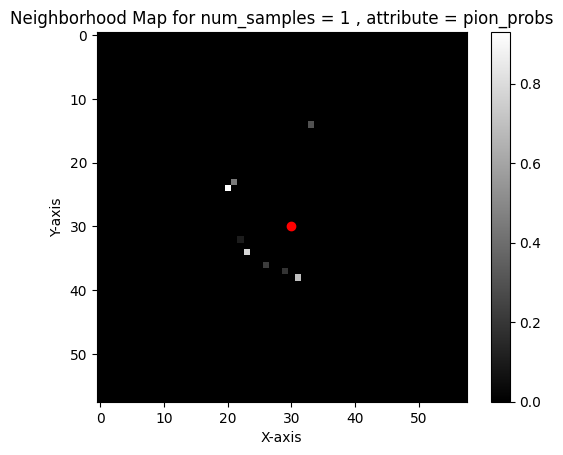

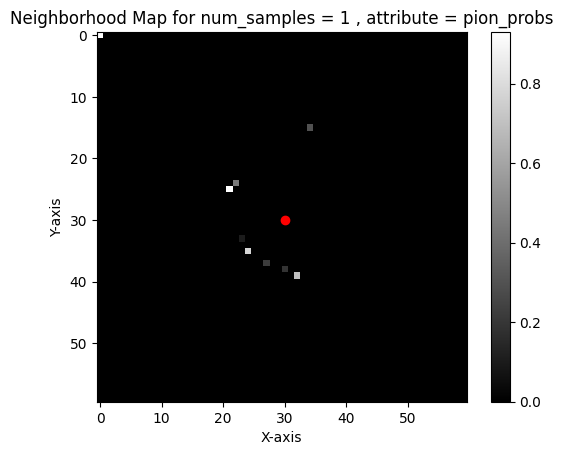

 neighborhood_maps_red shape (15175, 58, 58) neighborhood_maps shape (15175, 60, 60)
 setting cluster-candidate map key kaon_probs
mip_positions shape = (15175, 2)
cand_pos shape = (15175, 296, 2)
cand_pos shape = (15175, 296, 2)
cand_pos shape = (15175, 296, 2)
candidate_positions shape = (15175, 296, 2)
extended_mip_positions shape = (15175, 1, 2)
centered_positions shape = (15175, 296, 2)
distances shape = (15175, 296)
neighborhood_maps shape = (15175, 60, 60)
dist?mask shape = (15175, 296)
centered_positions shape = (15175, 296, 2)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 70)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 70)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 70)
map_indices shape = (15175, 296, 2)
map_indicesshape = (15175, 296, 2)
attribute[mask] shape = (282535,)
attribute shape = (15175, 296)
mask shape = (15175, 296)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 

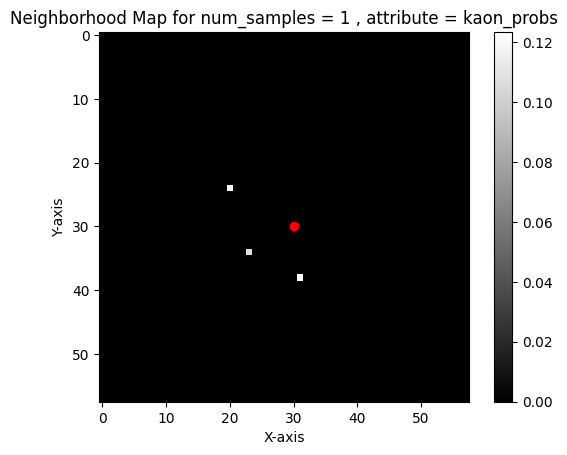

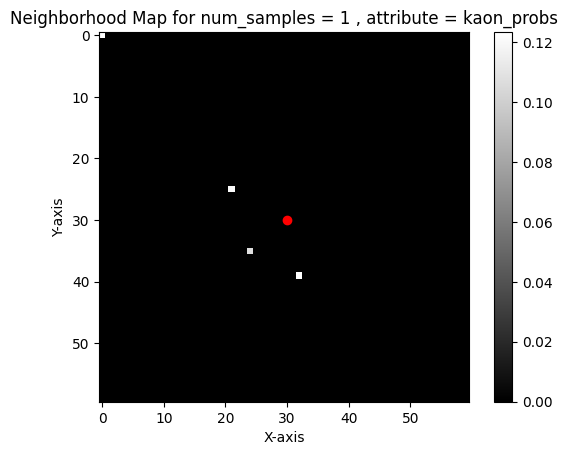

 neighborhood_maps_red shape (15175, 58, 58) neighborhood_maps shape (15175, 60, 60)
 setting cluster-candidate map key proton_probs
mip_positions shape = (15175, 2)
cand_pos shape = (15175, 296, 2)
cand_pos shape = (15175, 296, 2)
cand_pos shape = (15175, 296, 2)
candidate_positions shape = (15175, 296, 2)
extended_mip_positions shape = (15175, 1, 2)
centered_positions shape = (15175, 296, 2)
distances shape = (15175, 296)
neighborhood_maps shape = (15175, 60, 60)
dist?mask shape = (15175, 296)
centered_positions shape = (15175, 296, 2)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 70)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 70)
original data : num_tracks 15175 num_clusters 296
output data  (15175, 70)
map_indices shape = (15175, 296, 2)
map_indicesshape = (15175, 296, 2)
attribute[mask] shape = (282535,)
attribute shape = (15175, 296)
mask shape = (15175, 296)
original data : num_tracks 15175 num_clusters 296
output data  (15175

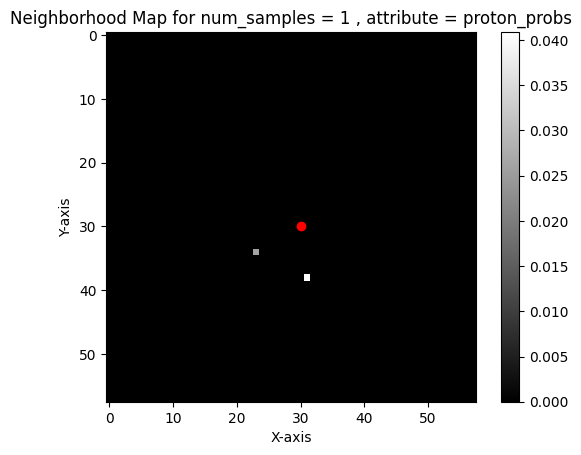

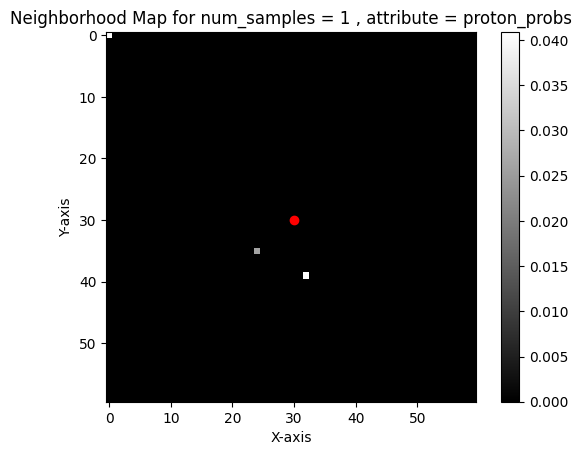

 neighborhood_maps_red shape (15175, 58, 58) neighborhood_maps shape (15175, 60, 60)
mip_positions shape = (15175, 2)
cand_pos shape = (15175, 353, 2)
cand_pos shape = (15175, 353, 2)
cand_pos shape = (15175, 353, 2)
candidate_positions shape = (15175, 353, 2)
extended_mip_positions shape = (15175, 1, 2)
centered_positions shape = (15175, 353, 2)
distances shape = (15175, 353)
neighborhood_maps shape = (15175, 60, 60)
dist?mask shape = (15175, 353)
centered_positions shape = (15175, 353, 2)
original data : num_tracks 15175 num_clusters 353
output data  (15175, 353)
original data : num_tracks 15175 num_clusters 353
output data  (15175, 353)
original data : num_tracks 15175 num_clusters 353
output data  (15175, 353)
map_indices shape = (15175, 353, 2)
map_indicesshape = (15175, 353, 2)
attribute[mask] shape = (461663,)
attribute shape = (15175, 353)
mask shape = (15175, 353)
original data : num_tracks 15175 num_clusters 353
output data  (15175, 353)
Maximum distance: 176.55465700692432
E

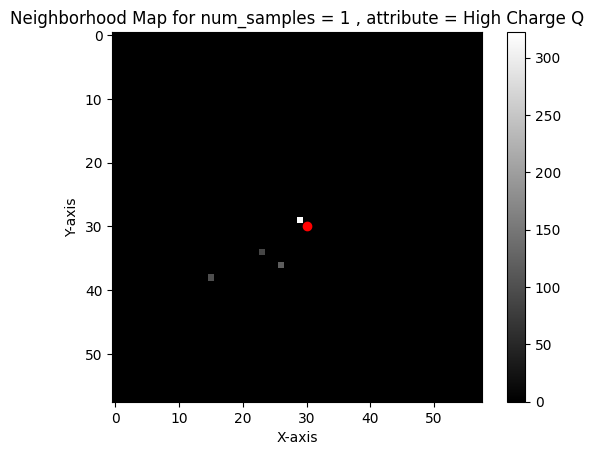

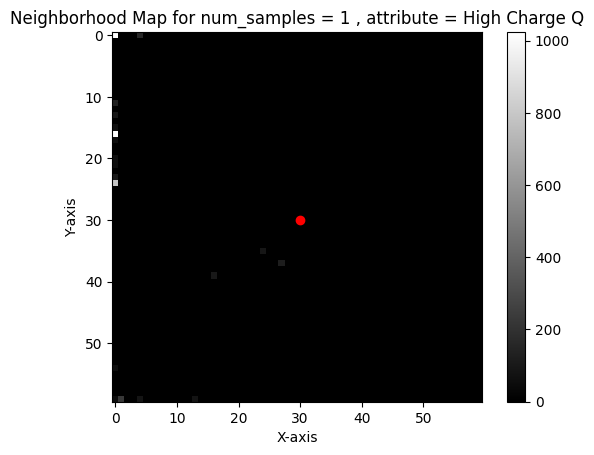

 neighborhood_maps_red shape (15175, 58, 58) neighborhood_maps shape (15175, 60, 60)
 key pion_probs  shape of map > (15175, 58, 58)
 key kaon_probs  shape of map > (15175, 58, 58)
 key proton_probs  shape of map > (15175, 58, 58)
 key high_charge  shape of map > (15175, 58, 58)
 key pion_probs  shape of map > (15175, 58, 58)
 key kaon_probs  shape of map > (15175, 58, 58)
 key proton_probs  shape of map > (15175, 58, 58)
 key high_charge  shape of map > (15175, 58, 58)
pion_mask shape (15175,)
key this_track
key this_track inner_key TrackAttributes_xMipThisTrack :  shape (15175,)
succesfully sat data
key this_track inner_key TrackAttributes_yMipThisTrack :  shape (15175,)
succesfully sat data
key this_track inner_key TrackAttributes_xRadThisTrack :  shape (15175,)
succesfully sat data
key this_track inner_key TrackAttributes_yRadThisTrack :  shape (15175,)
succesfully sat data
key this_track inner_key TrackAttributes_xPCThisTrack :  shape (15175,)
succesfully sat data
key this_track i

In [ ]:
from make_test_data import make_data
#all_dicts = make_data()

# other_tracks
# this_track
# mc_truth
# maps
# high_charge_clusters
# cluster_candidates



cluster_candidate_keys = ['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks']
this_track_keys = ['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'TrackAttributes_mipPcDistThisTrack', 'TrackAttributes_ckovThPionThisTrack', 'TrackAttributes_ckovThKaonThisTrack', 'TrackAttributes_ckovThProtonThisTrack', 'TrackAttributes_refIndexThisTrack', 'TrackAttributes_ckovReconThisTrack', 'TrackAttributes_ckovReconMassHypThisTrack', 'TrackAttributes_numCkovHough', 'TrackAttributes_numCkovHoughMH']
other_track_keys = ['TrackAttributes_xMipsOtherTracks', 'TrackAttributes_yMipsOtherTracks', 'TrackAttributes_xRadsOtherTracks', 'TrackAttributes_yRadsOtherTracks', 'TrackAttributes_xPCsOtherTracks', 'TrackAttributes_yPCsOtherTracks', 'TrackAttributes_thetaPsOtherTracks', 'TrackAttributes_phiPsOtherTracks', 'TrackAttributes_momentumsOtherTracks', 'TrackAttributes_qMipsOtherTracks', 'TrackAttributes_sizeMipsOtherTracks', 'TrackAttributes_mipPcDistsOtherTracks', 'TrackAttributes_ckovThPionOtherTracks', 'TrackAttributes_ckovThKaonOtherTracks', 'TrackAttributes_ckovThProtonOtherTracks', 'TrackAttributes_refIndexesOtherTracks', 'TrackAttributes_ckovReconOtherTracks', 'TrackAttributes_ckovReconMassHypOtherTracks']
high_charge_cluster_keys = ['highChargeClu_x','highChargeClu_y', 'highChargeClu_q', 'highChargeClu_size']
mc_truth_keys = ["mcTruth_pdgCodeTrack;", "mcTruth_isTrackToReconKnownPdg", "mcTruth_isMipMatchedCorrectly"]
po = ParticleObjectProcessorClass(all_dicts, cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys=mc_truth_keys)




In [ ]:
# po.this_track
# print(f"po.this_track shape {po.this_track.shape}")
# print(f"po.other_tracks shape {po.other_tracks.shape}")
# print(f"po.cluster_candidates shape {po.otcluster_candidatesher_tracks.shape}")
# print(f"po.po.maps shape {po.maps.shape}")
# print(f"po.po.high_charge_clusters shape {po.high_charge_clusters.shape}")


# po.other_tracks
# po.cluster_candidates
# po.maps
# po.high_charge_clusters


## Set Data

In [ ]:
#resolution = 4

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, confusion_matrix



import matplotlib.pyplot as plt
from itertools import cycle
import sys

#print(sys.getrecursionlimit()) # Prints 1000

print_vals = False
from numpy.linalg import norm


from scipy.signal import find_peaks

from __future__ import print_function
import os
import numpy as np


import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Input, Conv2D, Lambda, Flatten, Dense, concatenate, BatchNormalization, MaxPooling2D, Dropout, LeakyReLU, Masking, Embedding
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, LeakyReLU, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


%load_ext tensorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
%reload_ext tensorboard

early_stopping = EarlyStopping(
	monitor='val_loss',
	patience=20,
	restore_best_weights=True,
)



In [ ]:
def create_lr_scheduler(num_epochs=10, warmup_epochs=50):
    # endre warmup_epochs

    start_lr = 0 # Starting learning rate is 0 for the warm-up
    peak_lr = 0.001/(5) # was /5 # The learning rate we reach at the end of the warm-up
    end_lr = 5e-9   # The final learning rate at the end of training

    # Calculate decay rate based on peak and end learning rate
    # Notice we adjust the total number of epochs by subtracting the warm-up period
    exp_decay = -np.log(end_lr / peak_lr) / (num_epochs - warmup_epochs)

    # Warm-up followed by exponential decay
    def schedule(epoch):
        if epoch < warmup_epochs:
            return start_lr + ((peak_lr - start_lr) / (warmup_epochs - 1)) * epoch
        else:
            return peak_lr * np.exp(-exp_decay * (epoch - warmup_epochs))

    return tf.keras.callbacks.LearningRateScheduler(schedule)


In [ ]:
import numpy as np

class TrackData:
    def __init__(self, data_dict):
        # Store the entire dictionary
        self.data_dict = data_dict

    def to_feature_vector(self, keys):
        # Extract arrays using specified keys and concatenate them along the last dimension

        print(f"data_dict keys {self.data_dict.keys()}")
        print(f"ip keys {keys}")

        feature_vectors = np.stack([self.data_dict[key] for key in keys], axis=-1)

        for key in self.data_dict.keys():
            if self.data_dict[key] is not None:
                print(f"keu {key} shape {self.data_dict[key].shape}")

        print(f"feature_vectors shape {feature_vectors.shape}")

        return feature_vectors

class ParticleObject:
    def __init__(self, data, cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys):
        self.this_track = TrackData(data['this_track'])
        self.other_tracks = TrackData(data['other_tracks'])
        self.high_charge_clusters = TrackData(data['high_charge_clusters'])
        self.cluster_candidates = TrackData(data['cluster_candidates'])

        # op fields >
        self.feature_vector_cluster_candidates = self.prepare_feature_vectors("cluster_candidates", cluster_candidate_keys)


        mctruth = data['mc_truth']


        print(f"keys if mctruth {mctruth.keys()}")

        self.pdg = mctruth["mcTruth_pdgCodeTrack;"]

        self.maps = TrackData(data['maps'])
        self.feature_vector_this_track = self.prepare_feature_vectors("this_track", this_track_keys)
        self.feature_vector_other_tracks = self.prepare_feature_vectors("other_tracks", other_track_keys)
        self.feature_vector_high_charge_clusters = self.prepare_feature_vectors("high_charge_clusters", high_charge_cluster_keys)

        #self.features_list = [self.feature_vector_cluster_candidates, self.maps, self.feature_vector_this_track, self.feature_vector_other_tracks, self.feature_vector_high_charge_clusters]

        self.features = {
            'pdg': self.pdg,
            'cluster_candidates': self.feature_vector_cluster_candidates,
            'this_track': self.feature_vector_this_track,
            'other_tracks': self.feature_vector_other_tracks,
            'high_charge_clusters': self.feature_vector_high_charge_clusters,
            'maps': self.maps
        }




    def train_test_dev_split(self, train_size=0.7, min_samples_species = None, dev_size_ratio=0.15, test_size_ratio=0.15, random_seed=None):
        #assert train_size + dev_size + test_size == 1.0, "The sum of split sizes must be 1.0"

        total_samples = next(iter(self.features.values())).shape[0]
        indices = np.arange(total_samples)

        #training_size_all = train_size*min_samples_species
        dev_size_all = min_samples_species*dev_size_ratio
        test_size_all = min_samples_species*test_size_ratio


        print(f"total samples {total_samples}, len>indices {indices.shape}")
        if random_seed is not None:
            np.random.seed(random_seed)  # Set seed for reproducibility

        else :
            np.random.seed(27)  # Set seed for reproducibility


        np.random.shuffle(indices)
        print(f"        np.random.shuffle(indices)")

        # Calculate split indices
        train_end = int(train_size)
        dev_end = int(dev_size_all+train_end)
        test_end = int(test_size_all+dev_end)

        remaining_data = int(total_samples)-int(train_end)
        test_dev_split = 0.5



        print(f"        train_size {train_size} dev_size_all {dev_size_all} test_size_all {test_size_all}")

        print(f"        train_end {train_end} dev_end {dev_end} test_end {test_end}")
        print(f"         test-dev split {test_dev_split} ")
        print(f"        %train {train_end/total_samples}, %dev  {(dev_end-train_end)/total_samples} %test  {((test_end-dev_end))/total_samples} ")


        split_data = {}


        feature_names =  ["mc_truth", "cluster_candidates", "maps", "this_track", "other_tracks", "high_charge_clusters"]
        for feature_name, feature_vector in self.features.items():
            print(f"      feature_name {feature_name}")

            if feature_name != "maps":

                print(f"      feature_name {feature_name}  > shape {feature_vector.shape}")

                # Apply the shuffled indices and split the data
                shuffled_features = feature_vector[indices]
                train = shuffled_features[:train_end]

                # EF : NB TODO remove this back, to have dev and test
                #dev = shuffled_features[train_end:dev_end]
                test = shuffled_features[train_end:dev_end] # [dev_end:]
                dev = shuffled_features[dev_end:test_end]
                print(f"      feature_name {feature_name}")

                split_data[feature_name] = {
                    'train': train,
                    'dev': dev,
                    'test': test
                }

            else :
                print(f"feature_name {feature_name}")
                # here we need to loop over the keys of the maps

                print(f"type {type(feature_vector)}")

                keys = feature_vector.data_dict.keys()

                for key, map in feature_vector.data_dict.items():


                    shuffled_features = map[indices]

                    train = shuffled_features[:train_end]
                    test = shuffled_features[train_end:dev_end] # [dev_end:]
                    dev = shuffled_features[dev_end:test_end]

                    print(f"train >> type  {type(train)} shape {train.shape}")
                    print(f"dev >> type  {type(dev)} shape {dev.shape}")
                    print(f"test >> type  {type(test)} shape {test.shape}")

                    map_feature = f"{feature_name+key}"
                    if map_feature in map_keys:

                        split_data[map_feature] = {
                            'train': train,
                            'dev': dev,
                            'test': test
                        }

                    print(f"key >> {key} < map_feature {map_feature} type {type(map)} shape {map.shape}")





        print(f"      return  split_data")

        return split_data

        # feature_names =  ["cluster_candidates", "maps", "this_track", "other_tracks", "high_charge_clusters"]
        # for idx, feature_vector in enumerate(self.features_list):
        #     feature_name = feature_names[idx]
        #     print(f"      feature_name  {feature_name}  > shape {feature_vector.shape}")

        #     # Apply the shuffled indices and split the data
        #     shuffled_features = feature_vector[indices]
        #     train = shuffled_features[:train_end]
        #     dev = shuffled_features[train_end:dev_end]
        #     test = shuffled_features[dev_end:]

        #     print(f"      feature_name  {feature_name}")

        #     split_data[feature_name] = {
        #         'train': train,
        #         'dev': dev,
        #         'test': test
        #     }
        # print(f"      return  split_data")

        # return split_data



    def prepare_feature_vectors(self, category, keys):
        print(f"prepare_feature_vectors, keys : {keys} , category : {category}")
        if hasattr(self, category):
            track_data = getattr(self, category)
            fv = track_data.to_feature_vector(keys)
            print(f" type track_data {type(track_data)}, fv {type(fv)} ")
            print(f" shape fv > {fv.shape}")
            return fv
        else:
            raise ValueError(f"No such category: {category}")


# other_tracks
# this_track
# mc_truth
# maps
# high_charge_clusters
# cluster_candidates



#cluster_candidate_keys = ['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks']
#this_track_keys = ['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'TrackAttributes_mipPcDistThisTrack', 'TrackAttributes_ckovThPionThisTrack', 'TrackAttributes_ckovThKaonThisTrack', 'TrackAttributes_ckovThProtonThisTrack', 'TrackAttributes_refIndexThisTrack', 'TrackAttributes_ckovReconThisTrack', 'TrackAttributes_ckovReconMassHypThisTrack', 'TrackAttributes_numCkovHough', 'TrackAttributes_numCkovHoughMH']
#other_track_keys = ['TrackAttributes_xMipsOtherTracks', 'TrackAttributes_yMipsOtherTracks', 'TrackAttributes_xRadsOtherTracks', 'TrackAttributes_yRadsOtherTracks', 'TrackAttributes_xPCsOtherTracks', 'TrackAttributes_yPCsOtherTracks', 'TrackAttributes_thetaPsOtherTracks', 'TrackAttributes_phiPsOtherTracks', 'TrackAttributes_momentumsOtherTracks', 'TrackAttributes_qMipsOtherTracks', 'TrackAttributes_sizeMipsOtherTracks', 'TrackAttributes_mipPcDistsOtherTracks', 'TrackAttributes_ckovThPionOtherTracks', 'TrackAttributes_ckovThKaonOtherTracks', 'TrackAttributes_ckovThProtonOtherTracks', 'TrackAttributes_refIndexesOtherTracks', 'TrackAttributes_ckovReconOtherTracks', 'TrackAttributes_ckovReconMassHypOtherTracks']
#high_charge_cluster_keys = ['highChargeClu_x','highChargeClu_y', 'highChargeClu_q', 'highChargeClu_size']
#mc_truth_keys = ["mcTruth_pdgCodeTrack;", "mcTruth_isTrackToReconKnownPdg", "mcTruth_isMipMatchedCorrectly"]

In [ ]:
def set_data(pion_data, kaon_data, proton_data, cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys, map_keys):

    for key in pion_data.keys():
        print(f"key {key}")

    pion_objects = ParticleObject(pion_data, cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys)
    kaon_objects = ParticleObject(kaon_data,  cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys)
    proton_objects = ParticleObject(proton_data,  cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys)

    sh_pion_objects =  pion_objects.feature_vector_this_track.shape
    sh_kaon_objects =  kaon_objects.feature_vector_this_track.shape
    sh_proton_objects =  proton_objects.feature_vector_this_track.shape

    print(f"sh_pion_objects feature_vector_this_track {sh_pion_objects}")
    print(f"sh_kaon_objects feature_vector_this_track {sh_kaon_objects}")
    print(f"sh_proton_objects feature_vector_this_track {sh_proton_objects}")


    num_pion_objects =  pion_objects.feature_vector_this_track.shape[0]
    num_kaon_objects =  kaon_objects.feature_vector_this_track.shape[0]
    num_proton_objects =  proton_objects.feature_vector_this_track.shape[0]

    print(f"num_pion_objects {num_pion_objects}")
    print(f"num_kaon_objects {num_kaon_objects}")
    print(f"num_proton_objects {num_proton_objects}")
    total_objects = num_pion_objects + num_kaon_objects + num_proton_objects
    species_count = [num_pion_objects, num_kaon_objects, num_proton_objects]

    min_samples_species = min(species_count)

    species_ratio = [count / total_objects for count in species_count]

    print(f"species_ratio {species_ratio}")

    print(f"try train_test_split")

    print(f"\n\n\n\n\n Now doing pion")
    train_size_ratio = 0.5
    training_size_all = train_size_ratio*min_samples_species


    # species_count_dev_test = [num_pion_objects-training_size_all, num_kaon_objects-training_size_all, num_proton_objects-training_size_all]
    # min_samples_species_dev_test = min(species_count_dev_test)
    # total_objects_dev_test = num_pion_objects-training_size_all+ num_kaon_objects-training_size_all+ num_proton_objects-training_size_all
    # species_ratio_dev_test = [count / total_objects_dev_test for count in min_samples_species_dev_test]

    test_size_ratio = 0.05
    dev_size_ratio = 0.45

    training_size_all = int(train_size_ratio*min_samples_species)
    dev_size_all = int(dev_size_ratio*min_samples_species)
    test_size_all = int(test_size_ratio*min_samples_species)


    print(f"training_size_all {training_size_all}, dev_size_all {dev_size_all}, test_size_all {test_size_all}")

    try :
        # TEST_SIZE = 0.4
        # split_data[feature_name] = {
        #         'train': train,
        #         'dev': dev,
        #         'test': test
        #     }

        # return split_data


        split_data_pions = pion_objects.train_test_dev_split(train_size=training_size_all, min_samples_species = min_samples_species, dev_size_ratio=dev_size_ratio, test_size_ratio=test_size_ratio, random_seed=27)

        del pion_objects
        gc.collect()
    except Exception as e :
        print(f"failed to split_data_pions with {e}")


    print(f"\n\n\n\n\n Now doing kaon")
    try :
        split_data_kaons = kaon_objects.train_test_dev_split(train_size=training_size_all, min_samples_species = min_samples_species, dev_size_ratio=dev_size_ratio, test_size_ratio=test_size_ratio, random_seed=27)
        del kaon_objects
        gc.collect()
    except Exception as e :
        print(f"failed to split_data_kaons with {e}")

    print(f"\n\n\n\n\n Now doing proton")
    try :
        split_data_protons = proton_objects.train_test_dev_split(train_size=training_size_all, min_samples_species = min_samples_species, dev_size_ratio=dev_size_ratio, test_size_ratio=test_size_ratio, random_seed=27)
        del proton_objects
        gc.collect()
    except Exception as e :
        print(f"failed to split_data_protons with {e}")



    # Concatenate train/test/dev individually across species
    # and shuffle so we fx for train have not succesive pions/kaons/prootns

    #train_data = np.vstack((split_data_pions['train'], split_data_kaons['train'], split_data_protons['train']))
    #test_data = np.vstack((split_data_pions['test'], split_data_kaons['test'], split_data_protons['test']))
    #dev_data = np.vstack((split_data_pions['dev'], split_data_kaons['dev'], split_data_protons['dev']))

    print(f"split_data_pions : keys {split_data_pions.keys()}")


    for key, item in split_data_pions.items():
        print(f"\n\n\n key > {key}")
        for key_inner, item_inner in item.items():
            print(f"key_inner > {key_inner} > type item_inner {type(item_inner)} shape > {(item_inner).shape}")


    #plot_ckov_probs(split_data_pions, split_data_kaons, split_data_protons)

    pions_ot = split_data_pions['other_tracks']
    kaons_ot = split_data_kaons['other_tracks']
    protons_ot = split_data_protons['other_tracks']


    train_data_samples = pions_ot['train'].shape[0] + kaons_ot['train'].shape[0] + protons_ot['train'].shape[0]
    test_data_samples = pions_ot['test'].shape[0] + kaons_ot['test'].shape[0] + protons_ot['test'].shape[0]
    dev_data_samples = pions_ot['dev'].shape[0] + kaons_ot['dev'].shape[0] + protons_ot['dev'].shape[0]

    print(f"train_data_samples  {train_data_samples}  test_data_samples {test_data_samples}  dev_data_samples {dev_data_samples} ")


    indices_train = np.arange(train_data_samples)
    np.random.shuffle(indices_train)  # Shuffle the indices

    indices_test = np.arange(test_data_samples)
    np.random.shuffle(indices_test)  # Shuffle the indices

    indices_dev = np.arange(dev_data_samples)
    np.random.shuffle(indices_dev)  # Shuffle the indices

    combined_data = {}


    for t in ["train", "test", "dev"]:

        if t == "train" :
            indices = indices_train

        if t == "test" :
            indices = indices_test

        if t == "dev" :
            indices = indices_dev

        print(f" ================================= {t} set:")

        for key in split_data_pions.keys():


            pion_attr = split_data_pions[key][t]
            kaon_attr = split_data_kaons[key][t]
            proton_attr = split_data_protons[key][t]

            # concatenate to add them along first dimension, then shuffle based on indices_dev/indices_test/indices_train
            #concat = np.stack(pion_attr, pion_attr, pion_attr) #

            combined_features = np.concatenate([pion_attr, kaon_attr, proton_attr], axis=0)
            #print(f"key {key} > set {t}")

            print(f"Shape of {key} pion_attr in {t} set:", pion_attr.shape)
            print(f"Shape of {key} kaon_attr in {t} set:", kaon_attr.shape)
            print(f"Shape of {key} proton_attr in {t} set:", proton_attr.shape)

            #print(f"key {key} > set {t}")
            # combined_features[indices]

            shuffled_features = combined_features[indices]

            if t not in combined_data:
                combined_data[t] = {}  # Initializes a new dictionary for this key if it does not exist


            # if key == "maps":
            combined_data[t][key] = shuffled_features

            #print(f"op >>> {combined_data[key][t].shape}")
            print(f"Shape of {key} combined_features in {t} set:", combined_data[t][key].shape)


            #shuffled_features = map[indices]

        #np.random.shuffle(indices)  # Shuffle the indices




        #print(f" ; {t} pions : {pions.shape[0]}, kaons :  {kaons.shape[0]}, protons :  {protons.shape[0]}")


    print(f"\n samples ; train {train_data_samples}, test {test_data_samples}, dev {dev_data_samples} \n")
    for key, item in combined_data.items():
        print(f"\n\n\n key > {key}")
        for key_inner, item_inner in item.items():
            print(f"key_inner > {key_inner} > type item_inner {type(item_inner)} ")

    return combined_data



In [ ]:
cluster_candidate_keys = ['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton']#, 'sum_prob_all_tracks']
this_track_keys = ['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'TrackAttributes_mipPcDistThisTrack', 'TrackAttributes_ckovThPionThisTrack', 'TrackAttributes_ckovThKaonThisTrack', 'TrackAttributes_ckovThProtonThisTrack', 'TrackAttributes_refIndexThisTrack']#, 'TrackAttributes_ckovReconThisTrack', 'TrackAttributes_ckovReconMassHypThisTrack', 'TrackAttributes_numCkovHough', 'TrackAttributes_numCkovHoughMH']
other_track_keys = ['TrackAttributes_xMipsOtherTracks', 'TrackAttributes_yMipsOtherTracks', 'TrackAttributes_xRadsOtherTracks', 'TrackAttributes_yRadsOtherTracks', 'TrackAttributes_xPCsOtherTracks', 'TrackAttributes_yPCsOtherTracks', 'TrackAttributes_thetaPsOtherTracks', 'TrackAttributes_phiPsOtherTracks', 'TrackAttributes_momentumsOtherTracks', 'TrackAttributes_qMipsOtherTracks', 'TrackAttributes_sizeMipsOtherTracks', 'TrackAttributes_mipPcDistsOtherTracks', 'TrackAttributes_ckovThPionOtherTracks', 'TrackAttributes_ckovThKaonOtherTracks', 'TrackAttributes_ckovThProtonOtherTracks']#, 'TrackAttributes_refIndexesOtherTracks']#, 'TrackAttributes_ckovReconOtherTracks', 'TrackAttributes_ckovReconMassHypOtherTracks']
high_charge_cluster_keys = ['highChargeClu_x','highChargeClu_y', 'highChargeClu_q', 'highChargeClu_size']
mc_truth_keys = ["mcTruth_pdgCodeTrack;", "mcTruth_isTrackToReconKnownPdg", "mcTruth_isMipMatchedCorrectly"]

map_keys = ['pion_probs', 'kaon_probs', 'proton_probs', "mapshigh_charge"]
#maps
map_keys = ['mapspion_probs', 'mapskaon_probs', 'mapsproton_probs', "mapshigh_charge"]


cnn_attributes = ['pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks']

# map_feature = f"{feature_name+key}"
# if map_feature in map_keys:

#     split_data[map_feature] = {
#         'train': train,
#         'dev': dev,
#         'test': test
#     }

# for key, item in po.pion_data.items():
#     print(f"\n\n\n key > {key}")
#     for key_inner, item_inner in item.items():
#         print(f"key_inner > {key_inner} > type item_inner {type(item_inner)} ")


combined_data = set_data(po.pion_data, po.kaon_data, po.proton_data, cluster_candidate_keys, this_track_keys, other_track_keys, high_charge_cluster_keys, mc_truth_keys, map_keys)

key this_track
key other_tracks
key cluster_candidates
key high_charge_clusters
key maps
key mc_truth
prepare_feature_vectors, keys : ['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton'] , category : cluster_candidates
data_dict keys dict_keys(['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton', 'sum_prob_all_tracks'])
ip keys ['sigma_ring', 'theta_cer', 'x', 'y', 'q', 'size', 'phi_cer', 'pion_probs', 'kaon_probs', 'proton_probs', 'pion_probs_norm', 'kaon_probs_norm', 'proton_probs_norm', 'sum_prob_track', 'raw_cluster_size', 'num_raw_clusters', 'z_pion', 'z_kaon', 'z_proton']
keu sigma_ri

In [ ]:
for key, item in combined_data.items():
    print(f"\n\n\n key > {key}")
    for key_inner, item_inner in item.items():
        print(f"key_inner > {key_inner} > type item_inner {type(item_inner)}  shape {(item_inner.shape)} ")





 key > train
key_inner > pdg > type item_inner <class 'numpy.ndarray'>  shape (2619,) 
key_inner > cluster_candidates > type item_inner <class 'numpy.ndarray'>  shape (2619, 296, 19) 
key_inner > this_track > type item_inner <class 'numpy.ndarray'>  shape (2619, 16) 
key_inner > other_tracks > type item_inner <class 'numpy.ndarray'>  shape (2619, 14, 15) 
key_inner > high_charge_clusters > type item_inner <class 'numpy.ndarray'>  shape (2619, 353, 4) 
key_inner > mapspion_probs > type item_inner <class 'numpy.ndarray'>  shape (2619, 58, 58) 
key_inner > mapskaon_probs > type item_inner <class 'numpy.ndarray'>  shape (2619, 58, 58) 
key_inner > mapsproton_probs > type item_inner <class 'numpy.ndarray'>  shape (2619, 58, 58) 
key_inner > mapshigh_charge > type item_inner <class 'numpy.ndarray'>  shape (2619, 58, 58) 



 key > test
key_inner > pdg > type item_inner <class 'numpy.ndarray'>  shape (2355,) 
key_inner > cluster_candidates > type item_inner <class 'numpy.ndarray'>  shape (

## Model

In [ ]:
def plot_ckov_probs(data_dict):

    for key in data_dict.keys():
        print(f"key {key}")


plot_ckov_probs(all_dicts)


key SumProballTracks;1
key ThisTrack;1
key OtherTracks;1
key HighChargeClusters;4
key ClusterCandidates;14
key McTruth;1


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, LeakyReLU, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers




In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer

class MassClassifier2:
    def __init__(self, combined_data):
        self.model = None  # This will hold the compiled model
        self.data = combined_data

        self.init_data()

    def map_pdg_to_class(self, pdg_values):
        """
        Maps PDG values to class indices.
        211 and -211 -> Class 0 (Pions)
        321 -> Class 1 (Kaons)
        2212 -> Class 2 (Protons)

        Parameters:
        - pdg_values: numpy array of PDG values

        Returns:
        - class_indices: numpy array of class indices
        """
        class_indices = np.zeros_like(pdg_values, dtype=int)

        # Mapping PDG values to class indices
        class_indices[np.abs(pdg_values) == 211] = 0  # Pions
        class_indices[np.abs(pdg_values) == 321] = 1  # Kaons
        class_indices[np.abs(pdg_values) == 2212] = 2  # Protons

        return class_indices

    def init_data(self):
        self.train_variables_dict = self.data["train"]
        self.test_variables_dict = self.data["test"]
        self.dev_variables_dict = self.data["dev"]

        #this_track_keys = ['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'TrackAttributes_mipPcDistThisTrack', 'TrackAttributes_ckovThPionThisTrack', 'TrackAttributes_ckovThKaonThisTrack', 'TrackAttributes_ckovThProtonThisTrack', 'TrackAttributes_refIndexThisTrack']#, 'TrackAttributes_ckovReconThisTrack', 'TrackAttributes_ckovReconMassHypThisTrack', 'TrackAttributes_numCkovHough', 'TrackAttributes_numCkovHoughMH']

        this_track_keys = ['TrackAttributes_xMipThisTrack', 'TrackAttributes_yMipThisTrack', 'TrackAttributes_xRadThisTrack', 'TrackAttributes_yRadThisTrack', 'TrackAttributes_xPCThisTrack', 'TrackAttributes_yPCThisTrack', 'TrackAttributes_thetaPThisTrack', 'TrackAttributes_phiPThisTrack', 'TrackAttributes_momentumThisTrack', 'TrackAttributes_qMipThisTrack', 'TrackAttributes_sizeMipThisTrack', 'TrackAttributes_mipPcDistThisTrack', 'TrackAttributes_ckovThPionThisTrack', 'TrackAttributes_ckovThKaonThisTrack', 'TrackAttributes_ckovThProtonThisTrack', 'TrackAttributes_refIndexThisTrack', 'TrackAttributes_ckovReconThisTrack', 'TrackAttributes_ckovReconMassHypThisTrack', 'TrackAttributes_numCkovHough', 'TrackAttributes_numCkovHoughMH']

        tt = self.train_variables_dict["this_track"]

        print(f"shape of this_track {tt.shape}")

        #print(f"shape of this_track {tt.shape()}")

        self.train_mom = self.train_variables_dict["this_track"][:, 8]
        self.test_mom = self.test_variables_dict["this_track"][:, 8]
        self.dev_mom = self.dev_variables_dict["this_track"][:, 8]

        self.train_variables = self.make_data(self.train_variables_dict)
        self.test_variables = self.make_data(self.test_variables_dict)
        self.dev_variables = self.make_data(self.dev_variables_dict)

        plot_ckov_probs(self.data)


        # del self.data
        # encode the labels
        self.one_hot_encode()
        self.set_variable_shapes()
        self.plot_pdg_histograms()

    def make_data(self, data):
        # Extract features for each data point in train_data using a list comprehension

        # Unpack the features using zip, effectively transposing the structure

        # Extract specific maps from the probability_maps and probability_maps_un using list comprehensions

        cnn_attributes = ['z_pion', 'z_kaon', 'z_proton',  'proton_probs', 'pion_probs_norm', 'kaon_probs_norm']
        #cnn_attributes = ['z_pion', 'z_kaon', 'z_proton',  'proton_probs', 'pion_probs_norm', 'kaon_probs_norm']
        #cnn_attributes = ['z_pion', 'z_kaon', 'z_proton',  'proton_probs', 'pion_probs_norm', 'kaon_probs_norm']

        cnn_attributes = ['pion_probs', 'kaon_probs', 'proton_probs', "mapshigh_charge"]


        #current_track_input, other_tracks_input, cluster_info_input, high_charge_clusters_input,
        #map_inputs
        # Combine the feature lists into train_variables
        variables = [
            np.array(data["this_track"]),
            np.array(data["other_tracks"]),
            np.array(data["cluster_candidates"]),
            np.array(data["high_charge_clusters"])
        ]

        for key in data.keys():
            print(f"data_key {key}")

        for map_key in map_keys:

            print(f"map_key {map_key}")
            map = np.array(data[map_key])
            print(f"shape of map {map.shape}")
            map_reshaped = np.expand_dims(map, axis=1)
            variables.append(map_reshaped)
            print(f"shape of map_reshaped {map_reshaped.shape}")


        for var in variables :
            var[np.isnan(var)] = 0


        return variables


    def plot_pdg_histograms(self):


        pdg_categories = {
            211: 'Pion (+)',
            -211: 'Pion (-)',
            321: 'Kaon (+)',
            -321: 'Kaon (-)',
            2212: 'Proton',
            -2212: 'Antiproton'
        }


        def codes_to_categories(pdg_codes):
            return np.array([pdg_categories[code] for code in pdg_codes])


        # Extract pdg codes
        pdg_train = self.train_variables_dict["pdg"]
        pdg_dev = self.dev_variables_dict["pdg"]
        pdg_test = self.test_variables_dict["pdg"]

        self.pdg_train_labels = codes_to_categories(pdg_train)
        self.pdg_dev_labels = codes_to_categories(pdg_dev)
        self.pdg_test_labels = codes_to_categories(pdg_test)

        print(np.unique(pdg_train))
        print(np.unique(pdg_dev))
        print(np.unique(pdg_test))

        # Define the particle types you are interested in
        particle_types = [-2212, -321, -211, 211, 321, 2212]

        # Define the bins for the histogram
        bins = np.array(particle_types) - 0.5  # Set bins edges between the integer PDG codes
        bins = np.sort(bins)
        bins = np.unique(bins)  # This removes duplicates and sorts the array
        #bins = np.linspace(data.min(), data.max(), num=number_of_bins)


        bins = np.append(bins, particle_types[-1] + 0.5)  # Add the last edge for the last bin
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        fig.suptitle('Histograms of PDG Codes for Train, Dev, and Test Sets', fontsize=16)

        # Plot histograms
        axs[0].hist(self.pdg_train_labels, bins=np.arange(len(pdg_categories) + 1) - 0.5, rwidth=0.8, alpha=0.7, color='blue', align='mid')
        axs[0].set_title('Train Set')
        axs[0].set_xticks(np.arange(len(pdg_categories)))
        axs[0].set_xticklabels(pdg_categories.values(), rotation=45, ha="right")
        axs[0].set_ylabel('Frequency')

        axs[1].hist(self.pdg_dev_labels, bins=np.arange(len(pdg_categories) + 1) - 0.5, rwidth=0.8, alpha=0.7, color='green', align='mid')
        axs[1].set_title('Dev Set')
        axs[1].set_xticks(np.arange(len(pdg_categories)))
        axs[1].set_xticklabels(pdg_categories.values(), rotation=45, ha="right")

        axs[2].hist(self.pdg_test_labels, bins=np.arange(len(pdg_categories) + 1) - 0.5, rwidth=0.8, alpha=0.7, color='red', align='mid')
        axs[2].set_title('Test Set')
        axs[2].set_xticks(np.arange(len(pdg_categories)))
        axs[2].set_xticklabels(pdg_categories.values(), rotation=45, ha="right")

        plt.tight_layout()
        plt.show()

        fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # This will correctly create a 2x3 grid of axes.

        # Cumulative plots
        for i, data in enumerate([self.pdg_train_labels, self.pdg_dev_labels, self.pdg_test_labels]):
            for label in pdg_categories.values():
                idx = np.where(data == label)[0]
                cumulative_counts = np.cumsum(np.ones(len(idx)))
                axs[1, i].plot(idx, cumulative_counts, label=label)
            axs[1, i].set_title(['Train Set', 'Dev Set', 'Test Set'][i] + ' Cumulative Counts')
            axs[1, i].set_xlabel('Index')
            axs[1, i].set_ylabel('Cumulative Count')
            axs[1, i].legend()

        plt.tight_layout()
        plt.show

    def one_hot_encode(self):

        self.y_train_un = self.train_variables_dict["pdg"]
        y_train_class = self.map_pdg_to_class(self.y_train_un.flatten())
        encoder = OneHotEncoder(sparse=False)
        self.y_train = encoder.fit_transform(y_train_class.reshape(-1, 1))

        self.y_test_un = self.test_variables_dict["pdg"]
        y_test_class = self.map_pdg_to_class(self.y_test_un.flatten())
        encoder = OneHotEncoder(sparse=False)
        self.y_test = encoder.fit_transform(y_test_class.reshape(-1, 1))


        self.y_dev_un = self.dev_variables_dict["pdg"]
        y_dev_class = self.map_pdg_to_class(self.y_dev_un.flatten())
        encoder = OneHotEncoder(sparse=False)
        self.y_dev = encoder.fit_transform(y_dev_class.reshape(-1, 1))


    def get_shape(self, data_key):
        data = self.train_variables_dict[data_key]
        first_array = data[0, ...]


        print(f"get_shape >> variable {data_key} >>  type {type(first_array)}")
        shapes = first_array.shape

        print(f"variable {data_key} >> set shape {shapes}")

        if "map" in data_key:
            #shapes = np.expand_dims(shapes, axis=0)
            shapes = (1, shapes[0], shapes[1])
            print(f"reshaped to > variable {data_key} >> set shape {shapes}")


        return shapes

    def set_variable_shapes(self):

        self.current_track_shape = self.get_shape("this_track")
        self.other_tracks_shape = self.get_shape("other_tracks")
        self.high_charge_clusters_shape = self.get_shape("high_charge_clusters")
        self.cluster_candidate_shape = self.get_shape("cluster_candidates")
        self.map_shape = self.get_shape("mapshigh_charge")
        self.map_size = self.map_shape[1]

        print("Current track shape:", self.current_track_shape)
        print("Other tracks shape:", self.other_tracks_shape)
        print("High charge clusters shape:", self.high_charge_clusters_shape)
        print("Cluster candidate shape:", self.cluster_candidate_shape)
        print("Map shape:", self.map_shape)
        print("Map size:", self.map_size)

    # def set_training_data(self, train_data):


    #     self.train_momentum = np.array([td.currentTrack.Momentum for td in train_data])
    #     self.train_ckov_recon = np.array([td.currentTrack.ckovReconstructed for td in train_data])
    #     self.train_ckov_theoretical = np.array([td.currentTrack.CkovTheoretical for td in train_data])


    #     # Clean up to free memory
    #     del train_data, hadron_features, current_track_features, other_track_features, probability_maps, probability_maps_un, high_charge_clusters
    #     import gc
    #     gc.collect()



    # def set_test_data(self, test_data):

    #     self.test_momentum = np.array([td.currentTrack.Momentum for td in test_data])
    #     self.test_ckov_recon = np.array([td.currentTrack.ckovReconstructed for td in test_data])
    #     self.test_ckov_theoretical = np.array([td.currentTrack.CkovTheoretical for td in test_data])


    #     del test_data
    #     import gc
    #     gc.collect()


    # def set_dev_data(self, test_data):

    #     self.test_momentum = np.array([td.currentTrack.Momentum for td in test_data])
    #     self.test_ckov_recon = np.array([td.currentTrack.ckovReconstructed for td in test_data])
    #     self.test_ckov_theoretical = np.array([td.currentTrack.CkovTheoretical for td in test_data])


    #     del test_data
    #     import gc
    #     gc.collect()



#     def __init__(self, train_data, test_data):

#         current_track_features, other_track_features, probability_maps, probability_maps_un, mips_features, hadron_features = create_feature_vectors(train_data[0])

#         current_track_features, other_track_features, probability_maps, probability_maps_un, mips_features, hadron_features = create_feature_vectors(train_data[0])



#             # current_track_input, other_tracks_input, cluster_info_input, mip_input,
#             # pion_map_input, kaon_map_input, proton_map_input,
#             # pion_map_un_input, kaon_map_un_input, proton_map_un_input

#         self.train_variables = make_data(train_data)
#         self.test_variables = make_data(test_data)


#         self.model = None  # This will hold the compiled model
#         self.current_track_shape = current_track_features.shape
#         self.cluster_candidate_shape = other_track_features.shape
#         self.high_charge_clusters_shape = mips_features.shape

#         self.train_data, self.test_data = train_data, test_data

#         # current_track_features, other_track_features, probability_maps, probability_maps_un, mips_features, hadron_features \

#         self.train_momentum = np.array([td.currentTrack.Momentum for td in train_data])
#         self.test_momentum = np.array([td.currentTrack.Momentum for td in test_data])

#         self.train_ckov_recon = np.array([td.currentTrack.ckovReconstructed for td in train_data])
#         self.test_ckov_recon = np.array([td.currentTrack.ckovReconstructed for td in test_data])

#         self.train_ckov_theoretical = np.array([td.currentTrack.CkovTheoretical for td in train_data])
#         self.test_ckov_theoretical = np.array([td.currentTrack.CkovTheoretical for td in test_data])


#         self.y_train_un = np.array([td.currentTrack.TrackPdg for td in train_data])
#         self.y_test_un = np.array([td.currentTrack.TrackPdg for td in test_data])
#         from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
#         y_train_class = map_pdg_to_class(self.y_train_un.flatten())
#         y_test_class = map_pdg_to_class(self.y_test_un.flatten())

#         #       # if pdg == 211 -- pion 321 kaon 2212 proton else "other"
#         #lb = LabelBinarizer()
#         #lb.classes_ = np.array(['pion', 'kaon', 'proton'])
#         #y_one_hot = lb.transform(y)
#         encoder = OneHotEncoder(sparse=False)
#         self.y_train = encoder.fit_transform(y_train_class.reshape(-1, 1))
#         self.y_test = encoder.fit_transform(y_test_class.reshape(-1, 1))
#         self.cluster_candidate_shape = hadron_features.shape
#         self.map_shape = probability_maps["kaon_map"].shape
#         self.map_size = probability_maps["kaon_map"].shape[1]


#         print("Current Track Features Shape:", self.current_track_shape)
#         print("Other Tracks Features Shape:", self.cluster_candidate_shape)
#         print("Cluster Info Feature Dimension:", self.cluster_candidate_shape)
#         print("Probability Map Shape:", self.map_shape)



#         # current_track_features
#         # get_feature_vector_other_track
#         #         other_tracks_CkovTheoretical shape (15, 3)
#         # get_hadron_features
#         # Current Track Features Shape: (14, 1)
#         # Other Tracks Features Shape: (14, 15)
#         # Cluster Info Feature Dimension: (15, 759)
#         # Probability Map Shape: (1, 50, 50)

    def get_truth_un(self):
        return self.y_train_un, self.y_test_un


    def  get_truth(self):
        return self.y_train, self.y_test

    def get_data(self):
        return self.train_variables, self.test_variables

    def get_Ckov_Reconstructed(self):
        return self.train_ckov_recon, self.test_ckov_recon, self.train_ckov_theoretical, self.test_ckov_theoretical, self.train_momentum, self.test_momentum


    def make_maps(self):


        def build_species_layers(input_map, filters, filter_sizes, stride_arr, pool_arr, alpha, dropout_rate, l1_reg=0.0, l2_reg=0.0):

            print(f"type reg {type(l1_reg)} | {type(l2_reg)}")

            if l1_reg > 0.0 and l2_reg > 0.0:
                reg = l1_l2(l1=l1_reg, l2=l2_reg)
            elif l1_reg > 0.0:
                reg = l1(l1_reg)
            elif l2_reg > 0.0:
                reg = l2(l2_reg)
            else:
                reg = None
            layers = input_map
            for i in range(len(filters)):
                layers = Conv2D(filters[i],
                                (filter_sizes[i], filter_sizes[i]),
                                strides=(stride_arr[i], stride_arr[i]),
                                padding='same',
                                kernel_regularizer=reg)(layers)
                layers = BatchNormalization()(layers)
                layers = LeakyReLU(alpha=alpha)(layers)
                layers = MaxPooling2D((pool_arr[i], pool_arr[i]))(layers)
                layers = Dropout(dropout_rate)(layers)
            flat_map = Flatten()(layers)
            return flat_map


        # Inputs for the probability maps
        pion_map_input = Input(shape=(1,self.map_size, self.map_size), name='pion_map_input')
        kaon_map_input = Input(shape=(1,self.map_size, self.map_size), name='kaon_map_input')
        proton_map_input = Input(shape=(1,self.map_size, self.map_size), name='proton_map_input')
        pion_map_un_input = Input(shape=(1,self.map_size, self.map_size), name='pion_map_un_input')
        kaon_map_un_input = Input(shape=(1,self.map_size, self.map_size), name='kaon_map_un_input')
        proton_map_un_input = Input(shape=(1,self.map_size, self.map_size), name='proton_map_un_input')


        flat_mapPion = build_species_layers(pion_map_input, filters, filter_sizes, stride_arr, pool_arr, alpha, do, l1_reg, l2_reg, "pion")
        flat_mapKaon = build_species_layers(kaon_map_input, filters, filter_sizes, stride_arr, pool_arr, alpha, do, l1_reg, l2_reg)
        flat_mapProton = build_species_layers(proton_map_input, filters, filter_sizes, stride_arr, pool_arr, alpha, do, l1_reg, l2_reg)


        flat_mapPion_un = build_species_layers(pion_map_un_input, filters, filter_sizes, stride_arr, pool_arr, alpha, do, l1_reg, l2_reg)
        flat_mapKaon_un = build_species_layers(kaon_map_un_input, filters, filter_sizes, stride_arr, pool_arr, alpha, do, l1_reg, l2_reg)
        flat_mapProton_un = build_species_layers(proton_map_un_input, filters, filter_sizes, stride_arr, pool_arr, alpha, do, l1_reg, l2_reg)


        # print(f"concat_cnn_norm concat")

        #### Concatenate
        concat_cnn_norm = tf.keras.layers.Concatenate(name="concat_cnn_norm")([flat_mapPion, flat_mapKaon, flat_mapProton])


        # print(f"concat_cnn_norm_un concat")


        concat_cnn_norm_un = tf.keras.layers.Concatenate(name="concat_cnn_norm_un")([flat_mapPion_un, flat_mapKaon_un, flat_mapProton_un])


        droput = 0.2
        un = [128, 64, 16]
        for i in un:
          dense_cnn_norm = Dense(i, kernel_initializer='he_normal')(concat_cnn_norm)

          # Then apply BatchNormalization
          bn_dense_cnn_norm = BatchNormalization()(dense_cnn_norm)

          # Then apply Activation (LeakyReLU)
          leaky_dense_cnn_norm = LeakyReLU(alpha=alpha)(bn_dense_cnn_norm)

          # Finally apply Dropout
          dropout_cnn_norm = Dropout(dropout)(leaky_dense_cnn_norm)

        units_set2 = [64, 32, 8]
        un = [128, 64, 16]
        for i in units_set2:
          dense_cnn_norm_un = Dense(i, kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_combined_cluster_track[0][0][0], l1l2_weights_combined_cluster_track[0][0][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_combined_cluster_track[0][0][2]))(concat_cnn_norm_un)

          # Then apply BatchNormalization
          bn_dense_norm_un = BatchNormalization()(dense_cnn_norm_un)

          # Then apply Activation (LeakyReLU)
          leaky_dense_cnn_norm_un = LeakyReLU(alpha=alpha)(bn_dense_norm_un)

          # Finally apply Dropout
          dropout_cnn_norm_un = Dropout(dropout)(leaky_dense_cnn_norm_un)

        print(f"concat CNNs ;: concat_cnn_comb")

        print("dropout_cnn_norm_un shape:", dropout_cnn_norm_un.shape)
        print("dropout_cnn_norm shape:", dropout_cnn_norm.shape)


        concat_cnn_comb = tf.keras.layers.Concatenate(name="concat_cnn_comb")([dropout_cnn_norm_un, dropout_cnn_norm])

        un = [128, 64, 16]
        for i in units_set2:
          dense_cnn_comb = Dense(i, kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_combined_cluster_track[0][0][0], l1l2_weights_combined_cluster_track[0][0][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_combined_cluster_track[0][0][2]))(concat_cnn_comb)

          # Then apply BatchNormalization
          bn_dense_cnn_comb = BatchNormalization()(dense_cnn_comb)

          # Then apply Activation (LeakyReLU)
          leaky_dense_cnn_comb = LeakyReLU(alpha=alpha)(bn_dense_cnn_comb)

          # Finally apply Dropout
          dropout_cnn_comb = Dropout(dropout)(leaky_dense_cnn_comb)


        concat_cnn_comb_flat = Flatten(name='concat_cnn_comb_flat')(concat_cnn_comb)
        prev_combined_cluster_track_flat = Flatten(name='prev_combined_cluster_track_flat')(prev_combined_cluster_track)

        print(f"concat ALLL ;: ")
        print("concat_cnn_comb_flat shape:", concat_cnn_comb_flat.shape)


    ### end  make_maps
    def build_species_layers(self, input_map, filters, filter_sizes, stride_arr, pool_arr, alpha, dropout_rate, l1_reg=0.0, l2_reg=0.0, layer_prefix=""):
        if l1_reg > 0.0 and l2_reg > 0.0:
            reg = l1_l2(l1=l1_reg, l2=l2_reg)
        elif l1_reg > 0.0:
            reg = l1(l1_reg)
        elif l2_reg > 0.0:
            reg = l2(l2_reg)
        else:
            reg = None


        print(f" build_species_layers >> iterate ")

        x = input_map


        print(f" build_species_layers >> init shape {x.shape}")
        for i, (filter_size, filter_count, stride, pool) in enumerate(zip(filter_sizes, filters, stride_arr, pool_arr)):


            print(f" build_species_layers >> Conv2D ")

            x = Conv2D(filter_count, (filter_size, filter_size), strides=(stride, stride), data_format='channels_first',
                       padding='same', kernel_regularizer=reg, name=f"{layer_prefix}_conv_{i}")(x)

            print(f" build_species_layers >> Conv2D shape {x.shape}")



            x = BatchNormalization(name=f"{layer_prefix}_bn_{i}")(x)
            print(f" build_species_layers >> BatchNormalization shape {x.shape}")


            x = LeakyReLU(alpha=alpha, name=f"{layer_prefix}_leakyrelu_{i}")(x)
            print(f" build_species_layers >> LeakyReLU shape {x.shape}")


            x = MaxPooling2D(pool_size = (pool, pool),  data_format='channels_first', name=f"{layer_prefix}_maxpool_{i}")(x)

            print(f" build_species_layers >> MaxPooling2D shape {x.shape}")

            x = Dropout(dropout_rate, name=f"{layer_prefix}_dropout_{i}")(x)
            print(f" build_species_layers >> end curr it")


        print(f" build_species_layers >> return ")

        return Flatten(name=f"{layer_prefix}_flatten")(x)




    def process_maps(self, map_keys):
        map_inputs = []
        map_outputs = []

        # Filters and architecture setup for all maps
        filters = [32, 64, 128]
        filter_sizes = [3, 5, 7]
        stride_arr = [1, 1, 1]
        pool_arr = [2, 2, 2]
        alpha = 0.005
        dropout_rate = 0.3
        l1_reg = 0.001
        l2_reg = 0.001


        print(f"map_keys, {map_keys}")


        for key in map_keys:
            print(f"process_maps, key > {key}")

            # Create input for each map type
            map_input = Input(shape=(1, self.map_size, self.map_size), name=f'{key}_input')
            map_inputs.append(map_input)

            print(f"Input shape for {key}: {map_input.shape}")

            print(f"call build_species_layers")

            # Build CNN layers for each map with unique layer names based on the map key
            flat_map = self.build_species_layers(map_input, filters, filter_sizes, stride_arr, pool_arr, alpha, dropout_rate, l1_reg, l2_reg, layer_prefix=key)
            map_outputs.append(flat_map)

        # Concatenate all CNN outputs
        if len(map_outputs) > 1:
            concatenated_outputs = Concatenate(name="concat_maps")(map_outputs)
        else:
            concatenated_outputs = map_outputs[0]

        return map_inputs, concatenated_outputs


    ### End process_maps



    def build_model(self, epochs, batch_size = 64):
        l1l2_weights_hadrons = [
            [(0.1, 0.1, 0.1), (0.1, 0.1, 0.1), (0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),
            (0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),
            (0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1)]
        ]


        dropout = 0.2
        alpha = 0.005
        l1l2_weights_hadrons = [[(w1/10, w2/10, w3/10) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_hadrons]
        fc1_unit = 64


        l1l2_weights_current_track = [[(w1, w2, w3) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_hadrons]
        l1l2_weights_other_track = [[(w1, w2, w3) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_hadrons]
        l1l2_weights_high_charge = [[(w1, w2, w3) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_hadrons]
        l1l2_weights_combined_cluster_track = [[(w1, w2, w3) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_hadrons]

        epochs = epochs
        lr = create_lr_scheduler(num_epochs=epochs)
        print(f"Cluster Feature IP Dimensions, {self.cluster_candidate_shape[0]}  {self.cluster_candidate_shape[1]}")

        current_track_input = Input(shape=(self.current_track_shape[0]), name='current_track_input')
        other_tracks_input = Input(shape=(self.other_tracks_shape[0], self.other_tracks_shape[1]), name='other_tracks_input')
        cluster_info_input = Input(shape=(self.cluster_candidate_shape[0], self.cluster_candidate_shape[1]), name='cluster_info_input')
        high_charge_clusters_input = Input(shape=(self.high_charge_clusters_shape[0], self.high_charge_clusters_shape[1]), name='mip_input')


        cluster_ip_mask = Masking(mask_value=0.)(cluster_info_input)
        other_track_ip_mask = Masking(mask_value=0.)(other_tracks_input)
        current_track_ip_mask = Masking(mask_value=0.)(current_track_input)
        high_charge_clusters_ip_mask = Masking(mask_value=0.)(high_charge_clusters_input)


        high_charge_clusters_ip_mask = tf.identity(high_charge_clusters_ip_mask, name="high_charge_clusters_ip_mask")
        current_track_ip_mask = tf.identity(current_track_ip_mask, name="current_track_ip_mask")
        other_track_ip_mask = tf.identity(other_track_ip_mask, name="other_track_ip_mask")
        cluster_ip_mask = tf.identity(cluster_ip_mask, name="cluster_ip_mask")

        prev_cluster = cluster_ip_mask
        prev_current_track = current_track_ip_mask
        prev_other_track = other_track_ip_mask
        prev_high_charge_clusters = high_charge_clusters_ip_mask

        prev_high_charge_clusters = tf.identity(prev_high_charge_clusters, name="prev_high_charge_clusters")
        prev_other_track = tf.identity(prev_other_track, name="prev_other_track")
        prev_current_track = tf.identity(prev_current_track, name="prev_current_track")
        prev_cluster = tf.identity(prev_cluster, name="prev_cluster")

        # Feature vector processing
        # current_track_processed = Dense(64, activation='relu')(current_track_input)
        # other_tracks_processed = Dense(64, activation='relu')(other_tracks_input)
        # cluster_info_processed = Dense(64, activation='relu')(cluster_info_input)
        #print("prev_current_track shape:", prev_current_track.shape)
        fc1_unit = 64
        units = [fc1_unit * i for i in [4, 2,1]]
        units2 = [fc1_unit * i for i in [8,4, 2,1]]
        # units = [fc1_unit * i for i in [2,  1]]
        # units2 = [fc1_unit * i for i in [2, 1]]


        # units = [fc1_unit * i for i in [16, 8, 4, 2, 2, 1]]
        # units2 = [fc1_unit * i for i in [16, 8, 4, 2, 2, 1]]

        CNN_units =  [8, 4, 2, 2, 1]
        n_epochs = 200



        # Layers for cluster feature vector
        for i in range(1, len(units)):
          unit = int(units[i])

          # For pion
          dense_cluster_i = Dense(unit, name=f"dense_cluster_{i}{dropout}", kernel_initializer='he_normal',
                              kernel_regularizer=regularizers.L1L2(l1l2_weights_hadrons[0][i - 1][0], l1l2_weights_hadrons[0][i - 1][1]),
                              bias_regularizer=regularizers.L1(l1l2_weights_hadrons[0][i - 1][2]))(prev_cluster)

          bn_cluster_i = BatchNormalization(name=f"bn_cluster_{i}{dropout}")(dense_cluster_i)
          leakyrelu_cluster_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_cluster_{i}{dropout}")(bn_cluster_i)
          dropout_cluster_i = Dropout(dropout, name=f"dropout_cluster_{i}{dropout}")(leakyrelu_cluster_i)
          prev_cluster = dropout_cluster_i


        # Layers for current track feature vector
        for i in range(1, len(units2)):
            step = int(units2[i])
            unit = int(units2[i])

            dense_current_track_i = Dense(step, name=f"dense_current_track_{i}{dropout}", kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_current_track[0][i - 1][0], l1l2_weights_current_track[0][i - 1][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_current_track[0][i - 1][2]))(prev_current_track)

            bn_current_track_i = BatchNormalization(name=f"bn_current_track_{i}{dropout}")(dense_current_track_i)
            leakyrelu_current_track_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_current_track_{i}{dropout}")(bn_current_track_i)
            dropout_current_track_i = Dropout(dropout, name=f"dropout_current_track_{i}{dropout}")(leakyrelu_current_track_i)
            prev_current_track = dropout_current_track_i

        #print("prev_current_track shape:", prev_current_track.shape)

        # Layers for other track feature vector
        for i in range(1, len(units2)):
            step = int(units2[i])
            unit = int(units2[i])

            dense_other_track_i = Dense(step, name=f"dense_other_track_{i}{dropout}", kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_other_track[0][i - 1][0], l1l2_weights_other_track[0][i - 1][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_other_track[0][i - 1][2]))(prev_other_track)

            bn_other_track_i = BatchNormalization(name=f"bn_other_track_{i}{dropout}")(dense_other_track_i)
            leakyrelu_other_track_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_other_track_{i}{dropout}")(bn_other_track_i)
            dropout_other_track_i = Dropout(dropout, name=f"dropout_other_track_{i}{dropout}")(leakyrelu_other_track_i)
            prev_other_track = dropout_other_track_i

        # Layers for high_charge feature vector
        for i in range(1, len(units2)):
            step = int(units2[i])
            unit = int(units2[i])

            dense_high_charge_i = Dense(step, name=f"dense_high_charge_{i}{dropout}", kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_high_charge[0][i - 1][0], l1l2_weights_high_charge[0][i - 1][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_high_charge[0][i - 1][2]))(prev_high_charge_clusters)

            bn_high_charge_i = BatchNormalization(name=f"bn_high_charge_{i}{dropout}")(dense_high_charge_i)
            leakyrelu_high_charge_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_high_charge_{i}{dropout}")(bn_high_charge_i)
            dropout_high_charge_i = Dropout(dropout, name=f"dropout_high_charge_{i}{dropout}")(leakyrelu_high_charge_i)
            prev_high_charge_clusters = dropout_high_charge_i

        print(f"pre_combined_cluster_track_layer concat")


        # print("prev_cluster shape:", prev_cluster.shape)
        # print("prev_current_track shape:", prev_current_track.shape)
        # print("prev_other_track shape:", prev_other_track.shape)
        # print("prev_high_charge_clusters shape:", prev_high_charge_clusters.shape)
        prev_cluster_flat = Flatten(name='prev_cluster_flat')(prev_cluster)
        prev_current_track_flat = Flatten(name='prev_current_track_flat')(prev_current_track)
        prev_other_track_flat = Flatten(name='prev_other_track_flat')(prev_other_track)
        prev_high_charge_clusters_flat = Flatten(name='prev_high_charge_clusters_flat')(prev_high_charge_clusters)



        # print("prev_cluster_flat shape:", prev_cluster_flat.shape)
        # print("prev_current_track_flat shape:", prev_current_track_flat.shape)
        # print("prev_other_track_flat shape:", prev_other_track_flat.shape)
        # print("prev_high_charge_clusters_flat shape:", prev_high_charge_clusters_flat.shape)

        ### Concatenate all FC branches
        pre_combined_cluster_track_layer = Concatenate(name='pre_combined_cluster_track_layer')([prev_cluster_flat, prev_current_track_flat, prev_other_track_flat, prev_high_charge_clusters_flat])


        print(f"pre_combined_cluster_track_layer pre_combined_cluster_track_layer")

        # Layers for mips feature vector
        for i in range(1, len(units2)):
            step = int(units2[i])
            unit = int(units2[i])
            print(f"i {i}")

            dense_combined_cluster_track_i = Dense(step, name=f"dense_combined_cluster_track_{i}{dropout}", kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_combined_cluster_track[0][i - 1][0], l1l2_weights_combined_cluster_track[0][i - 1][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_combined_cluster_track[0][i - 1][2]))(pre_combined_cluster_track_layer)

            bn_combined_cluster_track_i = BatchNormalization(name=f"bn_combined_cluster_track_{i}{dropout}")(dense_combined_cluster_track_i)



            leakyrelu_combined_cluster_track_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_combined_cluster_track_{i}{dropout}")(bn_combined_cluster_track_i)


            dropout_combined_cluster_track_i = Dropout(dropout, name=f"dropout_combined_cluster_track_{i}{dropout}")(leakyrelu_combined_cluster_track_i)

            prev_combined_cluster_track = dropout_combined_cluster_track_i


        # print(f"pre_combined_cluster_track_layer concat ok")
        print(f"try to flattem ___ type {type(prev_combined_cluster_track)}")

        prev_combined_cluster_track_flat = Flatten(name = "prev_combined_cluster_track")(prev_combined_cluster_track)
        # def build_species_layers(input_map, filters, filter_sizes, 1,self.map_size, self.map_size, dropout_rate, l1_reg=0.0, l2_reg=0.0):

        #map_inputs, concat_cnn_comb = self.make_maps(['mapsz_pion', 'mapsz_kaon', 'mapsz_proton', 'mapsproton_probs', 'mapspion_probs_norm', 'mapskaon_probs_norm'])

        map_inputs, concatenated_maps = self.process_maps(map_keys)

        for map_ip in map_inputs:
            print(f" map_ip shape {map_ip.shape}")

        print("prev_combined_cluster_track_flat shape:", prev_combined_cluster_track_flat.shape)
        # final_concat_layer = tf.keras.layers.Concatenate(name="concat_scalars_all")([concat_cnn_comb]  +  [prev_combined_cluster_track])
        final_concat_layer = tf.keras.layers.Concatenate(name="concat_scalars_all")([concatenated_maps, prev_combined_cluster_track])


        final_concat_units = units2
        for i in final_concat_units:
          dense_final = Dense(i, kernel_initializer='he_normal',
                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_combined_cluster_track[0][0][0], l1l2_weights_combined_cluster_track[0][0][1]),
                                        bias_regularizer=regularizers.L1(l1l2_weights_combined_cluster_track[0][0][2]))(final_concat_layer)
          bn_final = BatchNormalization()(dense_final)
          leaky_final = LeakyReLU(alpha=alpha)(bn_final)
          final_concat_layer = Dropout(dropout)(leaky_final)
          num_labels = np.array(self.y_test).shape[1]

        output = Dense(num_labels, activation='softmax')(final_concat_layer) # NB LEGG MERKE TIL AT DENNE ER ENDRET FRA FC2

        # Construct the model
        self.model = Model(inputs=[
            current_track_input, other_tracks_input, cluster_info_input, high_charge_clusters_input,
            map_inputs
        ], outputs=output)

        # Compile the model
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print(f"keys of data {self.train_variables}")


        # batch_size_callback = GradualBatchSizeIncrease(start_size=128, max_size=256, increase_factor=2, interval=5)

        history = self.model.fit(
            x=self.train_variables,
            y=self.y_train,
            validation_data=(
                self.test_variables,
                self.y_test
            ),
            batch_size=batch_size, # will be scheduled by GradualBatchSizeIncrease
            epochs=epochs,
            verbose=1,
            callbacks=[lr, tensorboard_callback, early_stopping]#, batch_size_callback]
        )

        return history, self.model,



    def continue_training(self, saved_model, history):
       model = saved_model.load_weights()  # Load the weights




    # Add methods for training, evaluation, etc.


### Model instance

shape of this_track (2619, 16)
data_key pdg
data_key cluster_candidates
data_key this_track
data_key other_tracks
data_key high_charge_clusters
data_key mapspion_probs
data_key mapskaon_probs
data_key mapsproton_probs
data_key mapshigh_charge
map_key mapspion_probs
shape of map (2619, 58, 58)
shape of map_reshaped (2619, 1, 58, 58)
map_key mapskaon_probs
shape of map (2619, 58, 58)
shape of map_reshaped (2619, 1, 58, 58)
map_key mapsproton_probs
shape of map (2619, 58, 58)
shape of map_reshaped (2619, 1, 58, 58)
map_key mapshigh_charge
shape of map (2619, 58, 58)
shape of map_reshaped (2619, 1, 58, 58)
data_key pdg
data_key cluster_candidates
data_key this_track
data_key other_tracks
data_key high_charge_clusters
data_key mapspion_probs
data_key mapskaon_probs
data_key mapsproton_probs
data_key mapshigh_charge
map_key mapspion_probs
shape of map (2355, 58, 58)
shape of map_reshaped (2355, 1, 58, 58)
map_key mapskaon_probs
shape of map (2355, 58, 58)
shape of map_reshaped (2355, 1, 58, 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


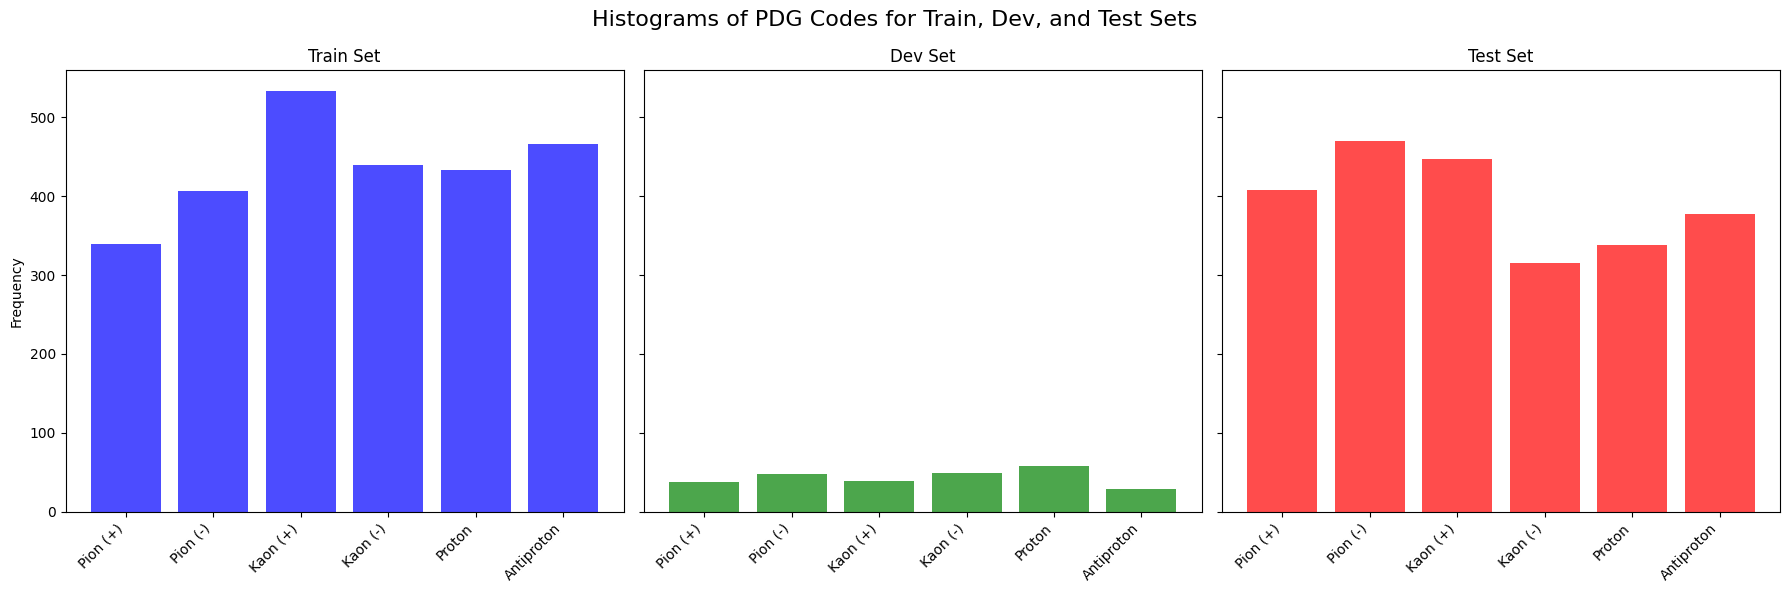

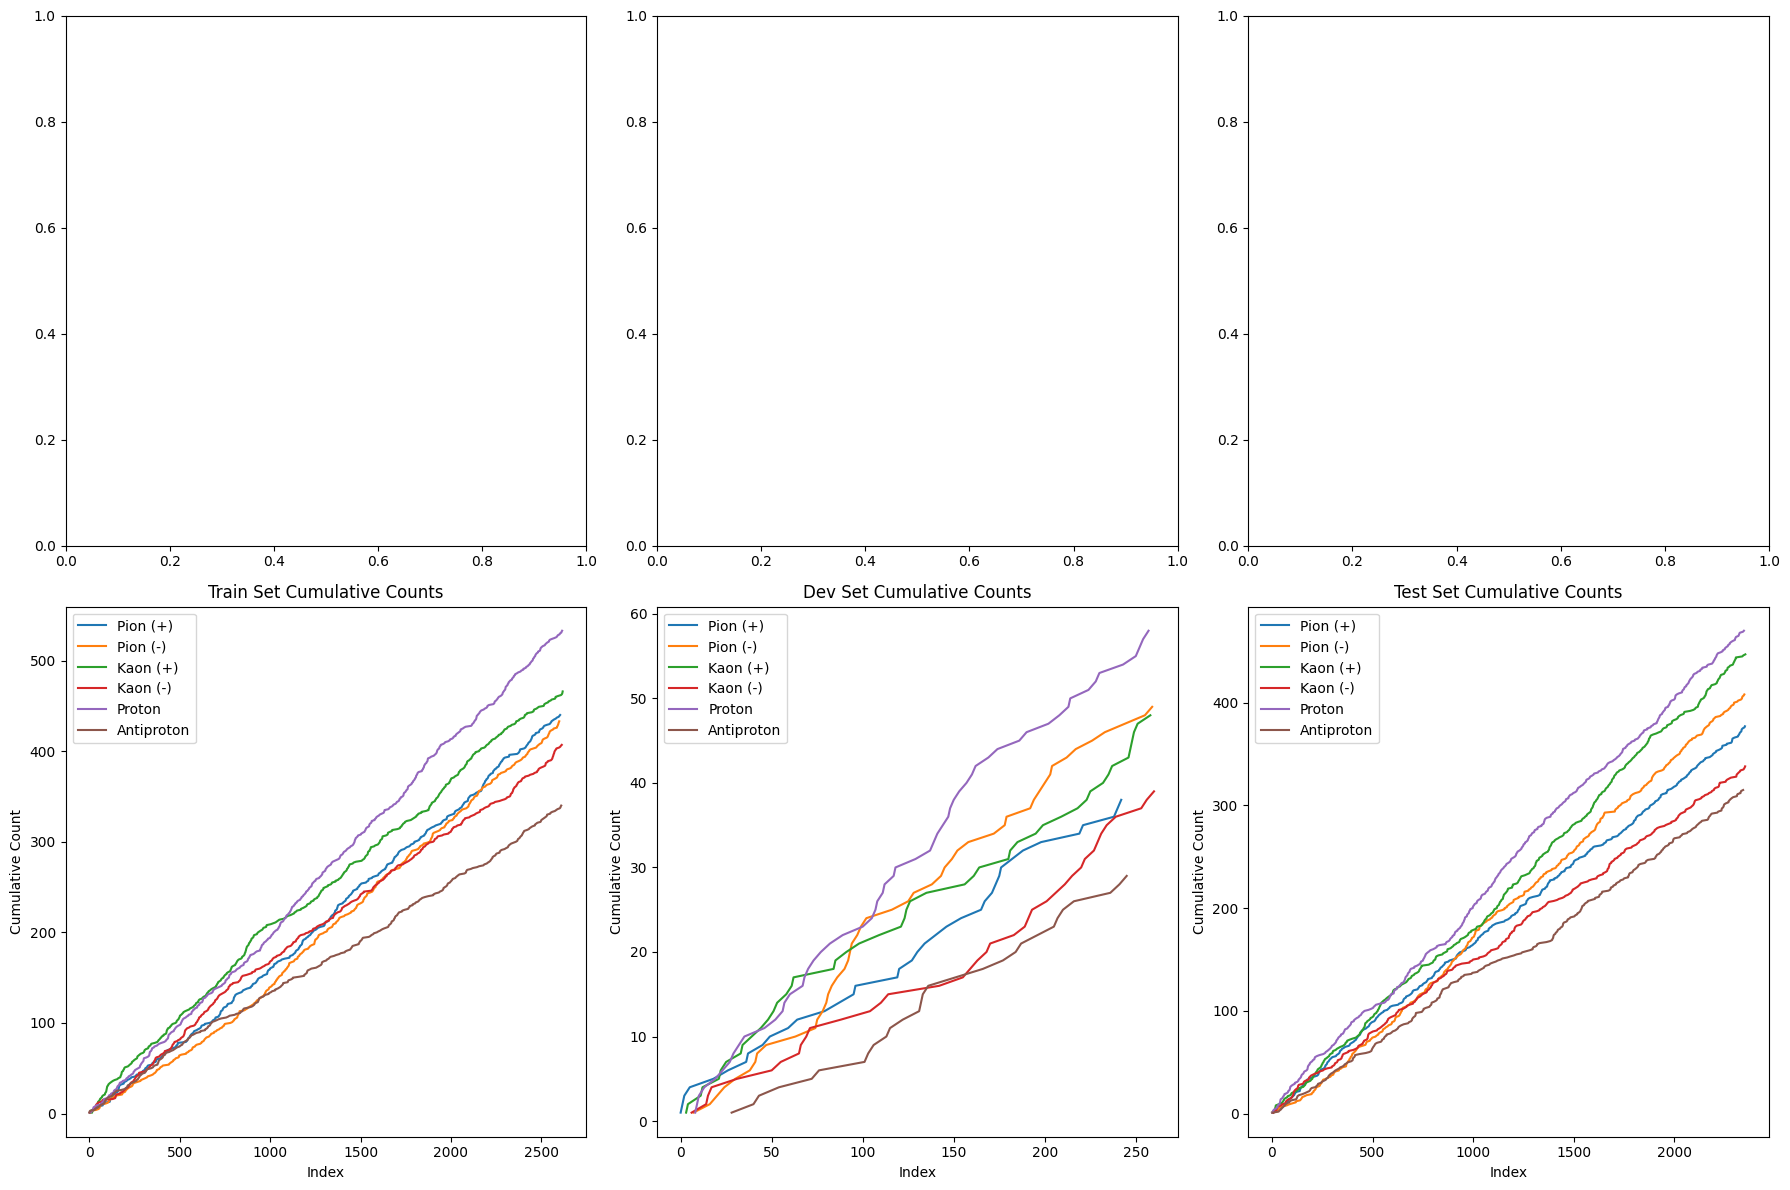

In [ ]:
classifier2 = MassClassifier2(combined_data)

### Model build

In [ ]:

# train_ckov_recon, test_ckov_recon, train_ckov_theoretical, test_ckov_theoretical, train_momentum, test_momentum = classifier2.get_Ckov_Reconstructed()
# y_train_true, y_test_true = classifier2.get_truth()
# train_variables, test_variables = classifier2.get_data()

# y_train_un, y_test_un = classifier2.get_truth_un()

# history, model = classifier2.build_model(epochs)
# # y_pred_train = model.predict(train_variables)
# # y_pred_test = model.predict(test_variables)

epochs = 50
batch_size = 32
history, model = classifier2.build_model(epochs, batch_size)


#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



<ipython-input-34-73dc30654841>:10: RuntimeWarning: divide by zero encountered in scalar divide
  exp_decay = -np.log(end_lr / peak_lr) / (num_epochs - warmup_epochs)


Cluster Feature IP Dimensions, 296  19
pre_combined_cluster_track_layer concat
pre_combined_cluster_track_layer pre_combined_cluster_track_layer
i 1
i 2
i 3
pre_combined_cluster_track_layer Concatenateed
try to flattem ___ type <class 'keras.src.engine.keras_tensor.KerasTensor'>
prev_combined_cluster_track_flat 
call  process_maps
map_keys, ['mapspion_probs', 'mapskaon_probs', 'mapsproton_probs', 'mapshigh_charge']
process_maps, key > mapspion_probs
Input shape for mapspion_probs: (None, 1, 58, 58)
call build_species_layers
 build_species_layers >> iterate 
 build_species_layers >> init shape (None, 1, 58, 58)
 build_species_layers >> Conv2D 
 build_species_layers >> Conv2D shape (None, 32, 58, 58)
 build_species_layers >> BatchNormalization shape (None, 32, 58, 58)
 build_species_layers >> LeakyReLU shape (None, 32, 58, 58)
 build_species_layers >> MaxPooling2D shape (None, 32, 29, 29)
 build_species_layers >> end curr it
 build_species_layers >> Conv2D 
 build_species_layers >> Conv2

## Plot metrics and history

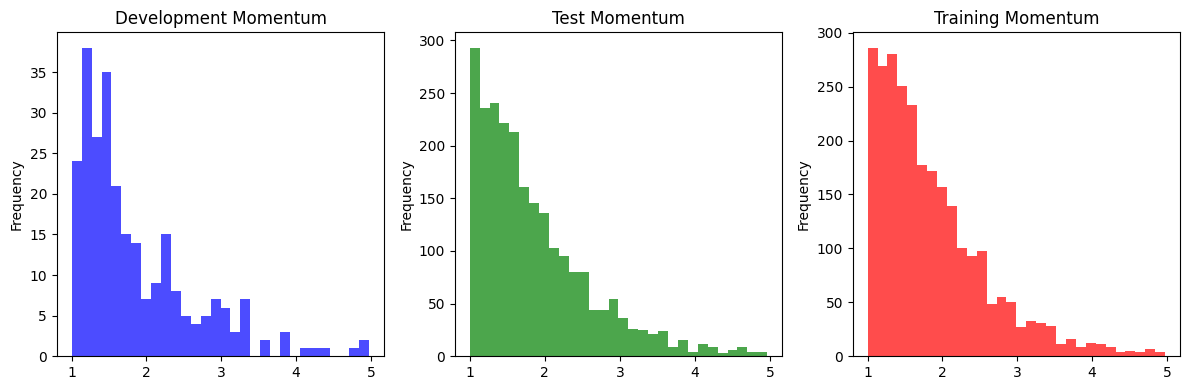

In [ ]:
classifier2.dev_mom
classifier2.test_mom
classifier2.train_mom


fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
axs[0].hist(classifier2.dev_mom, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Development Momentum')
axs[0].set_ylabel('Frequency')

axs[1].hist(classifier2.test_mom, bins=30, color='green', alpha=0.7)
axs[1].set_title('Test Momentum')
axs[1].set_ylabel('Frequency')

axs[2].hist(classifier2.train_mom, bins=30, color='red', alpha=0.7)
axs[2].set_title('Training Momentum')
axs[2].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()

In [ ]:
print(np.unique(classifier2.pdg_train_labels))

['Antiproton' 'Kaon (+)' 'Kaon (-)' 'Pion (+)' 'Pion (-)' 'Proton']


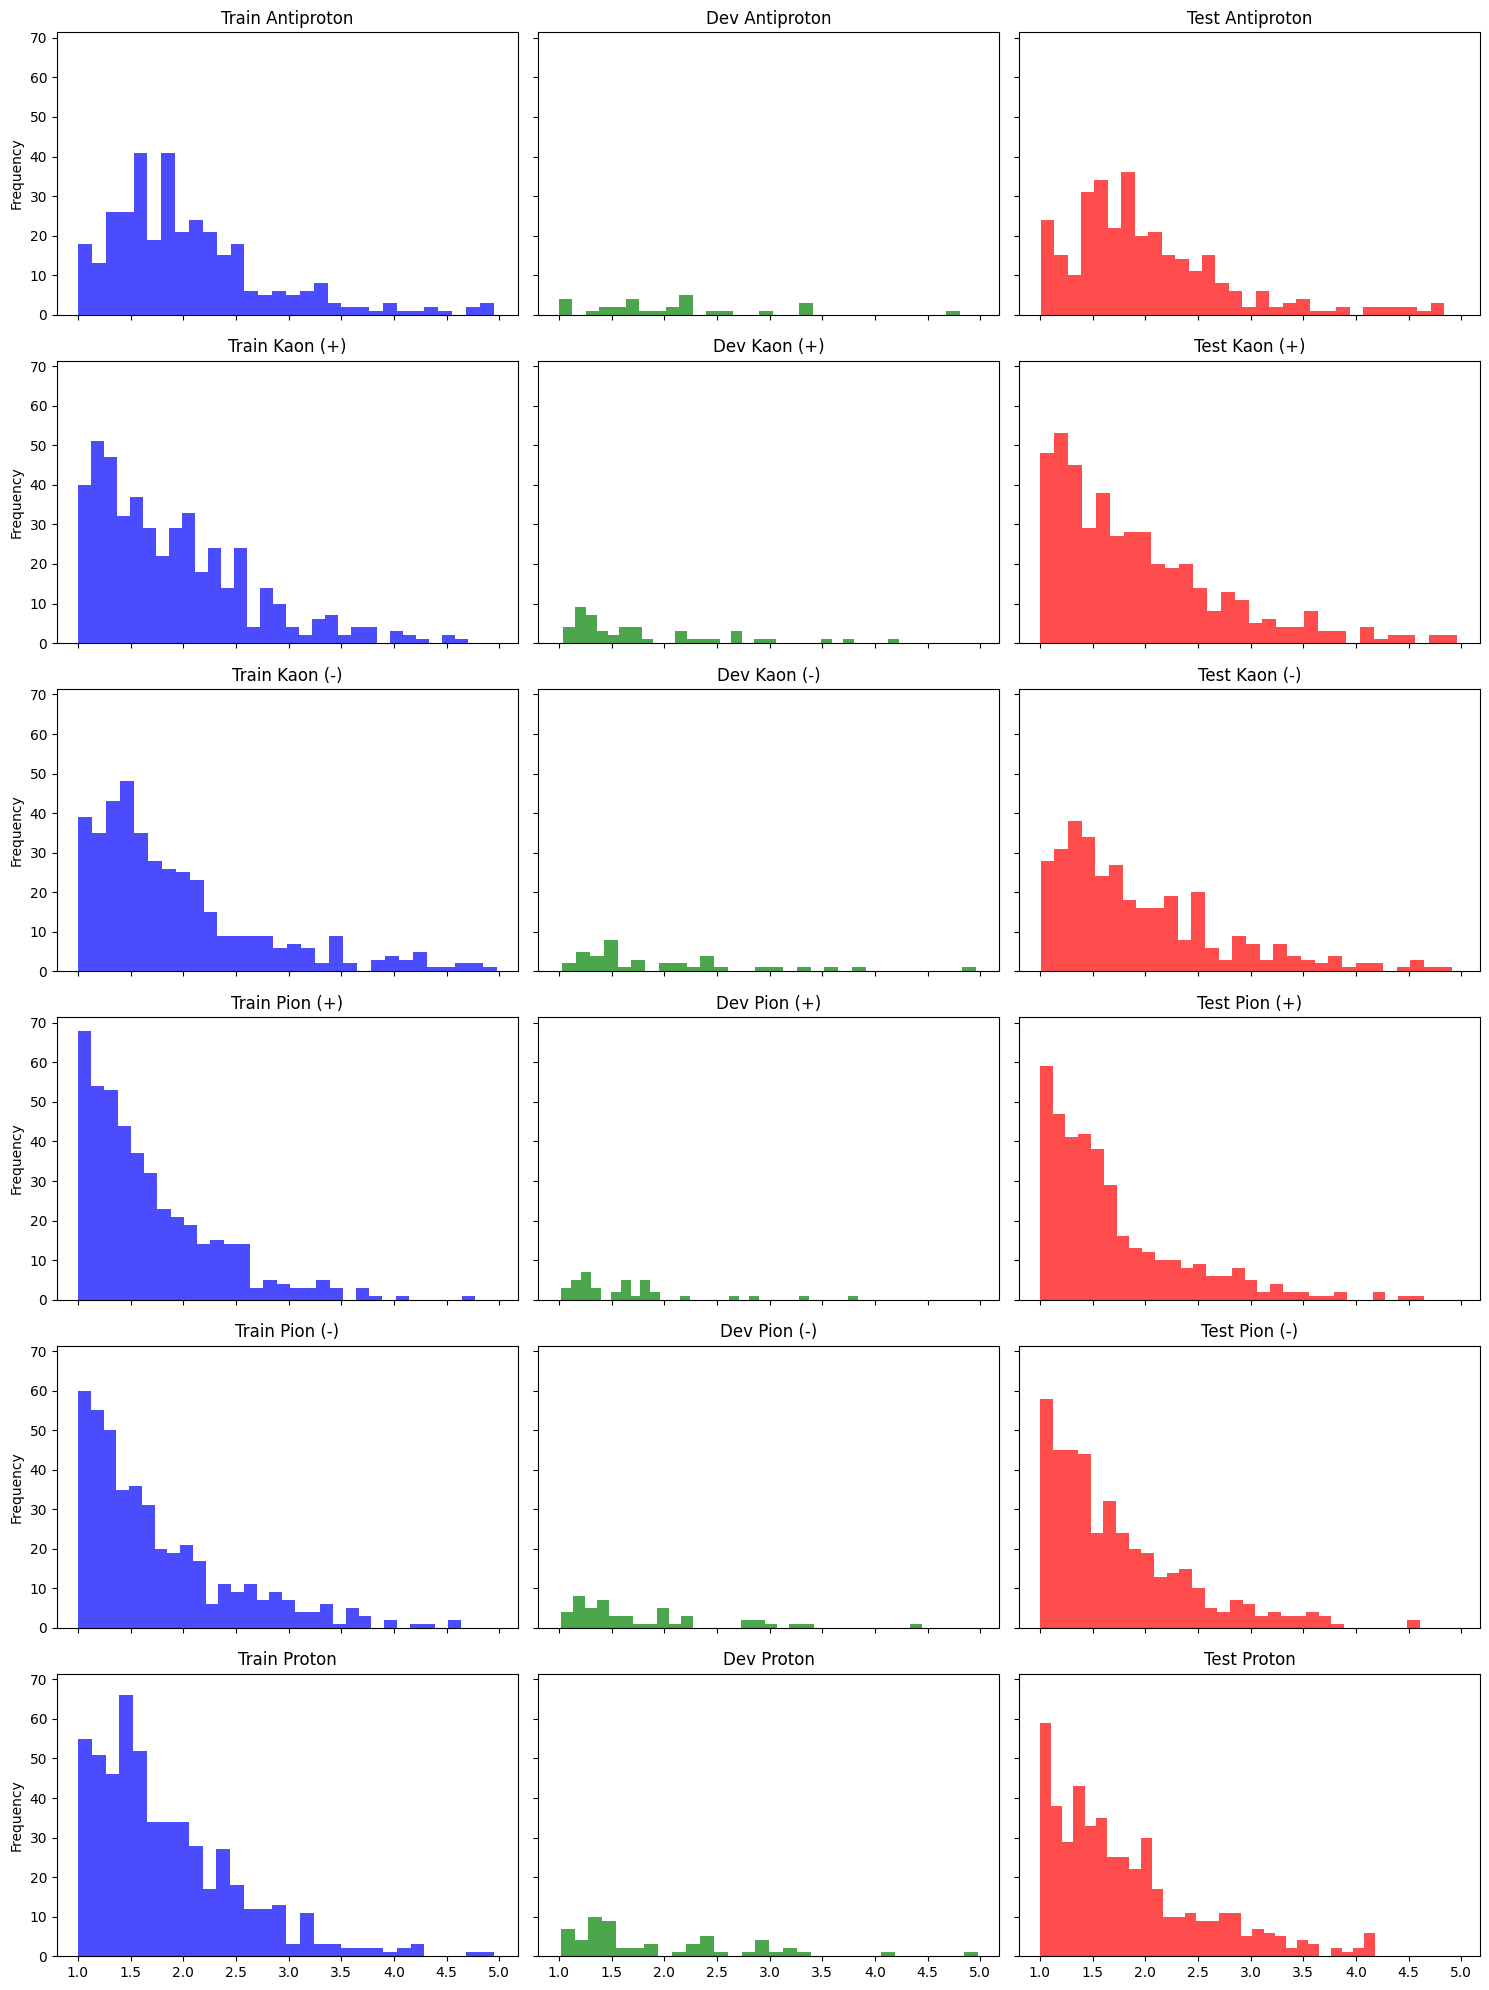

In [ ]:
pdg_labels = ['Antiproton', 'Kaon (+)', 'Kaon (-)', 'Pion (+)', 'Pion (-)', 'Proton']

# Create subplots
fig, axs = plt.subplots(6, 3, figsize=(15, 20), sharex=True, sharey=True)

# Plot histograms filtered by PDG label for train, dev, test
for i, pdg in enumerate(pdg_labels):
    # Filter data for each PDG label
    train_filtered = classifier2.train_mom[classifier2.pdg_train_labels == pdg]
    dev_filtered = classifier2.dev_mom[classifier2.pdg_dev_labels == pdg]
    test_filtered = classifier2.test_mom[classifier2.pdg_test_labels == pdg]

    # Train
    axs[i, 0].hist(train_filtered, bins=30, color='blue', alpha=0.7)
    axs[i, 0].set_title(f'Train {pdg}')
    axs[i, 0].set_ylabel('Frequency')

    # Dev
    axs[i, 1].hist(dev_filtered, bins=30, color='green', alpha=0.7)
    axs[i, 1].set_title(f'Dev {pdg}')

    # Test
    axs[i, 2].hist(test_filtered, bins=30, color='red', alpha=0.7)
    axs[i, 2].set_title(f'Test {pdg}')

# Layout adjustment
plt.tight_layout()
plt.show()

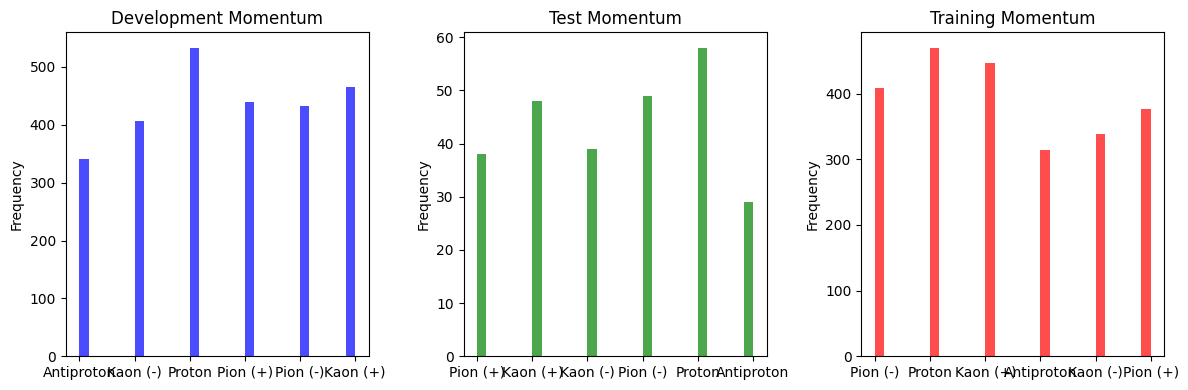

In [ ]:
classifier2.pdg_train_labels
classifier2.pdg_dev_labels
classifier2.pdg_test_labels
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
axs[0].hist(classifier2.pdg_train_labels, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Development Momentum')
axs[0].set_ylabel('Frequency')

axs[1].hist(classifier2.pdg_dev_labels, bins=30, color='green', alpha=0.7)
axs[1].set_title('Test Momentum')
axs[1].set_ylabel('Frequency')

axs[2].hist(classifier2.pdg_test_labels, bins=30, color='red', alpha=0.7)
axs[2].set_title('Training Momentum')
axs[2].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout()
plt.show()

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
Occurrences in Training Set:
PDG Code 211: 0 times
PDG Code 321: 0 times
PDG Code 2212: 0 times

Occurrences in Test Set:
PDG Code 211: 0 times
PDG Code 321: 0 times
PDG Code 2212: 0 times
74/74 [==============================] - 1s 11ms/step


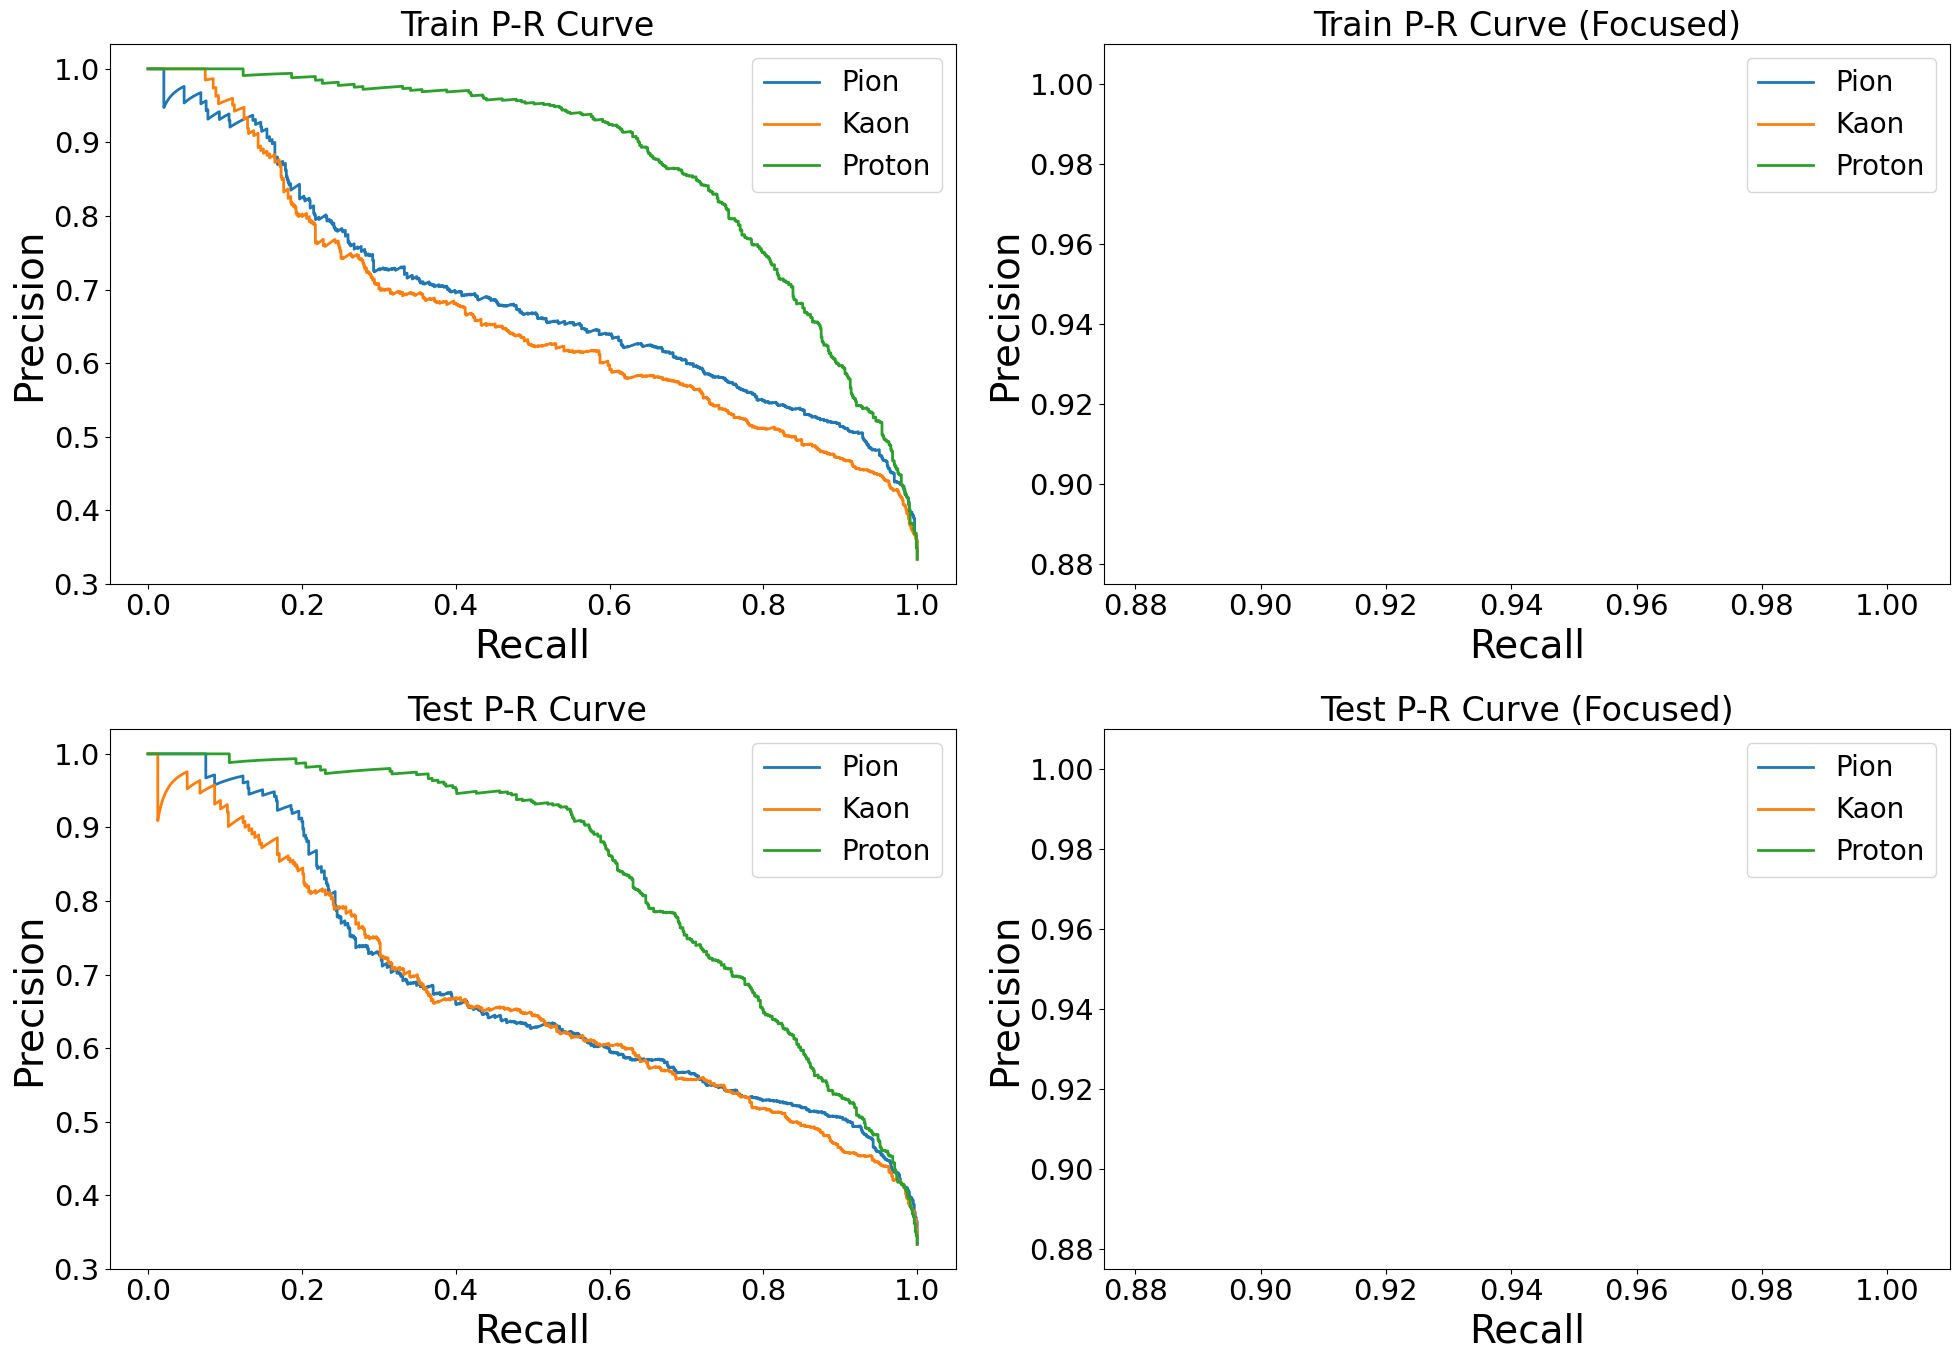

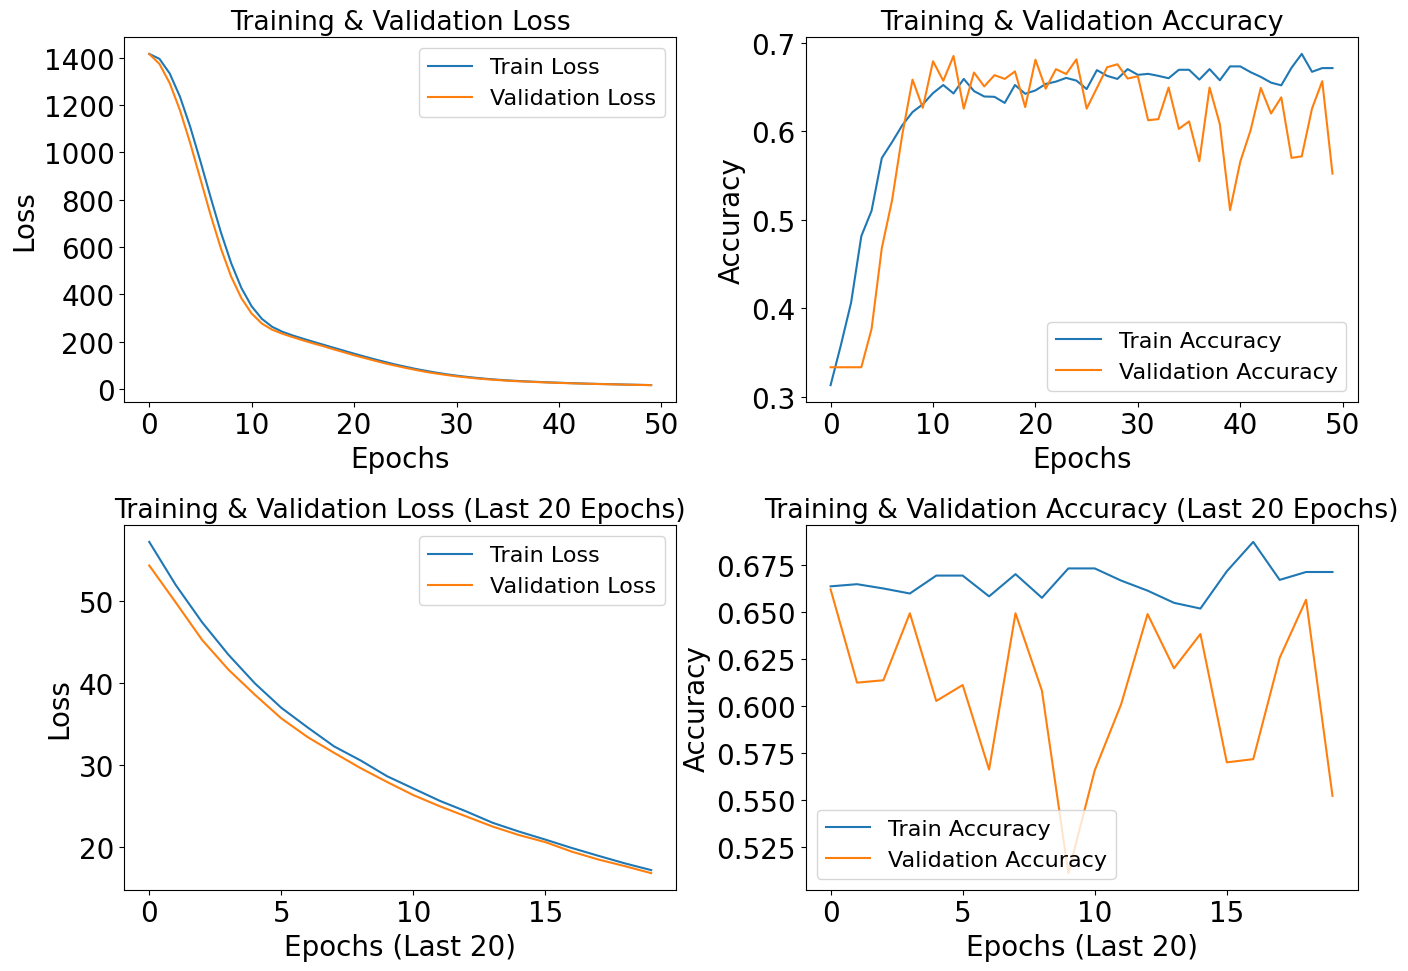

try to plot Train confusion matrixec 
try to plot Validation confusion matrixec 
y_pred_test [0.00892152 0.01014416 0.01127813 ... 0.8874615  0.90109056 0.9304767 ]
y_test [0. 1.]


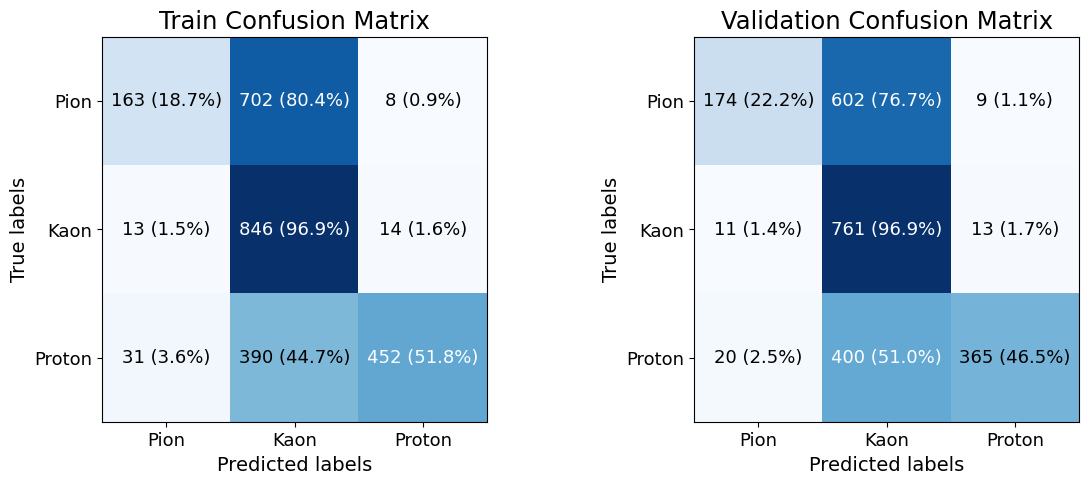

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, confusion_matrix

# Define a larger font size for all text in the plots
LARGE_FONT_SIZE = 14  # You can adjust this value as needed

def plot_confusion_matrix(ax, cm, title="Confusion Matrix"):

    try:
        """Utility function to plot the confusion matrix."""
        ax.imshow(cm, cmap='Blues', interpolation='nearest')
        ax.set_xticks(np.arange(3))
        ax.set_yticks(np.arange(3))
        ax.set_xticklabels(['Pion', 'Kaon', 'Proton'], fontsize=13)
        ax.set_yticklabels(['Pion', 'Kaon', 'Proton'], fontsize=13)
        ax.set_title(title, fontsize=LARGE_FONT_SIZE * 1.25)

        ax.set_xlabel('Predicted labels', fontsize=14)
        ax.set_ylabel('True labels', fontsize=14)
        for x in range(3):
            for y in range(3):
                percent = cm[x, y] / np.sum(cm[x, :]) * 100  # Percentage formula
                # Use white text if the background is dark; otherwise, use black.
                text_color = 'white' if cm[x, y] > (np.max(cm) / 2) else 'black'
                ax.text(y, x, f"{cm[x, y]} ({percent:.1f}%)", ha='center', va='center', color=text_color, fontsize=13)
    except Exception as e :
        print(f"faield to plot_confusion_matrix w {e} ")


def plot_pr_curves(history, y_pred_train, y_pred_test, y_train_true, y_test_true):
    fig, axs = plt.subplots(2, 2, figsize=(20, 14))  # Adjusting figure size for better readability

    # Define class names for the legend
    class_names = ['Pion', 'Kaon', 'Proton']

    # Configuring the plots with larger fonts
    for ax in axs.flat:
        ax.tick_params(axis='x', labelsize=LARGE_FONT_SIZE * 1.5)
        ax.tick_params(axis='y', labelsize=LARGE_FONT_SIZE * 1.5)
        ax.xaxis.label.set_size(LARGE_FONT_SIZE * 2)
        ax.yaxis.label.set_size(LARGE_FONT_SIZE * 2)
        ax.legend(fontsize=LARGE_FONT_SIZE * 2)
        ax.title.set_size(LARGE_FONT_SIZE * 2)


    plt.rcParams.update({'font.size': 20})


    # Linear Scale P-R Curve for Train Data
    y_train_bin = label_binarize(y_train_true, classes=[0, 1, 2])
    for i in range(3):
        precision_train, recall_train, _ = precision_recall_curve(y_train_bin[:, i], y_pred_train[:, i])
        axs[0, 0].plot(recall_train, precision_train, lw=2, label=class_names[i])
    axs[0, 0].set_title("Train P-R Curve ")
    axs[0, 0].set_xlabel('Recall')
    axs[0, 0].set_ylabel('Precision')
    axs[0, 0].legend()

    for i in range(3):
        precision_train, recall_train, _ = precision_recall_curve(y_train_bin[:, i], y_pred_train[:, i])
        axs[0, 1].plot(recall_train, precision_train, lw=2, label=class_names[i])
    axs[0, 1].set_title("Train P-R Curve (Focused)")
    axs[0, 1].set_xlabel('Recall')
    axs[0, 1].set_ylabel('Precision')
    axs[0, 1].set_xlim(0.875, 1.01)
    axs[0, 1].set_ylim(0.875, 1.01)
    axs[0, 1].legend()

    # Linear Scale P-R Curve for Test Data
    y_test_bin = label_binarize(y_test_true, classes=[0, 1, 2])
    for i in range(3):
        precision_test, recall_test, _ = precision_recall_curve(y_test_bin[:, i], y_pred_test[:, i])
        axs[1, 0].plot(recall_test, precision_test, lw=2, label=class_names[i])
    axs[1, 0].set_title("Test P-R Curve ")
    axs[1, 0].set_xlabel('Recall')
    axs[1, 0].set_ylabel('Precision')
    axs[1, 0].legend()

    #  Focused P-R Curve for Test Data
    for i in range(3):
        precision_test, recall_test, _ = precision_recall_curve(y_test_bin[:, i], y_pred_test[:, i])
        axs[1, 1].plot(recall_test, precision_test, lw=2, label=class_names[i])
    axs[1, 1].set_title("Test P-R Curve (Focused)")
    axs[1, 1].set_xlabel('Recall')
    axs[1, 1].set_ylabel('Precision')
    axs[1, 1].set_xlim(0.875, 1.01)
    axs[1, 1].set_ylim(0.875, 1.01)
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()





def plot_full_and_partial_history(history):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    plt.rcParams.update({'font.size': 16})

    # Plotting all epochs
    axs[0, 0].plot(history.history['loss'], label="Train Loss")
    axs[0, 0].plot(history.history['val_loss'], label="Validation Loss")
    axs[0, 0].set_title('Training & Validation Loss')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()

    axs[0, 1].plot(history.history['accuracy'], label="Train Accuracy")
    axs[0, 1].plot(history.history['val_accuracy'], label="Validation Accuracy")
    axs[0, 1].set_title('Training & Validation Accuracy')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Accuracy')
    axs[0, 1].legend()

    # Plotting last 20 epochs
    axs[1, 0].plot(history.history['loss'][-20:], label="Train Loss")
    axs[1, 0].plot(history.history['val_loss'][-20:], label="Validation Loss")
    axs[1, 0].set_title('Training & Validation Loss (Last 20 Epochs)')
    axs[1, 0].set_xlabel('Epochs (Last 20)')
    axs[1, 0].set_ylabel('Loss')
    axs[1, 0].legend()

    axs[1, 1].plot(history.history['accuracy'][-20:], label="Train Accuracy")
    axs[1, 1].plot(history.history['val_accuracy'][-20:], label="Validation Accuracy")
    axs[1, 1].set_title('Training & Validation Accuracy (Last 20 Epochs)')
    axs[1, 1].set_xlabel('Epochs (Last 20)')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

def count_pdg_codes(y_data, codes):
    # Convert data to absolute values since we are interested in 211, 321, 2212 irrespective of charge
    abs_y_data = np.abs(y_data)
    counts = {code: np.sum(abs_y_data == code) for code in codes}
    return counts

def plot_training_history(history, y_pred_train, y_pred_test, y_train_true, y_test_true):



    # Confusion Matrices
    y_pred_train_labels = np.argmax(y_pred_train, axis=1)
    y_pred_test_labels = np.argmax(y_pred_test, axis=1)
    y_train_trueL = np.argmax(y_train_true, axis=1)
    y_test_trueL = np.argmax(y_test_true, axis=1)

    if history is not None:
        plot_pr_curves(history, y_pred_train, y_pred_test, y_train_true, y_test_true)
        plot_full_and_partial_history(history)

        plt.rcParams.update({'font.size': plt.rcParams['font.size'] / 1.5})


    fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 2x1 Horizontal layout for confusion matrices

    # Train Confusion Matrix
    print(f"try to plot Train confusion matrixec ")
    cm_train = confusion_matrix(y_train_trueL, y_pred_train_labels)
    plot_confusion_matrix(axs[0], cm_train, "Train Confusion Matrix")


    print(f"try to plot Validation confusion matrixec ")

    # Validation Confusion Matrix
    cm_test = confusion_matrix(y_test_trueL, y_pred_test_labels)
    plot_confusion_matrix(axs[1], cm_test, "Validation Confusion Matrix")

y_train, y_test = classifier2.get_truth()
pdg_codes_of_interest = [211, 321, 2212]


print(y_train)

train_counts = count_pdg_codes(y_train, pdg_codes_of_interest)
test_counts = count_pdg_codes(y_test, pdg_codes_of_interest)

# Print the results
print("Occurrences in Training Set:")
for code, count in train_counts.items():
    print(f"PDG Code {code}: {count} times")

print("\nOccurrences in Test Set:")
for code, count in test_counts.items():
    print(f"PDG Code {code}: {count} times")


train_variables, test_variables = classifier2.get_data()

y_pred_train = model.predict(train_variables)
y_pred_test = model.predict(test_variables)

plot_training_history(history, y_pred_train, y_pred_test, y_train, y_test)


print(f"y_pred_test {np.unique(y_pred_test)}")
print(f"y_test {np.unique(y_test)}")



###  accuracy as function of momentum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example PDG labels and momentum data

### predicted labels
train_variables, test_variables = classifier2.get_data()
y_pred_train = model.predict(train_variables)
y_pred_test = model.predict(test_variables)

# Unique PDG labels for plotting
pdg_labels = ['Antiproton', 'Kaon (+)', 'Kaon (-)', 'Pion (+)', 'Pion (-)', 'Proton']

# Define bins for momentum
momentum_bins = np.linspace(np.min(momentum), np.max(momentum), num=20)  # Change num to adjust number of bins
bin_indices = np.digitize(momentum, bins=momentum_bins)

# Prepare to store accuracy in each bin for each PDG label
accuracies = {label: [] for label in pdg_labels}
bin_centers = 0.5 * (momentum_bins[:-1] + momentum_bins[1:])  # Centers of bins for plotting



# Calculate accuracy for each PDG label in each bin
for label in pdg_labels:
    for i in range(1, len(momentum_bins)):
        indices = (bin_indices == i) & (true_labels == label)
        if np.sum(indices) > 0:
            accuracies[label].append(np.mean(predicted_labels[indices] == true_labels[indices]))
        else:
            accuracies[label].append(None)  # No data in this bin

# Plotting
plt.figure(figsize=(12, 8))
for label, acc in accuracies.items():
    plt.plot(bin_centers, acc, '-o', label=label)

plt.title('Accuracy as Function of Momentum for PDG Labels')
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


74/74 [==============================] - 1s 11ms/step


NameError: name 'momentum' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Example of obtaining predicted labels (please replace with actual model predictions)

test_mom = classifier2.test_mom
true_labels_onehot = y_test  # from classifier2.get_truth()
y_train, y_test = classifier2.get_truth()


y_train_un, y_test_un = classifier2.get_truth()

true_labels = y_test#classifier2.pdg_test_labels  # Non one-hot, just labels as names or IDs

# Unique PDG labels for categorization
pdg_categories = np.unique([211, 321, 2212])
print(f"pdg_categories {pdg_categories}")
# Define bins for momentum
momentum_bins = np.linspace(np.min(test_mom), np.max(test_mom), 20)
bin_centers = 0.5 * (momentum_bins[:-1] + momentum_bins[1:])
y_pred_test
y_pred_train
# Calculate accuracy and distribution in each bin
accuracy_per_bin = []
predicted_label_distribution = {label: [] for label in pdg_categories}  # For distribution of predictions

y_pred_train_labels = np.argmax(y_pred_train, axis=1)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)
y_train_trueL = np.argmax(y_train, axis=1)
y_test_trueL = np.argmax(y_test, axis=1)


encoded_labels = np.unique(y_train_trueL)

predicted_label_distribution = encoded_labels
predicted_label_distribution = {label: [] for label in pdg_categories}  # For distribution of predictions
print(f"predicted_label_distribution {predicted_label_distribution}")

for i in range(len(momentum_bins) - 1):
    bin_mask = (test_mom > momentum_bins[i]) & (test_mom <= momentum_bins[i+1])
    if bin_mask.any():
        true_bin = true_labels_onehot[bin_mask]
        pred_bin = y_pred_test[bin_mask]
        # Calculate accuracy for the bin
        accuracy_per_bin.append(accuracy_score(np.argmax(true_bin, axis=1), np.argmax(pred_bin, axis=1)))

        # Calculate distribution of predicted labels for each true label
        for label in pdg_categories:
            label_mask = true_labels[bin_mask] == label
            if np.any(label_mask):
                # Count predictions for this true label
                label_counts = np.sum(pred_bin[label_mask], axis=0) / np.sum(label_mask)
                predicted_label_distribution[label].append(label_counts)
                print(f"types : predicted_label_distribution {predicted_label_distribution} label {label} label_counts {label_counts}")

            else:
                predicted_label_distribution[label].append(np.zeros(true_bin.shape[1]))
    else:
        accuracy_per_bin.append(None)
        for label in pdg_categories:
            predicted_label_distribution[label].append(np.zeros(true_bin.shape[1]))


# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, accuracy_per_bin, marker='o', linestyle='-')
plt.title('Accuracy as Function of Momentum')
plt.xlabel('Momentum')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



predicted_label_distribution = {label: [] for label in encoded_labels}  # For distribution of predictions

print(f"predicted_label_distribution")
for i in range(len(momentum_bins) - 1):
    bin_mask = (test_mom > momentum_bins[i]) & (test_mom <= momentum_bins[i+1])
    if bin_mask.any():
        true_bin = y_test_trueL[bin_mask]
        pred_bin = y_pred_test_labels[bin_mask]
        # Calculate accuracy for the bin
        #accuracy_per_bin.append(accuracy_score(np.argmax(true_bin, axis=1), np.argmax(pred_bin, axis=1)))

        # Calculate distribution of predicted labels for each true label
        for label in encoded_labels:
            label_mask = y_test_trueL[bin_mask] == label
            if np.any(label_mask):
                # Count predictions for this true label
                label_counts = np.sum(pred_bin[label_mask], axis=0) / np.sum(label_mask)

                #print(f"types : predicted_label_distribution {predicted_label_distribution} label {label} label_counts {label_counts}")
                predicted_label_distribution[label][i] = label_counts / label_mask.sum()
    else:
        for label in pdg_categories:
            predicted_label_distribution[label].append(np.zeros(true_bin.shape[1]))


print(f"y_pred_train_labels {np.unique(y_pred_train_labels)}")
print(f"y_train_trueL {np.unique(y_train_trueL)}")

######################################

# for i in range(len(momentum_bins) - 1):
#     bin_mask = (test_mom > momentum_bins[i]) & (test_mom <= momentum_bins[i+1])
#     if bin_mask.any():
#         true_bin = true_labels_onehot[bin_mask]
#         pred_bin = y_pred_test[bin_mask]
#         # Calculate accuracy for the bin
#         accuracy_per_bin.append(accuracy_score(np.argmax(true_bin, axis=1), np.argmax(pred_bin, axis=1)))

#         # Calculate distribution of predicted labels for each true label
#         for label in pdg_categories:
#             label_mask = true_labels[bin_mask] == label
#             if np.any(label_mask):
#                 # Count predictions for this true label
#                 label_counts = np.sum(pred_bin[label_mask], axis=0) / np.sum(label_mask)
#                 predicted_label_distribution[label].append(label_counts)
#             else:
#                 predicted_label_distribution[label].append(np.zeros(true_bin.shape[1]))
#     else:
#         accuracy_per_bin.append(None)
#         for label in pdg_categories:
#             predicted_label_distribution[label].append(np.zeros(true_bin.shape[1]))


######################################

print(f"type predicted_label_distribution  {type(predicted_label_distribution)}")
print(f"keys predicted_label_distribution  {(predicted_label_distribution.keys())}")

for i, pdg in enumerate(encoded_labels):
    print(f'Predicted Label Distribution for {pdg}')
    pld = predicted_label_distribution[pdg]
    print(f"type predicted_label_distribution  {type(predicted_label_distribution[pdg])}")
    for p in pld :
        print(f"type p  {type(p)}")
        print(f"type p  {p}")




# Plotting the distribution of predicted labels
fig, axes = plt.subplots(len(encoded_labels), 1, figsize=(12, len(encoded_labels)*4), sharex=True)
for i, pdg in enumerate(encoded_labels):
    axes[i].plot(bin_centers, np.array(predicted_label_distribution[pdg]).T)
    axes[i].set_title(f'Predicted Label Distribution for {pdg}')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(encoded_labels)
axes[-1].set_xlabel('Momentum')

plt.tight_layout()
plt.show()


In [ ]:

# Initialize dictionary for storing distributions
predicted_label_distribution = {label: np.zeros((len(encoded_labels), len(momentum_bins) - 1)) for label in encoded_labels}

# Process each momentum bin
for i in range(len(momentum_bins) - 1):
    bin_mask = (test_mom > momentum_bins[i]) & (test_mom <= momentum_bins[i+1])
    if bin_mask.any():
        true_bin = y_test_trueL[bin_mask]
        pred_bin = y_pred_test_labels[bin_mask]

        # Calculate distribution of predicted labels for each true label
        for label in encoded_labels:
            label_mask = true_bin == label
            if np.any(label_mask):
                # Count how many times each category is predicted within this true label's mask
                label_counts = np.bincount(pred_bin[label_mask], minlength=len(pdg_categories))
                predicted_label_distribution[label][:, i] = label_counts / label_mask.sum()

# Plotting the predicted distributions
fig, axes = plt.subplots(len(encoded_labels), 1, figsize=(12, len(encoded_labels) * 4), sharex=True)
species_names = ['Pion', 'Kaon', 'Proton']

for idx, label in enumerate(encoded_labels):
    for species_idx, species in enumerate(species_names):
        axes[idx].plot(bin_centers, predicted_label_distribution[label][species_idx, :], label=f'Predicted as {species}')
    axes[idx].set_title(f'True Label: {species_names[idx]}')
    axes[idx].set_ylabel('Proportion of Predictions')
    axes[idx].legend()

axes[-1].set_xlabel('Momentum')

plt.tight_layout()
plt.show()